<h1><center>Heesch Group Tesselations</center></h1>

<center><a href = "mailto: joseph.d.romano@gmail.com">joseph.d.romano@gmail.com</a></center>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Various functions

In [3]:
def sind(x):
    '''
    return sin(x) where x is in degrees
    '''
    y = np.sin(np.deg2rad(x))
    return y

def cosd(x):
    '''
    return cosd(x) where x is in degrees
    '''
    y = np.cos(np.deg2rad(x))
    return y

def tand(x):
    '''
    return tan(x) where x is in degrees
    '''
    y = np.tan(np.deg2rad(x))
    return y

In [4]:
def makeEdge(type):
    '''
    generate standard edges (horizontal orientation, length=1, leftmost vertex at (0,0))
    
    type: Ea, Eb, Ec, Ca, Cb, Cc, Cd
    
    returns P, V, C (points defining the edge, two vertices, and a rotational center, if appropriate)
    '''
    
    if type=='Ea':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([2./3., 1./12.])
        P[2,:] = np.array([2./3., 0])
        P[3,:] = np.array([1., 0])
        C = np.array([])
            
    if type=='Eb':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.5, 1./12.])
        P[2,:] = np.array([5./6., -1./12.])
        P[3,:] = np.array([1., 0])
        C = np.array([])
        
    if type=='Ec':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./8., -1./12.])
        P[2,:] = np.array([1./4., 0])
        P[3,:] = np.array([3./8., 1./12.])
        P[4,:] = np.array([0.5, 0])
        P[5,:] = np.array([1., 0])
        C = np.array([])
        
    if type=='Ca':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., -1./12.])
        P[2,:] = np.array([2./3., 1./12.])
        P[3,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cb':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3, 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([2./3., 1./12.])
        P[4,:] = np.array([2./3., 0])
        P[5,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cc':
        
        P = np.zeros((8,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([0.5, -1./12.])
        P[4,:] = np.array([0.5, 1./12.])
        P[5,:] = np.array([2./3., 1./12.])
        P[6,:] = np.array([2./3., 0])
        P[7,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0])     
        
    if type=='Cd':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./6., -1./12.])
        P[2,:] = np.array([1./3., 0])
        P[3,:] = np.array([2./3., 0])
        P[4,:] = np.array([5./6., 1./12.])
        P[5,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0])     
        
        
    # vertices (same for all edges)
    V = np.zeros((2,2))
    V[0,:] = np.array([0, 0])
    V[1,:] = np.array([1., 0])
    
    return P, V, C

In [5]:
def plotPoints(P):
    '''
    plot points of an edge or tile (piecewise linear edges)
    '''
    
    N = P.shape[0]
    
    for ii in range(0,N-1):
        x = np.array([P[ii,0], P[ii+1,0]])
        y = np.array([P[ii,1], P[ii+1,1]])
        
        plt.plot(x, y, color='k', linestyle='-')
        
    return

In [6]:
def plotVertices(V):
    '''
    plot vertices of an edge or tile
    '''
    
    N = V.shape[0]
    
    for ii in range(0,N):
        plt.plot(V[ii,0], V[ii,1], 'ko')
                
    return

In [7]:
def plotCenters(C):
    '''
    plot rotational centers of an edge or tile
    '''
    
    N = C.shape[0]
    if N==0:
        return
    
    for ii in range(0,N):
        plt.plot(C[ii,0], C[ii,1], 'ko', fillstyle='none')
        
    return

In [8]:
def plotRotationalVertices(C):
    '''
    plot rotational centers located at a vertex
    '''
    
    N = C.shape[0]
    if N==0:
        return
    
    for ii in range(0,N):
        plt.plot(C[ii,0], C[ii,1], 'ko', fillstyle='none', markersize=15)
        
    return

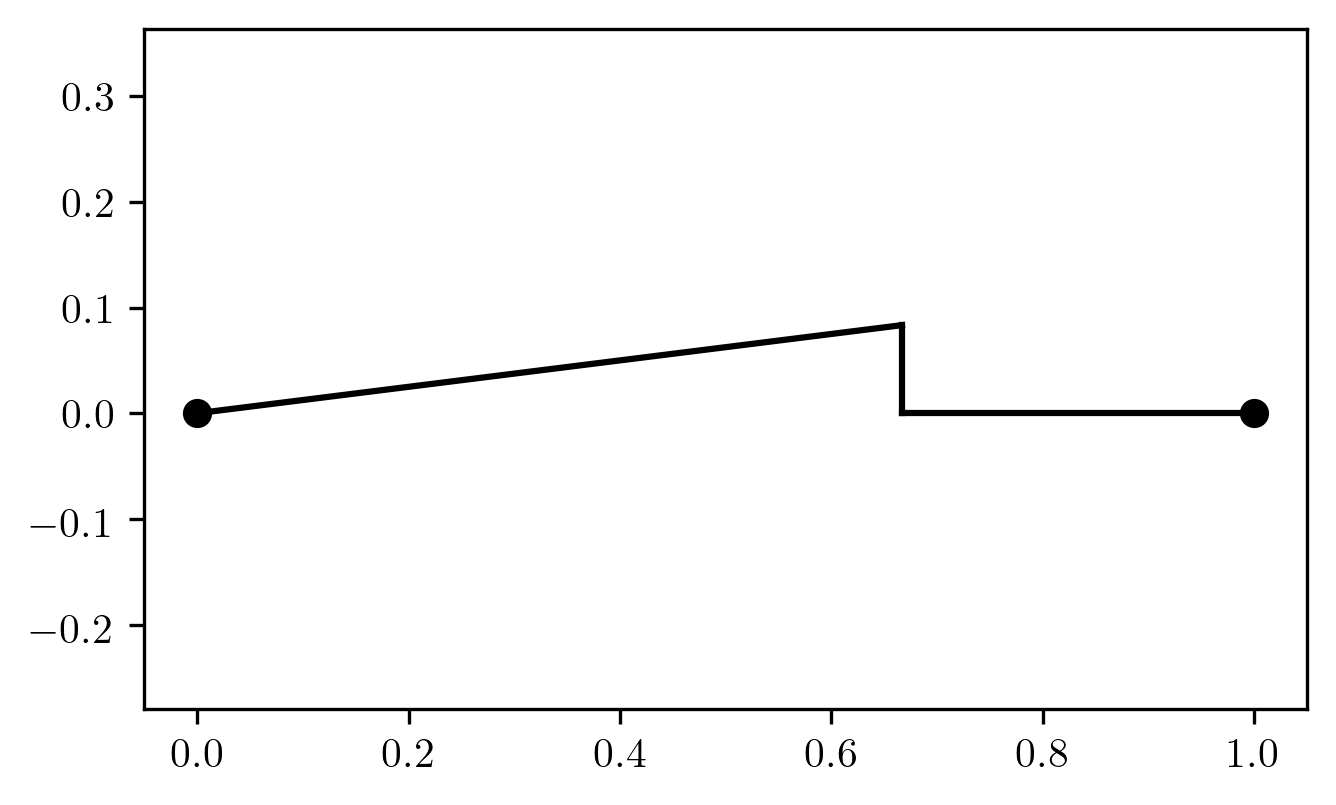

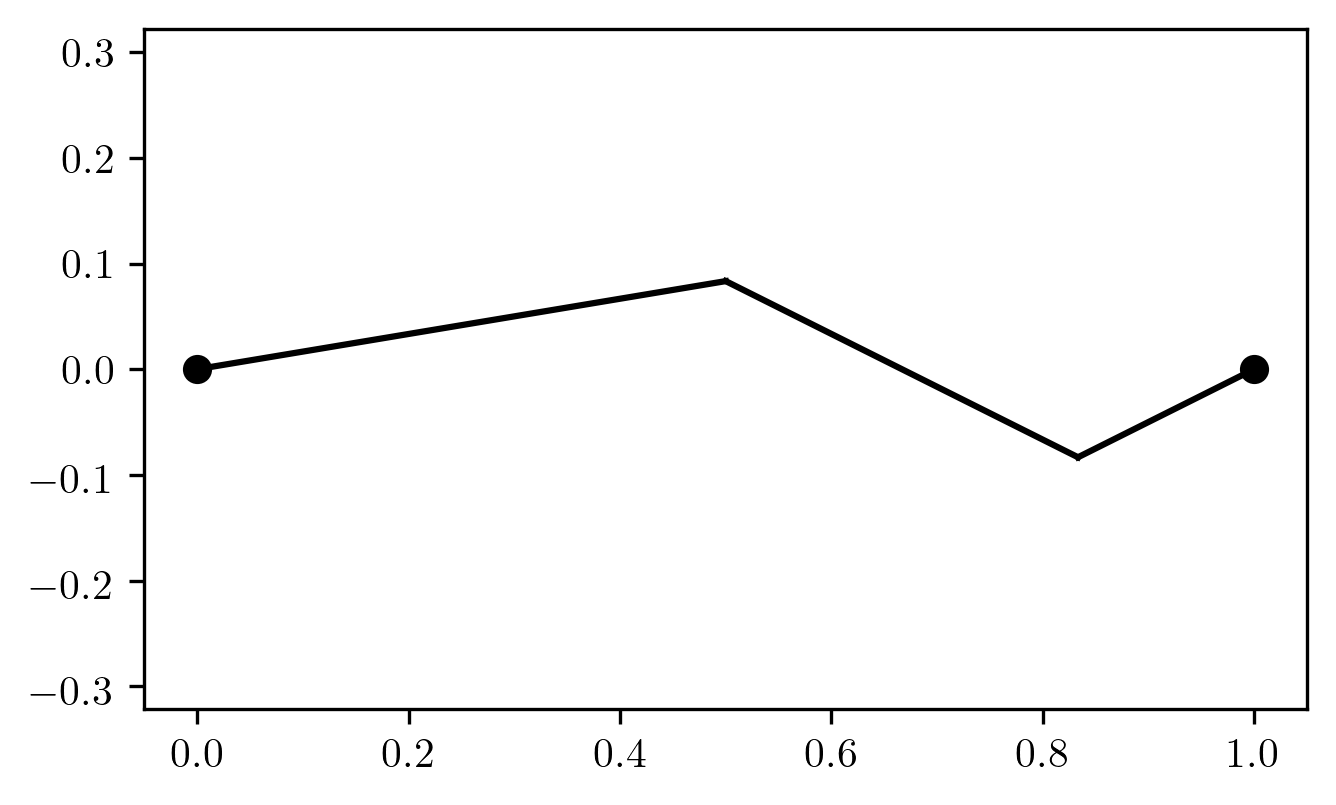

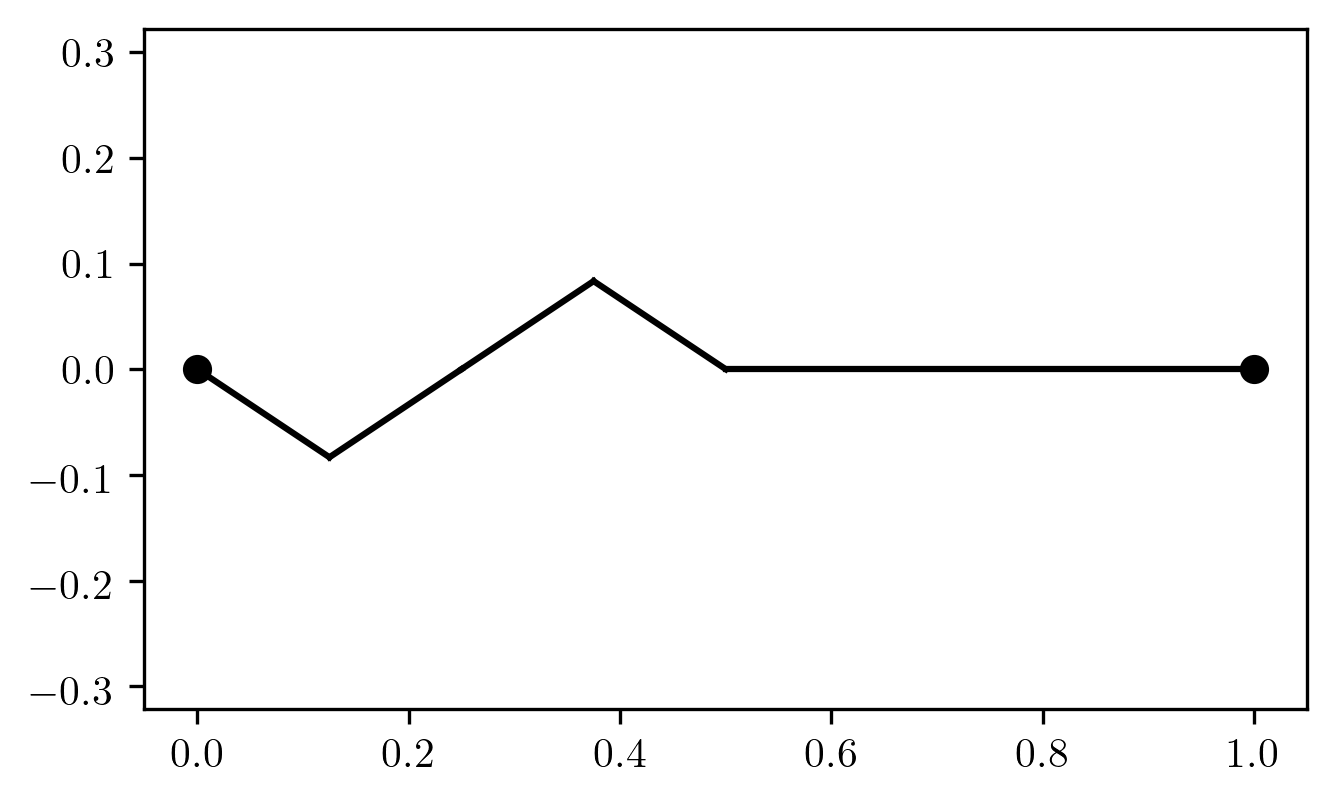

In [9]:
# test edges

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Eb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Ec')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

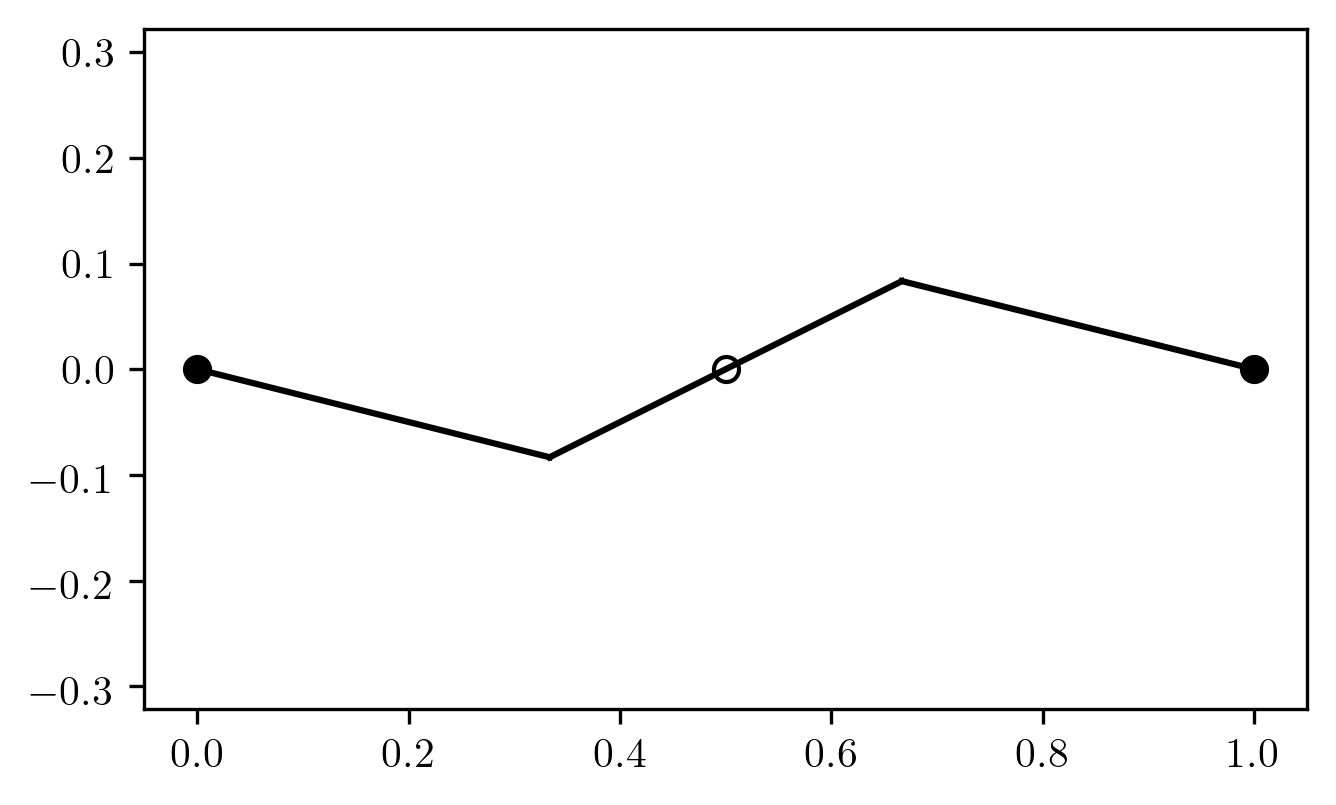

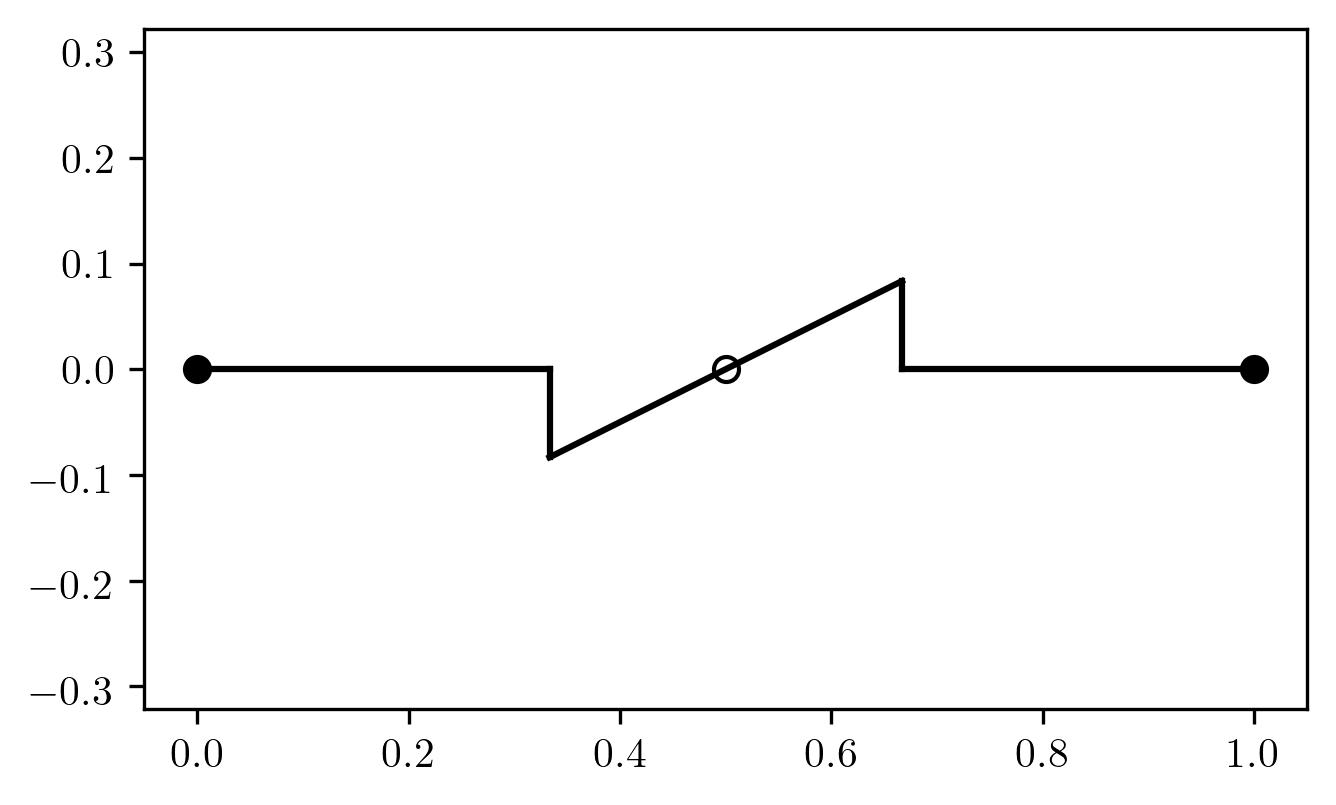

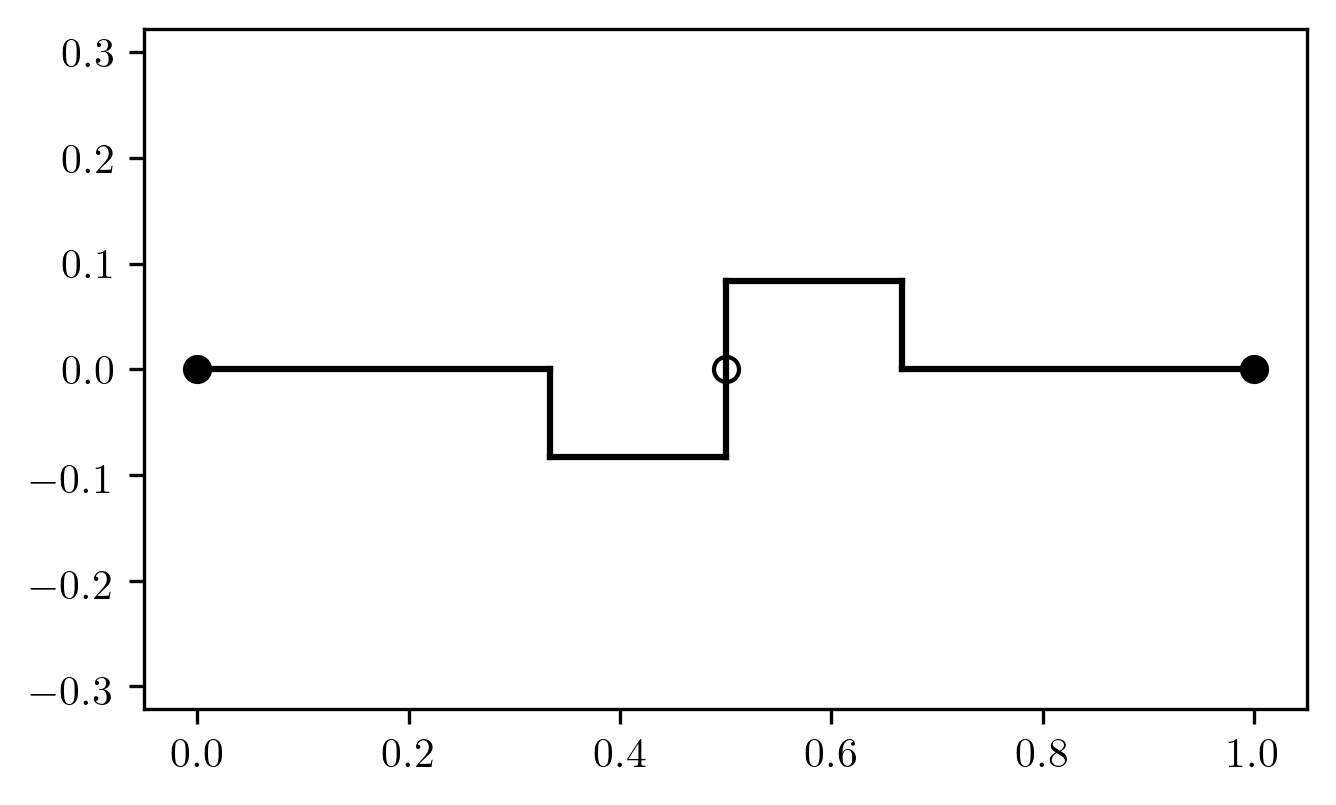

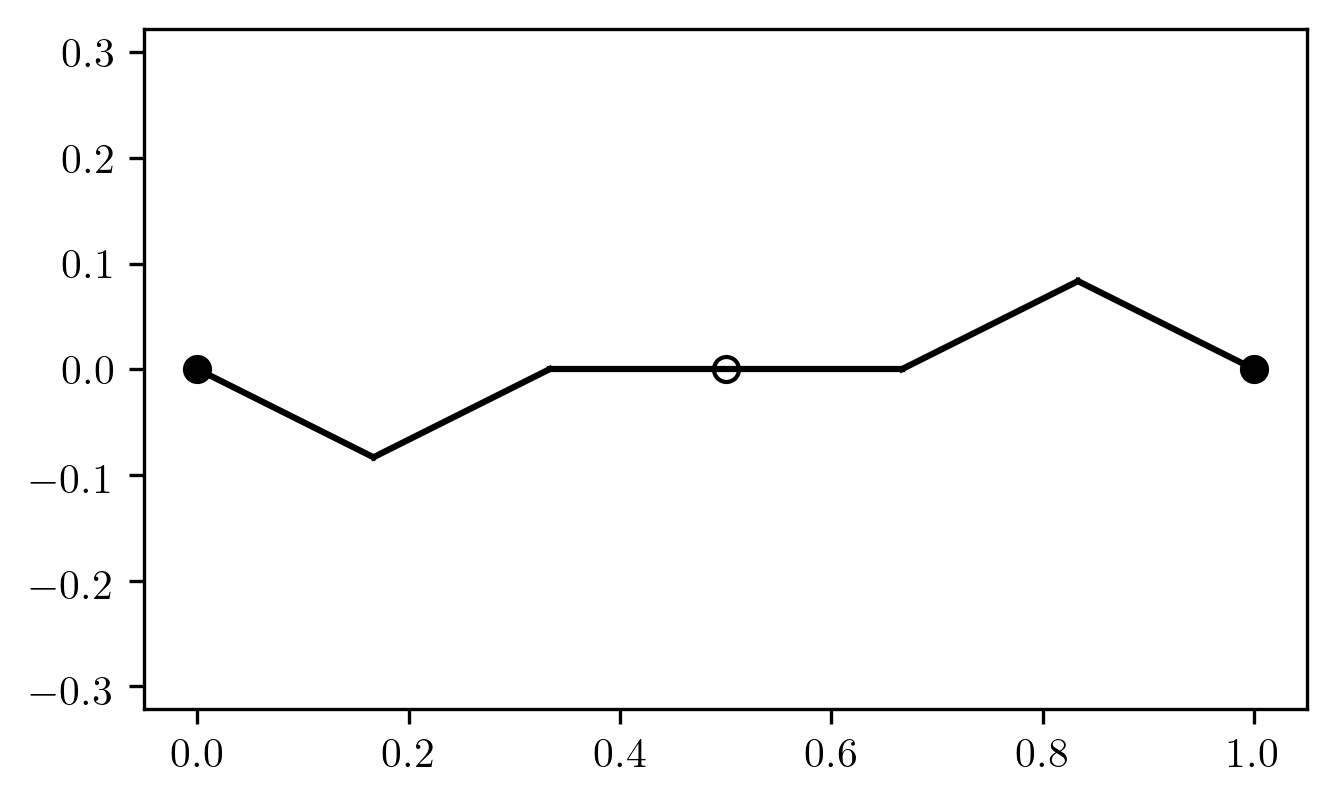

In [10]:
# test edges

P, V, C = makeEdge('Ca')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cc')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cd')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

In [11]:
def rescale(P, scalefactors):
    '''
    rescale points by 2-d scalefactors
    '''
    
    scalex = scalefactors[0]
    scaley = scalefactors[1]

    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,0] = scalex*P[ii,0]
        Q[ii,1] = scaley*P[ii,1]
        
    return Q

In [12]:
def translate(P, shift):
    '''
    translate points by 2-d shift vector
    '''
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = P[ii,:] + shift
        
    return Q

In [13]:
def Rz(a):
    '''
    calculate passive rotation matrix around z-axis
    a = angle (in degrees)
    '''
    
    R = np.array([[ cosd(a), sind(a)], 
                  [-sind(a), cosd(a)]])
    
    return R

In [14]:
def rotate(P, A, angle):
    '''
    actively rotate points P->Q around A thru angle (in degrees)
    '''
    
    # first translate object back to origin
    P = translate(P, -A)
    
    # then do an active rotation (use minus the angle)
    R = Rz(-angle)
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = np.dot(R, P[ii,:])
    
    # translate object back to original location
    Q = translate(Q, A)
    
    return Q

[[0.5 0.5]]


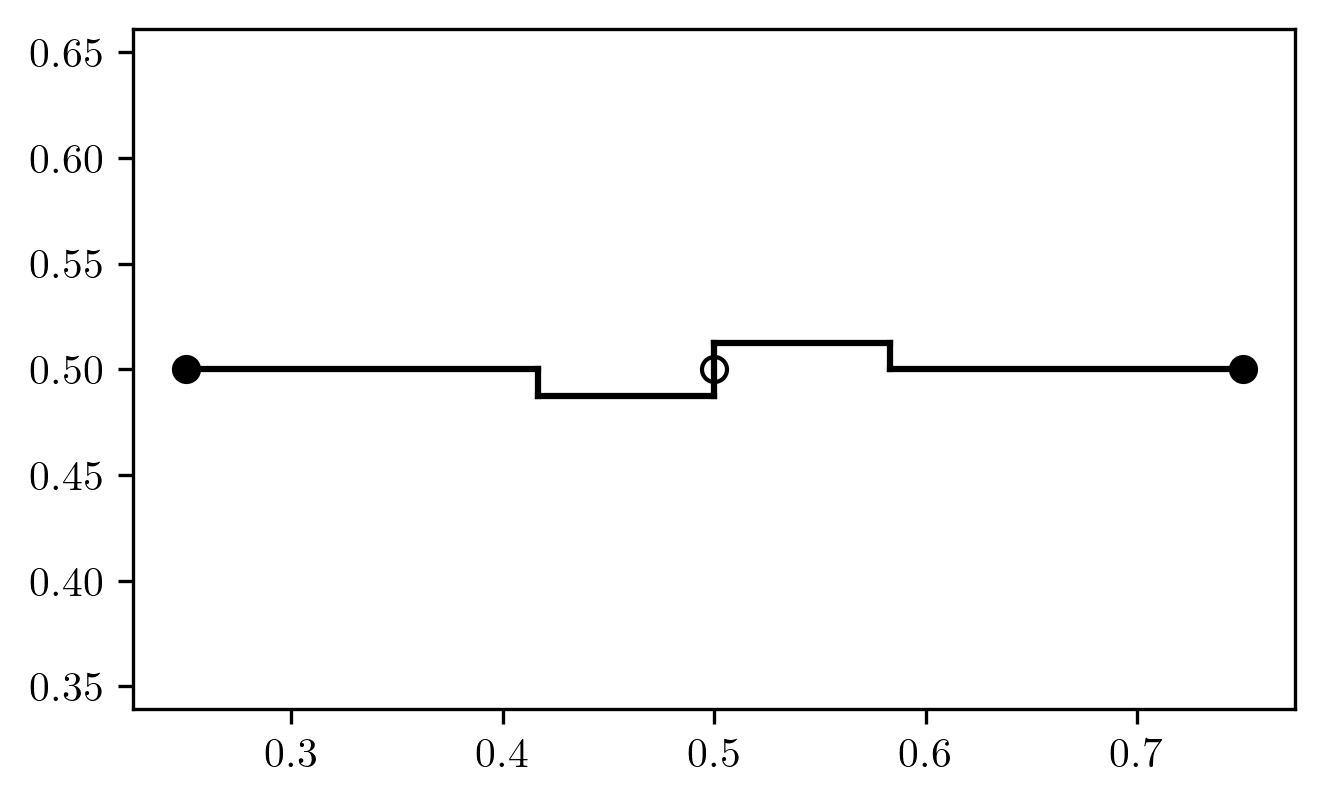

In [15]:
# test rescale and translation

P, V, C = makeEdge('Cc')

scalefactors = np.array([0.5, 0.15])
shift = np.array([0.25, .5])
P = rescale(P, scalefactors)
P = translate(P, shift)
V = rescale(V, scalefactors)
V = translate(V, shift)
C = rescale(C, scalefactors)
C = translate(C, shift)

print(C)
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

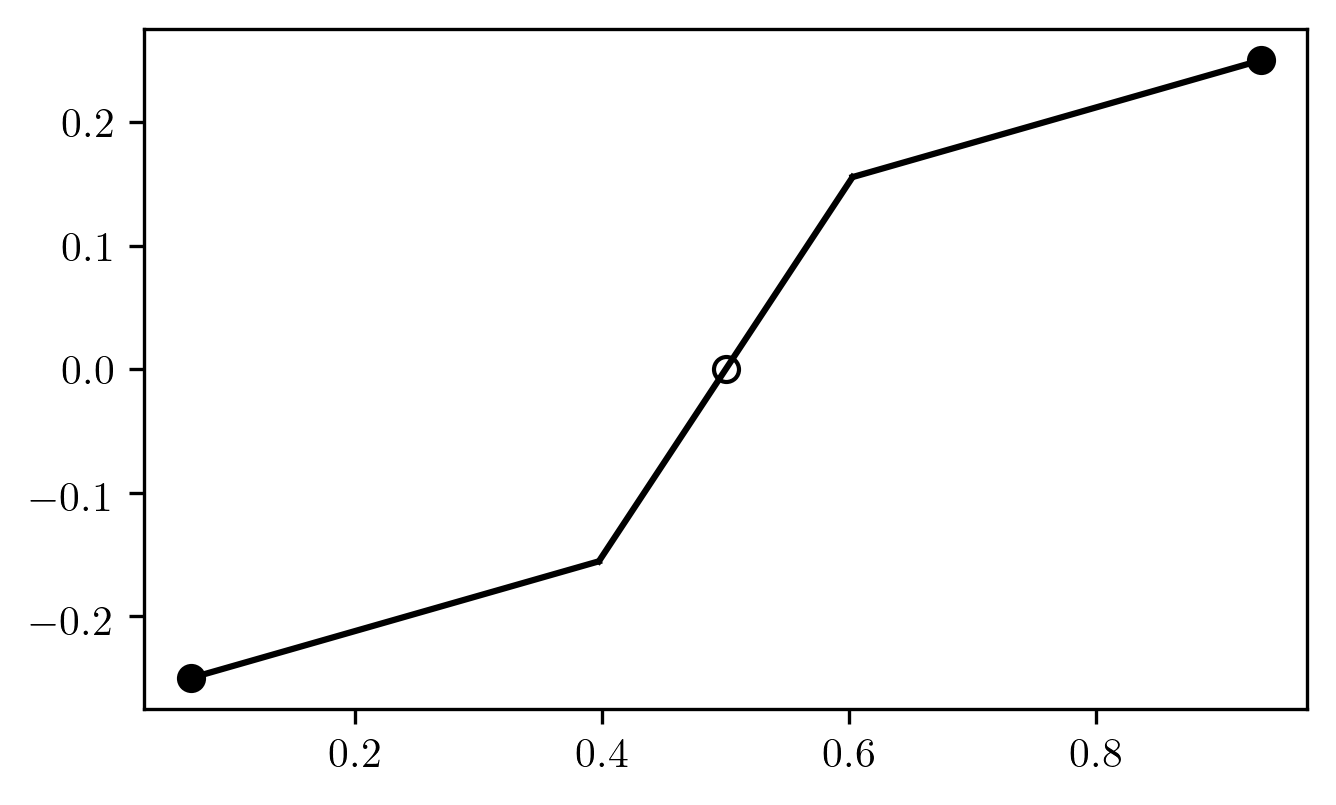

In [16]:
# test rotation

P, V, C = makeEdge('Ca')

A = np.array([0.5, 0])
angle = 30
P = rotate(P, A, angle)
V = rotate(V, A, angle)
C = rotate(C, A, angle)

plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

In [17]:
def reflect(P, axis):
    '''
    reflect points about an axis defined by [angle (in radians), y-intercept]
    
    NOTE: if angle=90 then axis is vertical and y-intercept is an x-intercept
    '''
    
    # extract reflection axis information
    angle = axis[0]
    b = axis[1]
    
    # check if vertical reflection axis
    if abs(angle)==90:
        
        #print('vertical reflection axis')
        shift = np.array([b, 0])
        
        # first translate object by -b
        P = translate(P, -shift)
        
        # now reflect about y-axis
        N = P.shape[0]
        Q = np.empty_like(P)
        
        for ii in range(0,N):
            Q[ii,:] = np.array([-P[ii,0], P[ii,1]])    

        # translate object back
        Q = translate(Q, shift)
        
    else:
        
        # first translate object by -b
        shift = np.array([0, b])
        P = translate(P, -shift)
        
        # then rotate by -angle
        A = np.array([0,0])
        P = rotate(P, A, -angle)
        
        # now reflect about x-axis
        N = P.shape[0]
        Q = np.empty_like(P)
        
        for ii in range(0,N):
            Q[ii,:] = np.array([P[ii,0], -P[ii,1]])    
            
        # rotate back to original orientation
        Q = rotate(Q, A, angle)

        # translate back to original location
        Q = translate(Q, shift)
    
    return Q

In [18]:
def glideReflect(P, axis, scalefac):
    '''
    perform glide reflection of points P 
    
    axis = [angle (rad), y-intercept]
    scalefac = amount to translate by in the direction of the axis
    '''
    
    # first reflect
    Q = reflect(P, axis)
    
    # then translate
    angle = axis[0]
    x = scalefac * cosd(angle)
    y = scalefac * sind(angle)
    shift = np.array([x, y])
    
    Q = translate(Q, shift)
    
    return Q

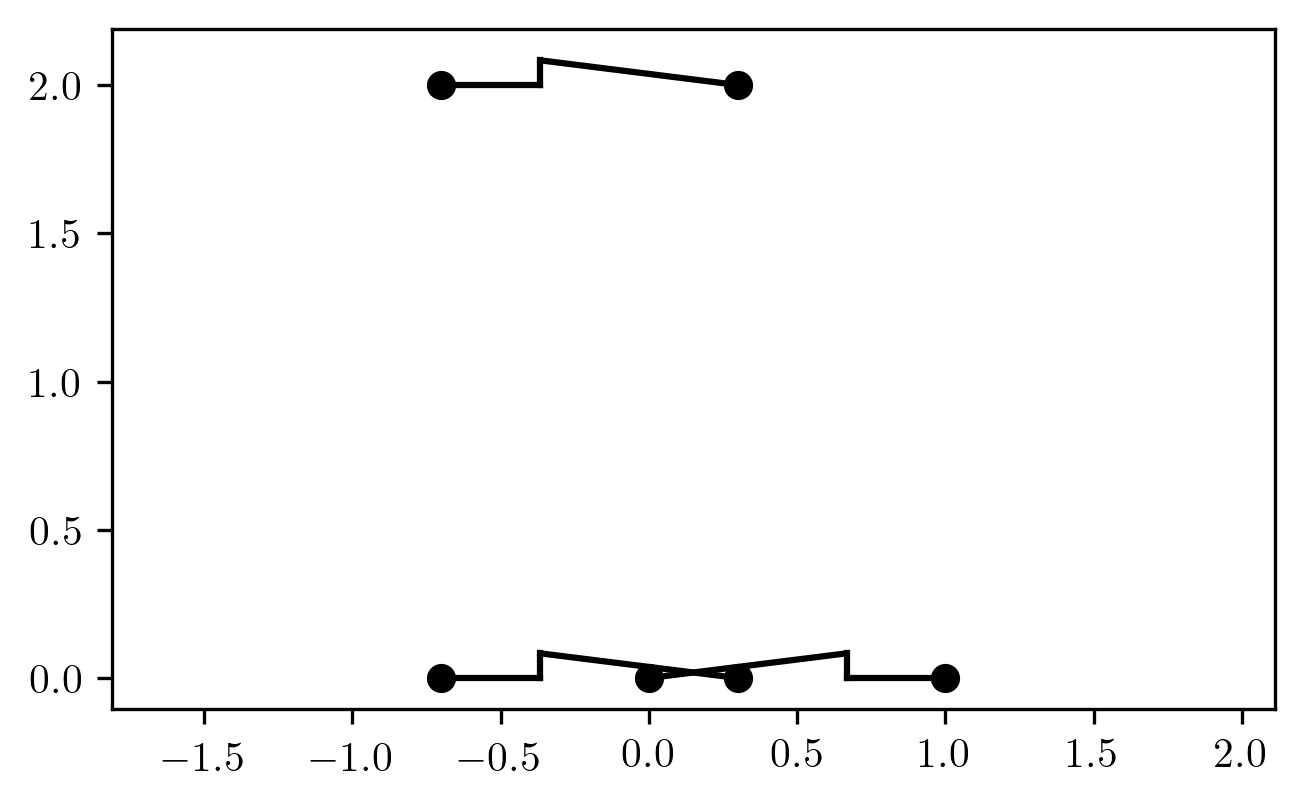

In [19]:
# test reflection and glide reflection

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

# reflection
b = 0.15 # y or x-intercept
angle = 90
axis = np.array([angle, b])
Q = reflect(P, axis)
W = reflect(V, axis)
plotPoints(Q)
plotVertices(W)

# glide reflection
scalefac = 2
Q = glideReflect(P, axis, scalefac)
W = glideReflect(V, axis, scalefac)
plotPoints(Q)
plotVertices(W)

In [20]:
def colorTile(P, color):
    '''
    color a tile (a closed polygon) defined by points P with color = 'b', 'r', ...
    '''
    
    x = P[:,0]
    y = P[:,1]
    
    plt.fill(x, y, color)
    
    return

In [21]:
def makeTile(type):
    '''
    make asymmetric heesch tile
    
    type = 'CCC', etc.
    
    return edge points, vertices, 2-fold rotation centers, and rotational centers at vertices
    '''
    
    if type=='CCC':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Cb')
        P3, V3, C3 = makeEdge('Cc')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = 60
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # rotate edge 3 by -60, then translate to top vertex of equilateral triangle
        S3 = rotate(P3, A, -angle)
        T3 = rotate(V3, A, -angle)
        U3 = rotate(C3, A, -angle)
        x = cosd(angle)
        y = sind(angle)
        shift = np.array([x,y])
        Q3 = translate(S3, shift)
        W3 = translate(T3, shift)
        D3 = translate(U3, shift)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = np.concatenate((D1, D2, D3), axis=0)
        R = np.array([])
        
    if type=='CGG':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = 60
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # glide reflect the new edge 2 about a horizontal axis passing thru the midpoint
        b = 0.5*sind(60)
        axis = np.array([0, b])
        scalefac = 0.5
        Q3 = glideReflect(Q2, axis, scalefac)
        W3 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        R = np.array([])
        
    if type=='CC6C6':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = 60
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate the new edge 2 by 60 about the vertex (need to change order of points)
        A1 = np.array([cosd(angle), sind(angle)])
        Q3 = rotate(Q2, A1, angle)
        Q3 = np.flipud(Q3)
        W3 = rotate(W2, A1, angle)
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        R = np.array([A1])
        
    if type=='CC4C4':
        # 884: so 8 meet at two vertices
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 45 degrees and then rescale by 1/sqrt(2)
        A = np.array([0,0])
        angle = 45
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        scalefactors = (1./np.sqrt(2.)) * np.array([1,1])
        Q2 = rescale(Q2, scalefactors)
        W2 = rescale(W2, scalefactors)
        
        # rotate the new edge 2 by 90 degrees about the vertex (need to change order of points)
        A1 = (1./np.sqrt(2.)) * np.array([cosd(45), sind(45)])
        Q3 = rotate(Q2, A1, 90)
        W3 = rotate(W2, A1, 90)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        R = np.array([A1])
        
    if type=='CC3C3':
        # 12, 12, 3: purposely not used by escher since 12 meet at 2 vertices
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 30 degrees and then rescale by 1/sqrt(3)
        A = np.array([0,0])
        angle = 30
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        scalefactors = (1./np.sqrt(3.)) * np.array([1,1])
        Q2 = rescale(Q2, scalefactors)
        W2 = rescale(W2, scalefactors)
        
        # rotate the new edge 2 by 120 degrees about the vertex (need to change order of points)
        A1 = (1./np.sqrt(3.)) * np.array([cosd(30), sind(30)])
        Q3 = rotate(Q2, A1, 120)
        W3 = rotate(W2, A1, 120)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        R = np.array([A1])
    
    if type=='TTTT':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # translate edge 1 vertically to top of square (keep order as is)
        shift = np.array([0,1])
        Q3 = translate(P1, shift)
        W3 = translate(V1, shift)
        
        # translate rotated edge 2 to right side of square (then reverse order of points)
        shift = np.array([1,0])
        Q4 = translate(Q2, shift)
        W4 = translate(W2, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([])
        
    if type=='TCTC':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Ca')
        P3, V3, C3 = makeEdge('Cb')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # translate edge 1 vertically to top of square (keep order as is)
        shift = np.array([0,1])
        Q3 = translate(P1, shift)
        W3 = translate(V1, shift)
        
        # rotate edge 3 about rightmost vertex by -90
        A = np.array([1,0])
        angle = -90
        Q4 = rotate(P3, A, angle)
        W4 = rotate(V3, A, angle)
        D4 = rotate(C3, A, angle)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((D2, D4), axis=0)
        R = np.array([])
        
    if type=='TGTG':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # translate edge 1 vertically to top of square (keep order as is)
        shift = np.array([0,1])
        Q3 = translate(P1, shift)
        W3 = translate(V1, shift)
        
        # glide reflect edge 2 about horizontal axis half-way up the edge
        b = 0.5
        axis = np.array([0, b])
        scalefac = 1.
        Q4 = glideReflect(Q2, axis, scalefac)
        W4 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([])
        
    if type=='G1G2G1G2':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # glide reflect edge 1 about vertical axis half-way along the edge
        b = 0.5
        axis = np.array([90, b])
        scalefac = 1.
        Q3 = glideReflect(Q1, axis, scalefac)
        W3 = glideReflect(W1, axis, scalefac)
        
        # glide reflect edge 2 about horizontal axis half-way up the left edge
        b = 0.5
        axis = np.array([0, b])
        scalefac = 1.
        Q4 = glideReflect(Q2, axis, scalefac)
        W4 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([])
        
    if type=='G1G1G2G2':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # translate second edge to top
        shift = np.array([0,1])
        Q3 = translate(P2, shift)
        W3 = translate(V2, shift)
        
        # glide reflect edge 1 about -45 degree axis half-way along the left edge
        b = 0.5
        axis = np.array([-45, b])
        scalefac = -np.sqrt(2)/2.
        Q2 = glideReflect(Q1, axis, scalefac)
        W2 = glideReflect(W1, axis, scalefac)
        
        # glide reflect edge 3 about -45 degree axis half-way along the bottom edge
        b = 1.5
        axis = np.array([-45, b])
        scalefac = np.sqrt(2)/2.
        Q4 = glideReflect(Q3, axis, scalefac)
        W4 = glideReflect(W3, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([])
        
    if type=='CCGG':
        # 4444
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Cb')
        P3, V3, C3 = makeEdge('Ea')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # translate third edge to top
        shift = np.array([0,1])
        Q3 = translate(P3, shift)
        W3 = translate(V3, shift)
        
        # glide reflect edge 3 about -45 degree axis 1.5x up the left edge
        b = 1.5
        axis = np.array([-45, b])
        scalefac = np.sqrt(2)/2.
        Q4 = glideReflect(Q3, axis, scalefac)
        W4 = glideReflect(W3, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((D1, D2), axis=0)
        R = np.array([])
        
    if type=='CGCG':
        # 4444
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Cb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # translate third edge to top
        shift = np.array([0,1])
        Q3 = translate(P3, shift)
        W3 = translate(V3, shift)
        D3 = translate(C3, shift)
        
        # glide reflect edge 2 about a horizontal axis half-way up the left edge
        b = 0.5
        axis = np.array([0, b])
        scalefac = 1
        Q4 = glideReflect(Q2, axis, scalefac)
        W4 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((D1, D3), axis=0)
        R = np.array([])
                
    if type=='CCCC':
        # 4444
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Cb')
        P3, V3, C3 = makeEdge('Cc')
        P4, V4, C4 = makeEdge('Cd')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # translate third edge to top
        shift = np.array([0,1])
        Q3 = translate(P3, shift)
        W3 = translate(V3, shift)
        D3 = translate(C3, shift)
        
        # rotate fourth edge by -90 degrees about (1,0)
        A = np.array([1,0])
        angle = -90
        Q4 = rotate(P4, A, angle)
        W4 = rotate(V4, A, angle)
        D4 = rotate(C4, A, angle)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((D1, D2, D3, D4), axis=0)
        R = np.array([])
        
    if type=='C4C4C4C4':
        # 4444
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 1 into edge 2 by 90 degrees about (0,0) (have points run in opposite order)
        A1 = np.array([0,0])
        angle = 90
        Q2 = rotate(Q1, A1, angle)
        W2 = rotate(W1, A1, angle)
        Q2 = np.flipud(Q2)
        W2 = np.flipud(W2)
        
        # translate third edge to top
        shift = np.array([0,1])
        Q3 = translate(P2, shift)
        W3 = translate(V2, shift)
        
        # rotate third edge into fourth edge by 90 degrees about (1,1) (have points run in opposite order)
        A2 = np.array([1,1])
        angle = 90
        Q4 = rotate(Q3, A2, angle)
        W4 = rotate(W3, A2, angle)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([A1, A2])
        
    if type=='C3C3C3C3':
        # 3636
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # rotate first edge by 30 degrees about bottom vertex (then have points run in the opp order)
        A = np.array([0,0])
        angle = 30
        Q1 = rotate(P1, A, angle)
        W1 = rotate(V1, A, angle)
        Q1 = np.flipud(Q1)
        W1 = np.flipud(W1)
        
        # rotate edge 1 into edge 2 by 120 degrees about (0,0) (then have points run in opposite order)
        A1 = np.array([0,0])
        angle = 120
        Q2 = rotate(Q1, A1, angle)
        W2 = rotate(W1, A1, angle)
        Q2 = np.flipud(Q2)
        W2 = np.flipud(W2)
        
        # rotate second edge by 30 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 30
        Q3 = rotate(P2, A, angle)
        W3 = rotate(V2, A, angle)
        shift = np.array([cosd(150), sind(150)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # rotate third edge into fourth edge by 120 deg about top vertex (have points run in opp order)
        A2 = np.array([0,2*sind(30)])
        angle = 120
        Q4 = rotate(Q3, A2, angle)
        W4 = rotate(W3, A2, angle)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([A1, A2])
    
    if type=='C3C3C6C6':
        # 3464
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')

        # rotate first edge by 30 degrees about bottom vertex (then have points run in the opp order)
        A = np.array([0,0])
        angle = 30
        Q1 = rotate(P1, A, angle)
        W1 = rotate(V1, A, angle)
        Q1 = np.flipud(Q1)
        W1 = np.flipud(W1)
        
        # rotate edge 1 into edge 2 by 120 degrees about (0,0) (then have points run in opposite order)
        A1 = np.array([0,0])
        angle = 120
        Q2 = rotate(Q1, A1, angle)
        W2 = rotate(W1, A1, angle)
        Q2 = np.flipud(Q2)
        W2 = np.flipud(W2)
        
        # rotate second edge by 60 degrees, rescale by sqrt(3), and then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P2, A, angle)
        W3 = rotate(V2, A, angle)
        scalefactors = np.array([np.sqrt(3), np.sqrt(3)])
        Q3 = rescale(Q3, scalefactors)
        W3 = rescale(W3, scalefactors)
        shift = np.array([cosd(150), sind(150)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # rotate third edge into fourth edge by 60 deg about top vertex (have points run in opp order)
        A2 = np.array([0,2])
        angle = 60
        Q4 = rotate(Q3, A2, angle)
        W4 = rotate(W3, A2, angle)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4), axis=0)
        V = np.concatenate((W1, W2, W3, W4), axis=0)
        C = np.concatenate((C1, C2), axis=0)
        R = np.array([A1, A2])
        
    if type=='C3C3C3C3C3C3':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')
        P3, V3, C3 = makeEdge('Ec')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate edge 1 into edge 2 by 120 degrees about (0,0) (have points run in opposite order)
        A1 = np.array([0,0])
        angle = 120
        Q2 = rotate(Q1, A1, angle)
        W2 = rotate(W1, A1, angle)
        Q2 = np.flipud(Q2)
        W2 = np.flipud(W2)
        
        # rotate second edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P2, A, angle)
        W3 = rotate(V2, A, angle)
        shift = np.array([cosd(120),sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # rotate edge 3 into edge 4 (top) by 120 degrees (have points run in opposite orger)
        A2 = np.array([0,2*sind(60)])
        angle = 120
        Q4 = rotate(Q3, A2, angle)
        W4 = rotate(W3, A2, angle)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # rotate third edge by -60 degrees, then translate to upper right
        A = np.array([0,0])
        angle = -60
        Q5 = rotate(P3, A, angle)
        W5 = rotate(V3, A, angle)
        shift = np.array([1, 2*sind(60)])
        Q5 = translate(Q5, shift)
        W5 = translate(W5, shift)
        
        # rotate edge 5 into edge 6 (bottom right) by 120 degrees (have points run in opposite orger)
        A3 = np.array([1+cosd(60),sind(60)])
        angle = 120
        Q6 = rotate(Q5, A3, angle)
        W6 = rotate(W5, A3, angle)
        Q6 = np.flipud(Q6)
        W6 = np.flipud(W6)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((C1, C2, C3), axis=0)
        R = np.array([A1, A2, A3])
        
    if type=='T1T2T3T1T2T3':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')
        P3, V3, C3 = makeEdge('Ec')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        shift = np.array([cosd(120),sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # translate edge 1 to edge 4 (then have points run in opp order)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q1, shift)
        W4 = translate(W1, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
             
        # translate edge 2 to edge 5 (then have points run in opp order)
        shift = np.array([1+cosd(60), sind(60)])
        Q5 = translate(Q2, shift)
        W5 = translate(W2, shift)
        Q5 = np.flipud(Q5)
        W5 = np.flipud(W5)
        
        # translate edge 3 to edge 6 (then have points run in opp order)
        shift = np.array([1+sind(30), -cosd(30)])
        Q6 = translate(Q3, shift)
        W6 = translate(W3, shift)
        Q6 = np.flipud(Q6)
        W6 = np.flipud(W6)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((C1, C2, C3), axis=0)
        R = np.array([])
        
    if type=='TCCTCC':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Ca')
        P3, V3, C3 = makeEdge('Cb')
        P4, V4, C4 = makeEdge('Cc')
        P5, V5, C5 = makeEdge('Cd')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        D3 = rotate(C3, A, angle)
        shift = np.array([cosd(120),sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        D3 = translate(D3, shift)
        
        # translate edge 1 to edge 4 (then have points run in opp order)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q1, shift)
        W4 = translate(W1, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # rotate fourth edge by -60 degrees, then translate to upper right
        A = np.array([0,0])
        angle = -60
        Q5 = rotate(P4, A, angle)
        W5 = rotate(V4, A, angle)
        D5 = rotate(C4, A, angle)
        shift = np.array([1, 2*sind(60)])
        Q5 = translate(Q5, shift)
        W5 = translate(W5, shift)
        D5 = translate(D5, shift)
        
        # rotate fifth edge about (1,0) by -120 degrees
        A = np.array([1,0])
        angle = -120
        Q6 = rotate(P5, A, angle)
        W6 = rotate(V5, A, angle)
        D6 = rotate(C5, A, angle)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((D2, D3, D5, D6), axis=0)
        R = np.array([])
        
    if type=='TCCTGG':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Ca')
        P3, V3, C3 = makeEdge('Cb')
        P4, V4, C4 = makeEdge('Eb')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        D3 = rotate(C3, A, angle)
        shift = np.array([cosd(120),sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        D3 = translate(D3, shift)
        
        # translate edge 1 to edge 4 (then have points run in opp order)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q1, shift)
        W4 = translate(W1, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # rotate fourth edge by -60 degrees, then translate to upper right
        A = np.array([0,0])
        angle = -60
        Q5 = rotate(P4, A, angle)
        W5 = rotate(V4, A, angle)
        shift = np.array([1, 2*sind(60)])
        Q5 = translate(Q5, shift)
        W5 = translate(W5, shift)
        
        # glide reflect edge 5 about vertical axes passing through middle of edge 5
        b = 1 + 0.5*cosd(60)
        axis = np.array([90, b])
        scalefac = -sind(60)
        Q6 = glideReflect(Q5, axis, scalefac)
        W6 = glideReflect(W5, axis, scalefac)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((D2, D3), axis=0)
        R = np.array([])
        
    if type=='TG1G1TG2G2':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')
        P3, V3, C3 = makeEdge('Ec')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # glide reflect edge 2 about vertical axes passing through middle of edge 2
        b = -0.5*cosd(60)
        axis = np.array([90, b])
        scalefac = sind(60)
        Q3 = glideReflect(Q2, axis, scalefac)
        W3 = glideReflect(W2, axis, scalefac)
        
        # translate edge 1 to edge 4 (then have points run in opp order)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q1, shift)
        W4 = translate(W1, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # rotate third edge by -60 degrees, then translate to upper-right
        A = np.array([0,0])
        angle = -60
        Q5 = rotate(P3, A, angle)
        W5 = rotate(V3, A, angle)
        shift = np.array([1, 2*sind(60)])
        Q5 = translate(Q5, shift)
        W5 = translate(W5, shift)
        
        # glide reflect edge 5 about vertical axes passing through middle of edge 5
        b = 1 + 0.5*cosd(60)
        axis = np.array([90, b])
        scalefac = -sind(60)
        Q6 = glideReflect(Q5, axis, scalefac)
        W6 = glideReflect(W5, axis, scalefac)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((C1, C2, C3), axis=0)
        R = np.array([])
        
    if type=='TG1G2TG2G1':
        # 333333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Eb')
        P3, V3, C3 = makeEdge('Ec')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        shift = np.array([cosd(120), sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # translate edge 1 to edge 4 (then have points run in opp order)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q1, shift)
        W4 = translate(W1, shift)
        Q4 = np.flipud(Q4)
        W4 = np.flipud(W4)
        
        # glide reflect edge 3 about horizontal axis passing through middle of edge 2
        b = 1.5*sind(60)
        axis = np.array([0, b])
        scalefac = 1+cosd(60)
        Q5 = glideReflect(Q3, axis, scalefac)
        W5 = glideReflect(W3, axis, scalefac)
        
        # glide reflect edge 2 about vertical axes passing through middle of edge 5
        b = 0.5*sind(60)
        axis = np.array([0, b])
        scalefac = 1+cosd(60)
        Q6 = glideReflect(Q2, axis, scalefac)
        W6 = glideReflect(W2, axis, scalefac)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((C1, C2, C3), axis=0)
        R = np.array([])
        
    if type=='CG1CG2G1G2':
        # 333333
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Cb')
        P4, V4, C4 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        D3 = rotate(C3, A, angle)
        shift = np.array([cosd(120), sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        D3 = translate(D3, shift)
        
        # translate fourth edge to edge 4
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(P4, shift)
        W4 = translate(V4, shift)
        
        # glide reflect edge 2 about upward diagonal axis passing through middle of edge 2
        b = 0.5/cosd(30)
        axis = np.array([30, b])
        scalefac = 2*sind(60)
        Q5 = glideReflect(Q2, axis, scalefac)
        W5 = glideReflect(W2, axis, scalefac)
        
        # glide reflect edge 4 about downward diagonal passing through middle of edge 4
        b = 2*sind(60) + 0.5*tand(60)
        axis = np.array([-60, b])
        scalefac = 1 + cosd(60)
        Q6 = glideReflect(Q4, axis, scalefac)
        W6 = glideReflect(W4, axis, scalefac)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((D1, D3), axis=0)
        R = np.array([])
        
    if type=='TCTCC':
        # 44333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Ca')
        P3, V3, C3 = makeEdge('Cb')
        P4, V4, C4 = makeEdge('Cc')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # translate edge 1 to edge 3 (then have points run in the opp order)
        shift = np.array([0, 1])
        Q3 = translate(Q1, shift)
        W3 = translate(W1, shift)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # rotate third edge by -60 degrees, rescale, then translate to upper right
        A = np.array([0,0])
        angle = -60
        Q4 = rotate(P3, A, angle)
        W4 = rotate(V3, A, angle)
        D4 = rotate(C3, A, angle)
        h = 1./np.sqrt(3.)
        scalefactors = np.array([h,h])
        Q4 = rescale(Q4, scalefactors)
        W4 = rescale(W4, scalefactors)
        D4 = rescale(D4, scalefactors)
        shift = np.array([1,1])
        Q4 = translate(Q4, shift)
        W4 = translate(W4, shift)
        D4 = translate(D4, shift)
        
        # rotate fourth edge by 60 degrees, rescale, then translate to lower right 
        # (then have points run in the opposite order)
        A = np.array([0,0])
        angle = 60
        Q5 = rotate(P4, A, angle)
        W5 = rotate(V4, A, angle)
        D5 = rotate(C4, A, angle)
        h = 1./np.sqrt(3.)
        scalefactors = np.array([h,h])
        Q5 = rescale(Q5, scalefactors)
        W5 = rescale(W5, scalefactors)
        D5 = rescale(D5, scalefactors)
        shift = np.array([1,0])
        Q5 = translate(Q5, shift)
        W5 = translate(W5, shift)
        D5 = translate(D5, shift)
        Q5 = np.flipud(Q5)
        W5 = np.flipud(W5)
        D5 = np.flipud(D5)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = np.concatenate((D2, D4, D5), axis=0)
        R = np.array([])
        
    if type=='TCTGG':
        # 44333
        
        P1, V1, C1 = makeEdge('Ea')
        P2, V2, C2 = makeEdge('Ca')
        P3, V3, C3 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        
        # rotate second edge by 90 degrees
        A = np.array([0,0])
        angle = 90
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # translate edge 1 to edge 3 (then have points run in the opp order)
        shift = np.array([0, 1])
        Q3 = translate(Q1, shift)
        W3 = translate(W1, shift)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # rotate third edge by -60 degrees, rescale, then translate to upper right
        A = np.array([0,0])
        angle = -60
        Q4 = rotate(P3, A, angle)
        W4 = rotate(V3, A, angle)
        D4 = rotate(C3, A, angle)
        h = 1./np.sqrt(3.)
        scalefactors = np.array([h,h])
        Q4 = rescale(Q4, scalefactors)
        W4 = rescale(W4, scalefactors)
        D4 = rescale(D4, scalefactors)
        shift = np.array([1,1])
        Q4 = translate(Q4, shift)
        W4 = translate(W4, shift)
        
        # glide reflect edge 4 about a vertical axis passing thru the middle of edge 4
        h = 1./np.sqrt(3.)
        b = 1+0.5*h*sind(30)
        axis = np.array([90, b])
        scalefac = -(1-h*cosd(30))
        Q5 = glideReflect(Q4, axis, scalefac)
        W5 = glideReflect(W4, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = D2
        R = np.array([])
        
    if type=='CC4C4C4C4':
        # 34343
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Eb')

        # rescale edge 1 by sqrt(3)-1 and have the points run in the opposite order
        scalefactors = np.array([np.sqrt(3)-1, np.sqrt(3)-1])
        Q1 = rescale(P1, scalefactors)
        W1 = rescale(V1, scalefactors)
        D1 = rescale(C1, scalefactors)
        Q1 = np.flipud(Q1)
        W1 = np.flipud(W1)
        D1 = np.flipud(D1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate edge 2 by 90 degres around upper-left corner (then have points run in opp order)
        A1 = np.array([-0.5, cosd(30)])
        angle = 90
        Q3 = rotate(Q2, A1, angle)
        W3 = rotate(W2, A1, angle)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # rotate third edge by -30 degrees, then translate to topmost vertex
        A = np.array([0,0])
        angle = -30
        Q4 = rotate(P3, A, angle)
        W4 = rotate(V3, A, angle)
        shift = np.array([cosd(30)-0.5, cosd(30)+0.5])
        Q4 = translate(Q4, shift)
        W4 = translate(W4, shift)
        
        # rotate edge 4 by 90 around rightmost corner (then have points run in opposite order)
        A2 = np.array([2*cosd(30)-0.5,cosd(30)])
        angle = 90
        Q5 = rotate(Q4, A2, angle)
        W5 = rotate(W4, A2, angle)
        Q5 = np.flipud(Q5)
        W5 = np.flipud(W5)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = D1
        R = np.array([A1, A2])
        
    if type=='CC3C3C6C6':
        # 33363
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Eb')

        # leave edge 1 as is (just have points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate edge 2 by 120 degres around leftmost vertex (then have points run in opp order)
        A1 = np.array([-0.5, sind(60)])
        angle = 120
        Q3 = rotate(Q2, A1, angle)
        W3 = rotate(W2, A1, angle)
        Q3 = np.flipud(Q3)
        W3 = np.flipud(W3)
        
        # rescale third edge by a factor of 2 and translate to top of tile
        scalefactors = np.array([2,2])
        Q4 = rescale(P3, scalefactors)
        W4 = rescale(V3, scalefactors)
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(Q4, shift)
        W4 = translate(W4, shift)
        
        # rotate edge 4 by 60 around rightmost corner (then have points run in opposite order)
        A2 = np.array([2, 2*sind(60)])
        angle = 60
        Q5 = rotate(Q4, A2, angle)
        W5 = rotate(W4, A2, angle)
        Q5 = np.flipud(Q5)
        W5 = np.flipud(W5)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = D1
        R = np.array([A1, A2])
        
    if type=='CG1G2G1G2':
        # 34343
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Eb')

        # leave edge 1 as is (just have points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate second edge by 60 degrees
        A = np.array([0,0])
        angle = 60
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # translate third edge to top leftmost vertex
        shift = np.array([0.5, sind(60)])
        Q3 = translate(P3, shift)
        W3 = translate(V3, shift)
        
        # glide reflect edge 2 across a horizontal axis located at midpoint of edge 2
        b = 0.5*sind(60)
        axis = np.array([0, b])
        scalefac = 1.5
        Q4 = glideReflect(Q2, axis, scalefac)
        W4 = glideReflect(W2, axis, scalefac)
        
        # glide reflect edge 3 across a vertical axis located 3/4 along edge 3
        b = 1.25
        axis = np.array([90, b])
        scalefac = -sind(60)
        Q5 = glideReflect(Q3, axis, scalefac)
        W5 = glideReflect(W3, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = D1
        R = np.array([])
        
    # TILES THAT DON'T WORK
    if type=='CG1G2G2G1':
        # 34343  
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Eb')
        
        # rescale edge 1 by sqrt(3)-1 and have the points run in the opposite order
        scalefactors = np.array([np.sqrt(3)-1, np.sqrt(3)-1])
        Q1 = rescale(P1, scalefactors)
        W1 = rescale(V1, scalefactors)
        D1 = rescale(C1, scalefactors)
        Q1 = np.flipud(Q1)
        W1 = np.flipud(W1)
        D1 = np.flipud(D1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate third edge by 30 degrees, then translate to leftmost most vertex
        A = np.array([0,0])
        angle = 30
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        shift = np.array([-0.5, cosd(30)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        
        # glide reflect edge 3 to edge 4 across a horizontal axis at midpoint of edge 3
        b = cosd(30) + 0.25
        axis = np.array([0, b])
        scalefac = cosd(30)
        Q4 = glideReflect(Q3, axis, scalefac)
        W4 = glideReflect(W3, axis, scalefac)
        
        # glide reflect edge 2 to edge 5 across a horizontal axis at midpoint of edge 2
        b = 0.5*cosd(30)
        axis = np.array([0, b])
        scalefac = 2*cosd(30) - 1/2
        Q5 = glideReflect(Q2, axis, scalefac)
        W5 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5), axis=0)
        C = D1
        R = np.array([])
        
    # TILES THAT DON'T WORK
    if type=='CG1CG2G2G1':
        # 333333
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        P3, V3, C3 = makeEdge('Cb')
        P4, V4, C4 = makeEdge('Eb')

        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate second edge by 120 degrees
        A = np.array([0,0])
        angle = 120
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate third edge by 60 degrees, then translate to upper left
        A = np.array([0,0])
        angle = 60
        Q3 = rotate(P3, A, angle)
        W3 = rotate(V3, A, angle)
        D3 = rotate(C3, A, angle)
        shift = np.array([cosd(120), sind(120)])
        Q3 = translate(Q3, shift)
        W3 = translate(W3, shift)
        D3 = translate(D3, shift)
        
        # translate fourth edge to edge 4
        shift = np.array([0, 2*sind(60)])
        Q4 = translate(P4, shift)
        W4 = translate(V4, shift)
        
        # glide reflect edge 4 to edge 5 about downward diagonal axis passing through middle of edge 4
        b = 2*sind(60) + tand(30)/2.
        axis = np.array([-30, b])
        scalefac = cosd(30)
        Q5 = glideReflect(Q4, axis, scalefac)
        W5 = glideReflect(W4, axis, scalefac)
        
        # glide reflect edge 2 to edge 6 about horizontal axis passing through middle of edge 2
        b = 0.5*sind(60)
        axis = np.array([0, b])
        scalefac = 1 + cosd(60)
        Q6 = glideReflect(Q2, axis, scalefac)
        W6 = glideReflect(W2, axis, scalefac)
               
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3, Q4, Q5, Q6), axis=0)
        V = np.concatenate((W1, W2, W3, W4, W5, W6), axis=0)
        C = np.concatenate((D1, D3), axis=0)
        R = np.array([])
        
    return P, V, C, R

# Fundamental tiles and tesselations

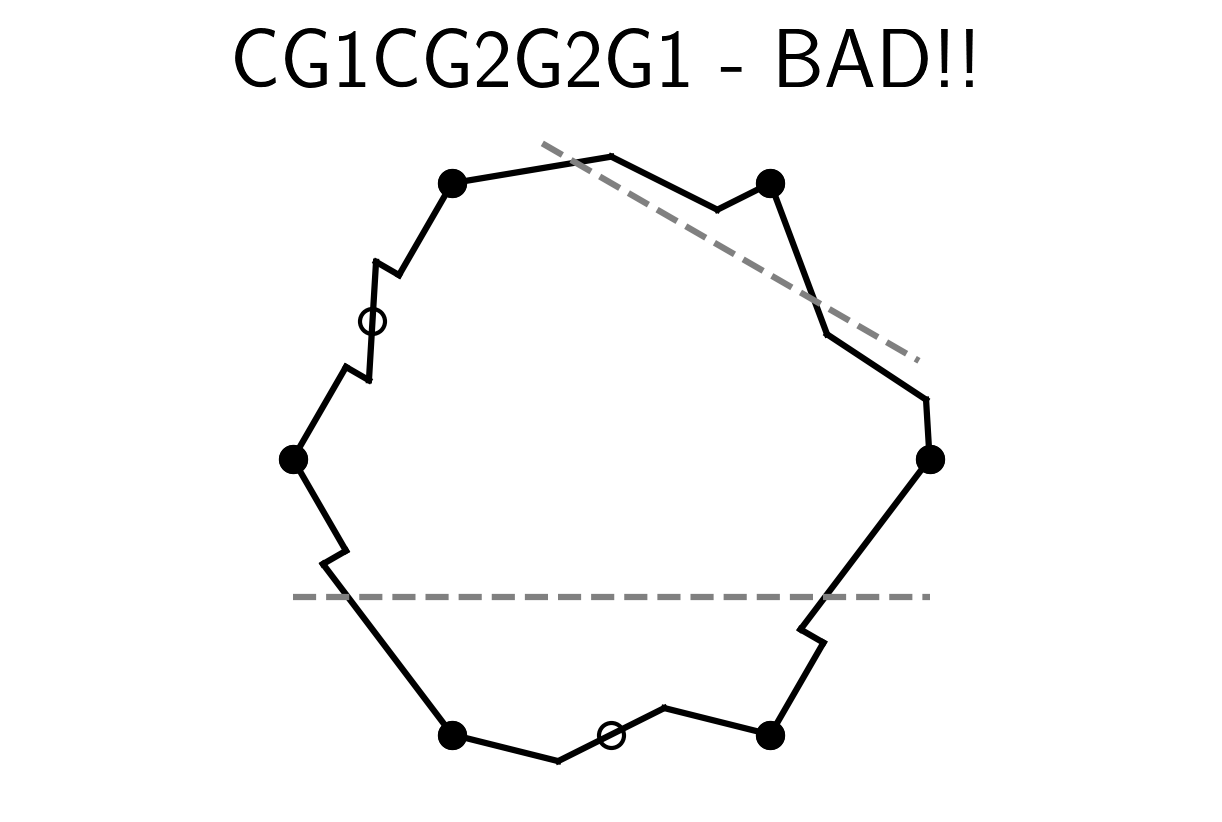

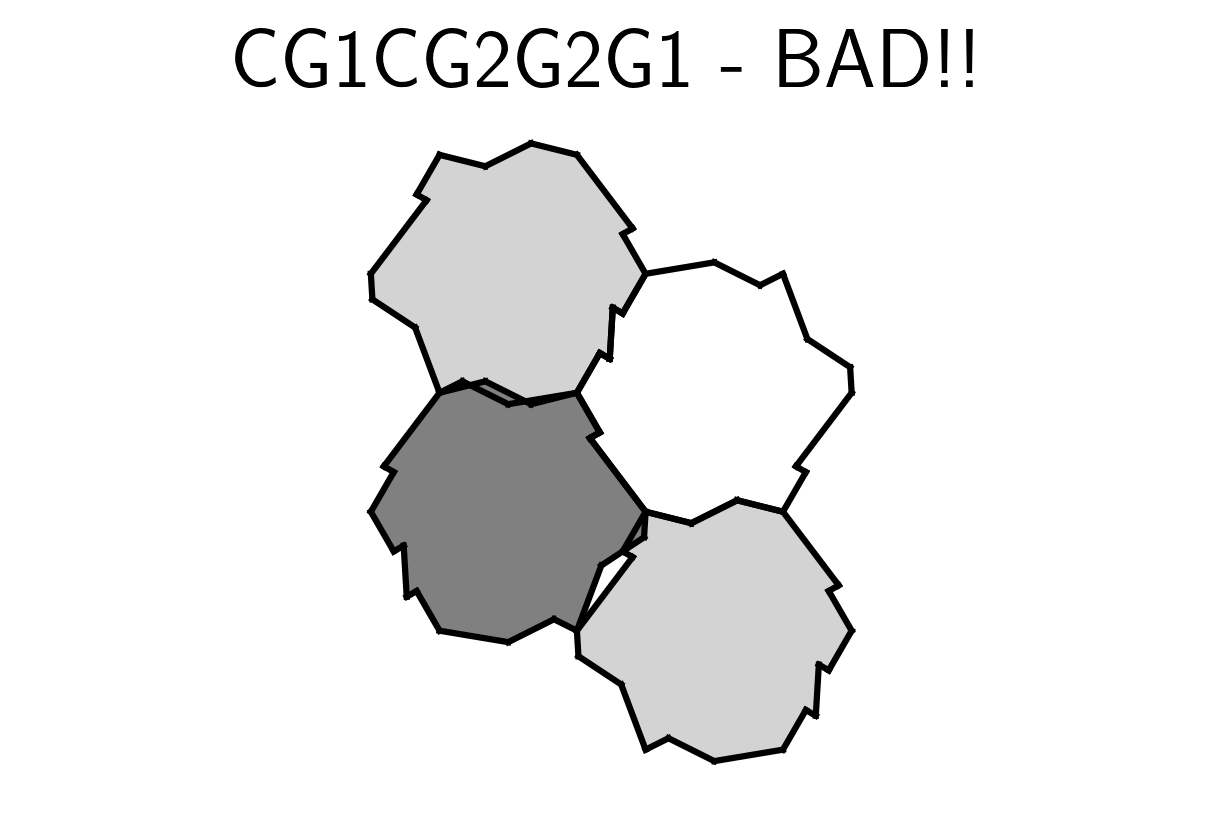

In [22]:
# test make tile
heeschType = 'CG1CG2G2G1'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType+' - BAD!!', fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
eps = 0.25
dx = eps*cosd(30)
dy = eps*sind(30)
x = np.array([0.5-dx, 1+0.5*cosd(60)+dx])
y = np.array([2*sind(60)+dy, 1.5*sind(60)-dy])
plt.plot(x, y, color='grey', linestyle='--')

b = 0.5*sind(60)
x = np.array([-0.5, 1.5])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight')

# tesselate
plt.figure()
plt.title(heeschType+' - BAD!!', fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about center of bottom edge
A = np.array([0.5, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 by 180 degrees about center of top left edge
A = np.array([-0.5*cosd(60), 1.5*sind(60)])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 to the left about horizontal axis passing throug midpoint of bottom-left edge
b = 0.5*sind(60)
axis = np.array([0, b])
scalefac = -(1 + cosd(60))
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

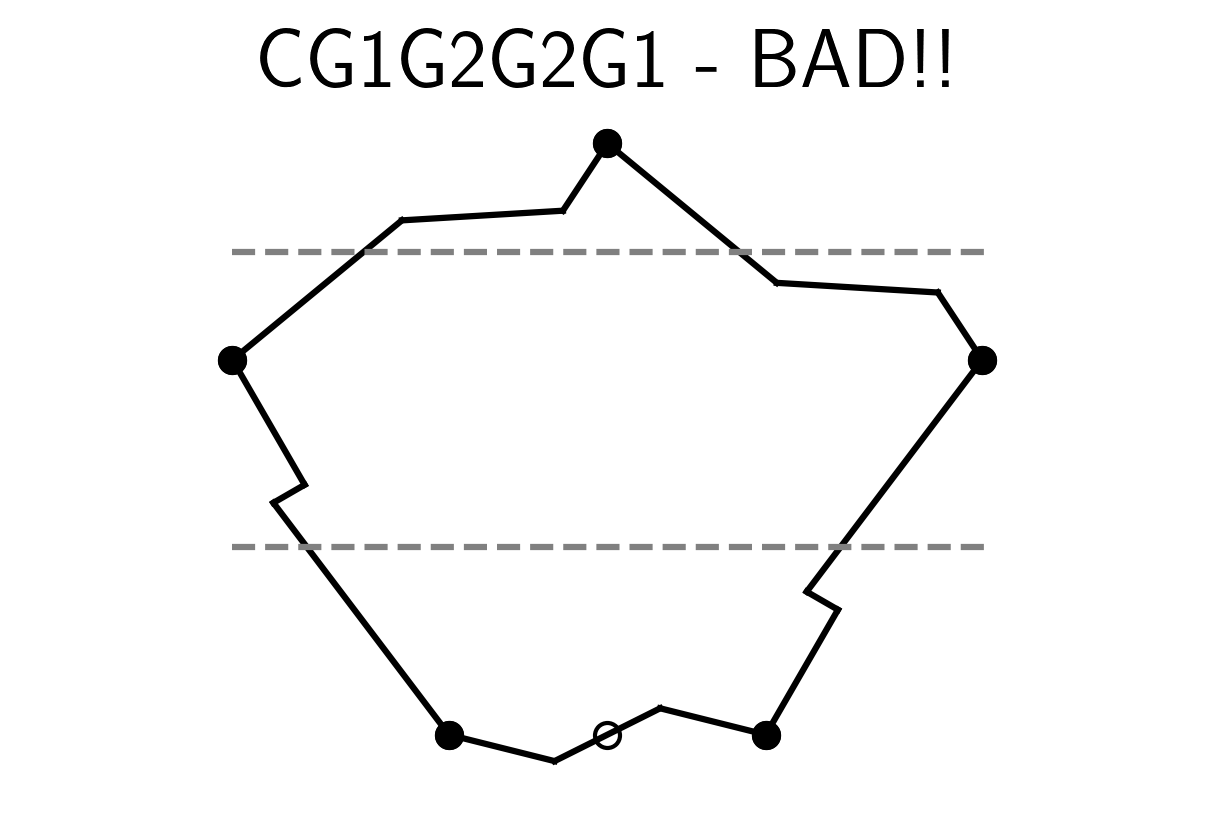

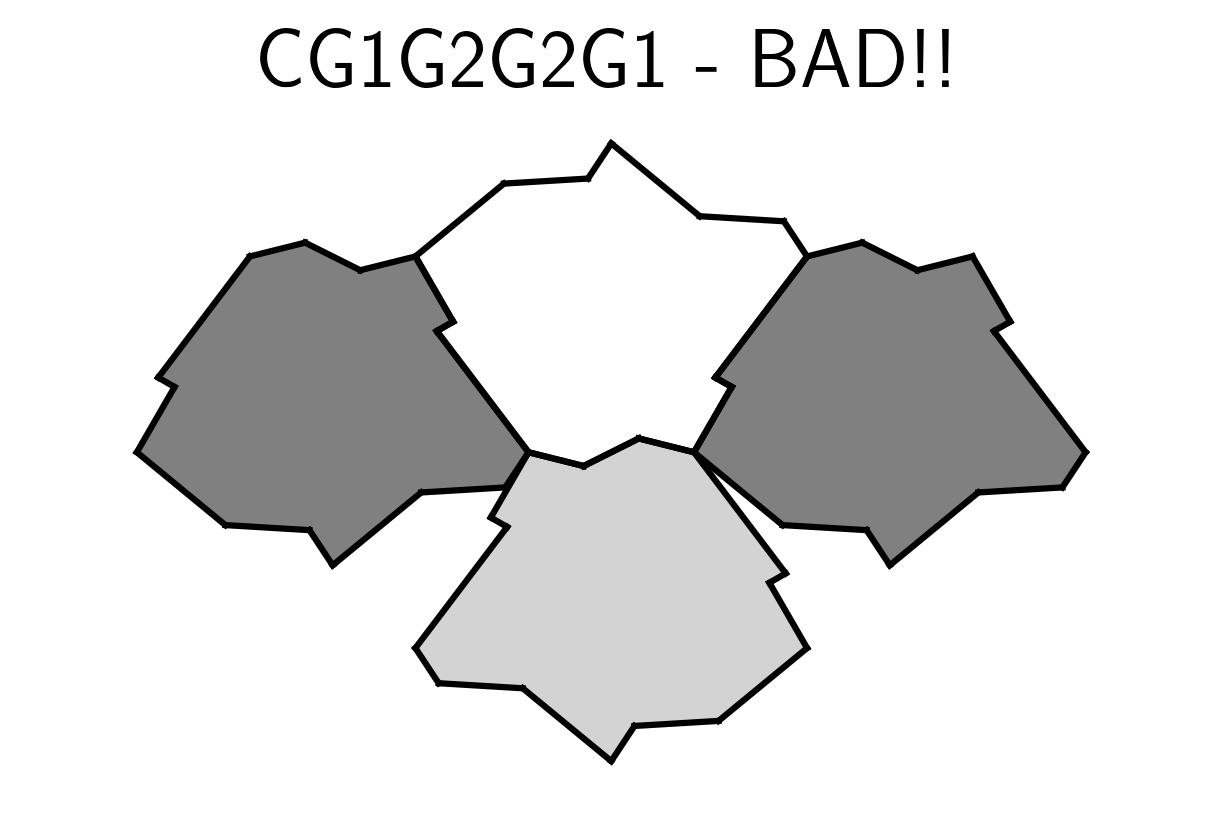

In [23]:
# test make tile
heeschType = 'CG1G2G2G1'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType+' - BAD!!', fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
b = cosd(30) + 0.25
x = np.array([-0.5, 1.25])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')

b = 0.5*cosd(30)
x = np.array([-0.5, 1.25])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight')

# tesselate
plt.figure()
plt.title(heeschType+' - BAD!!', fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about center of bottom edge
x = 0.5*(np.sqrt(3)-1)
A = np.array([x, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 to the left about center of bottom-left edge
b = 0.5*cosd(30)
axis = np.array([0, b])
scalefac = -(2*cosd(30) - 0.5)
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'grey')

# glide reflect tile 0 to the right about center of bottom-left edge
b = 0.5*cosd(30)
axis = np.array([0, b])
scalefac = 2*cosd(30) - 0.5
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

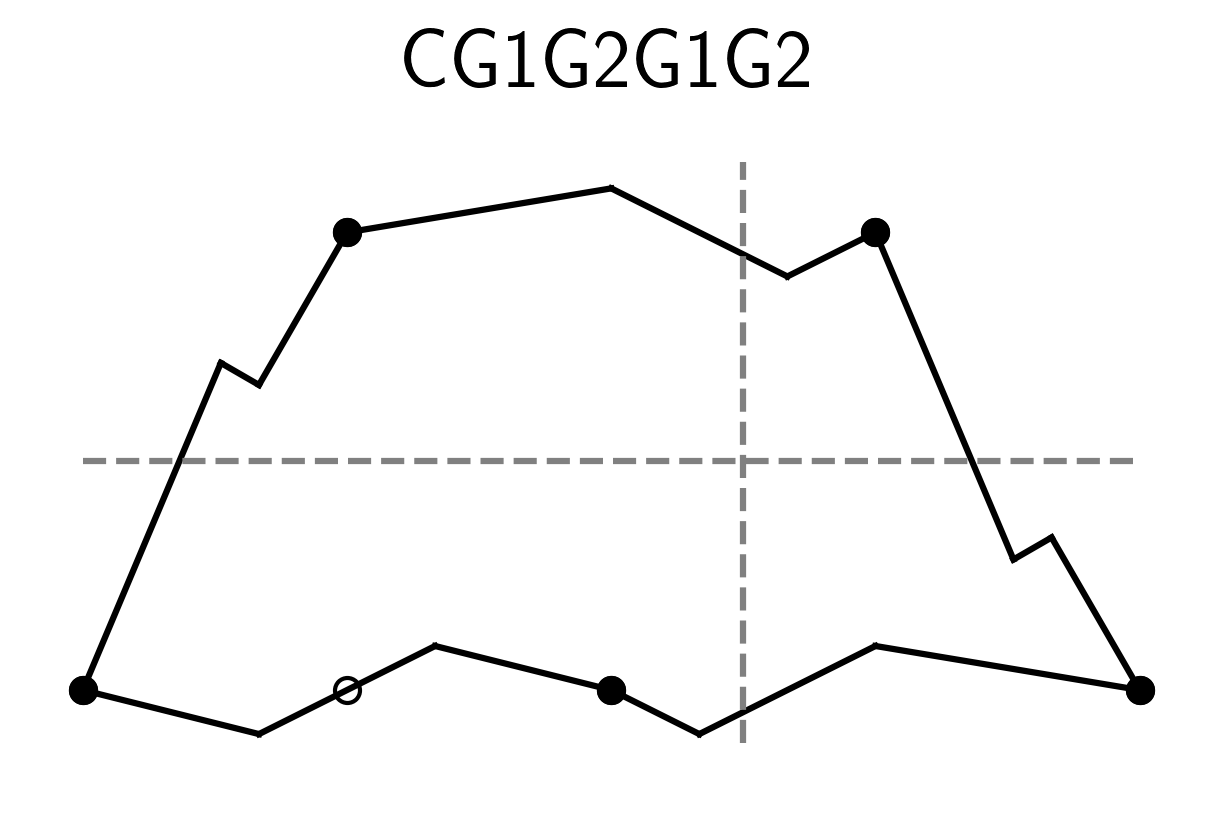

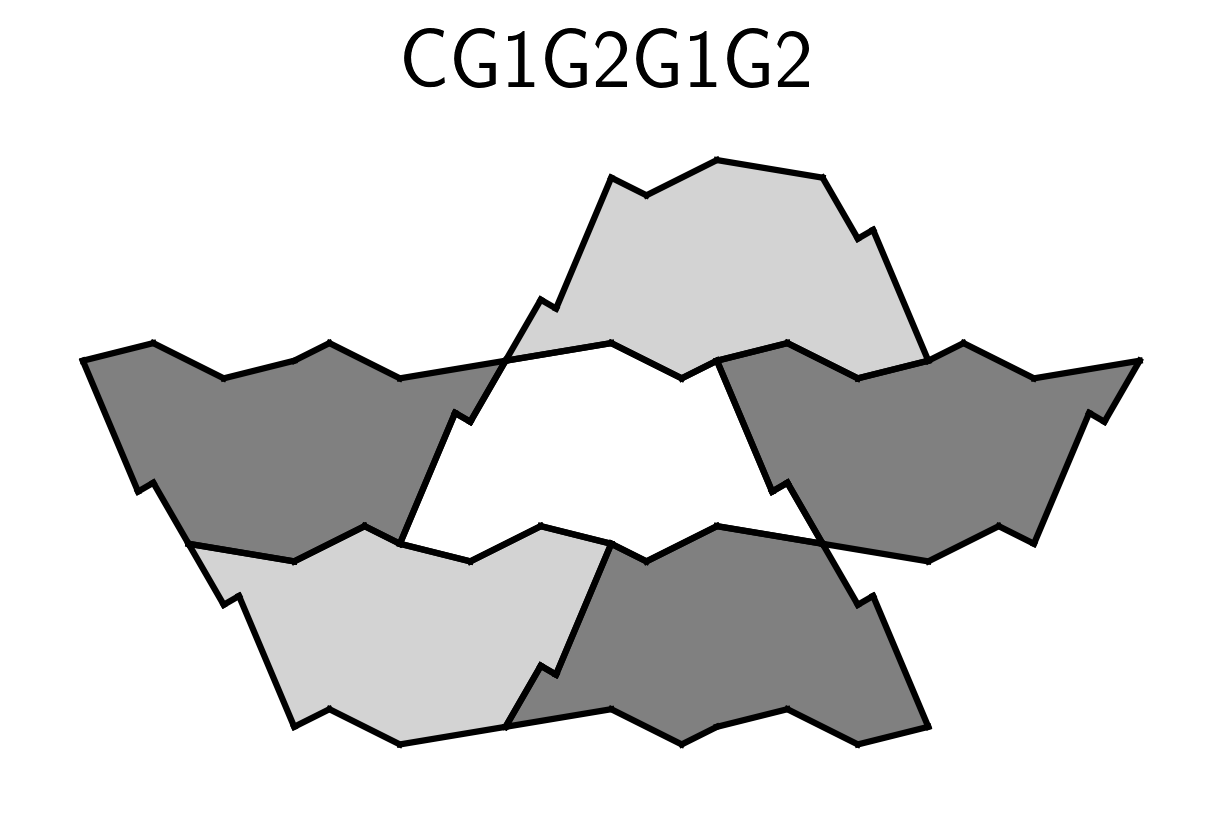

In [24]:
# test make tile
heeschType = 'CG1G2G1G2'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
b = 0.5*sind(60)
x = np.array([0, 2])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')

b = 1.25
x = np.array([b, b])
y = np.array([-0.1, 1])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about center of bottom edge
A = np.array([0.5, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 to the left about horizontal axis passing thru center of left edge
b = 0.5*sind(60)
axis = np.array([0, b])
scalefac = -1.5
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'grey')
        
# glide reflect tile 0 to the right about horizontal axis passing thru center of left edge
b = 0.5*sind(60)
axis = np.array([0, b])
scalefac = 1.5
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')

# glide reflect tile 0 upward about vertical axis passing thru x=1.25
b = 1.25
axis = np.array([90, b])
scalefac = sind(60)
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# glide reflect tile 0 downward about vertical axis passing thru x=1.25
b = 1.25
axis = np.array([90, b])
scalefac = -sind(60)
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

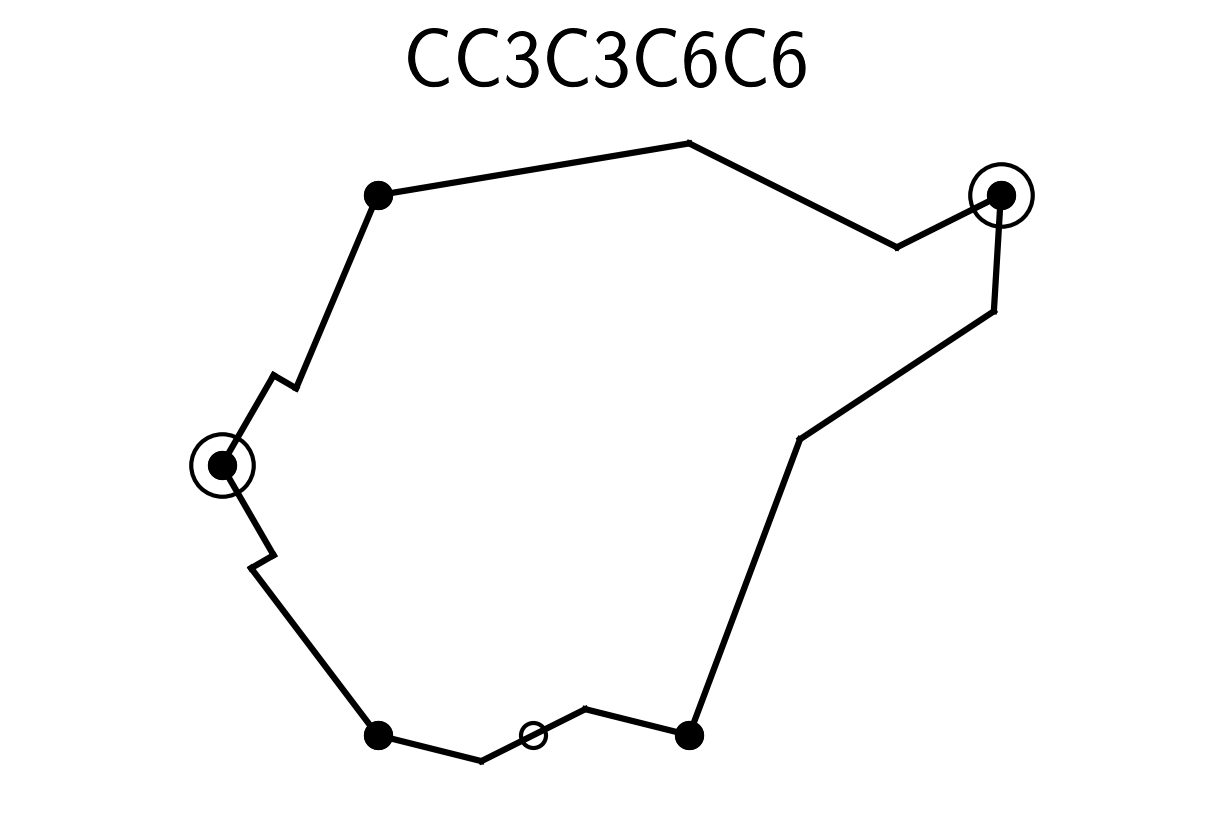

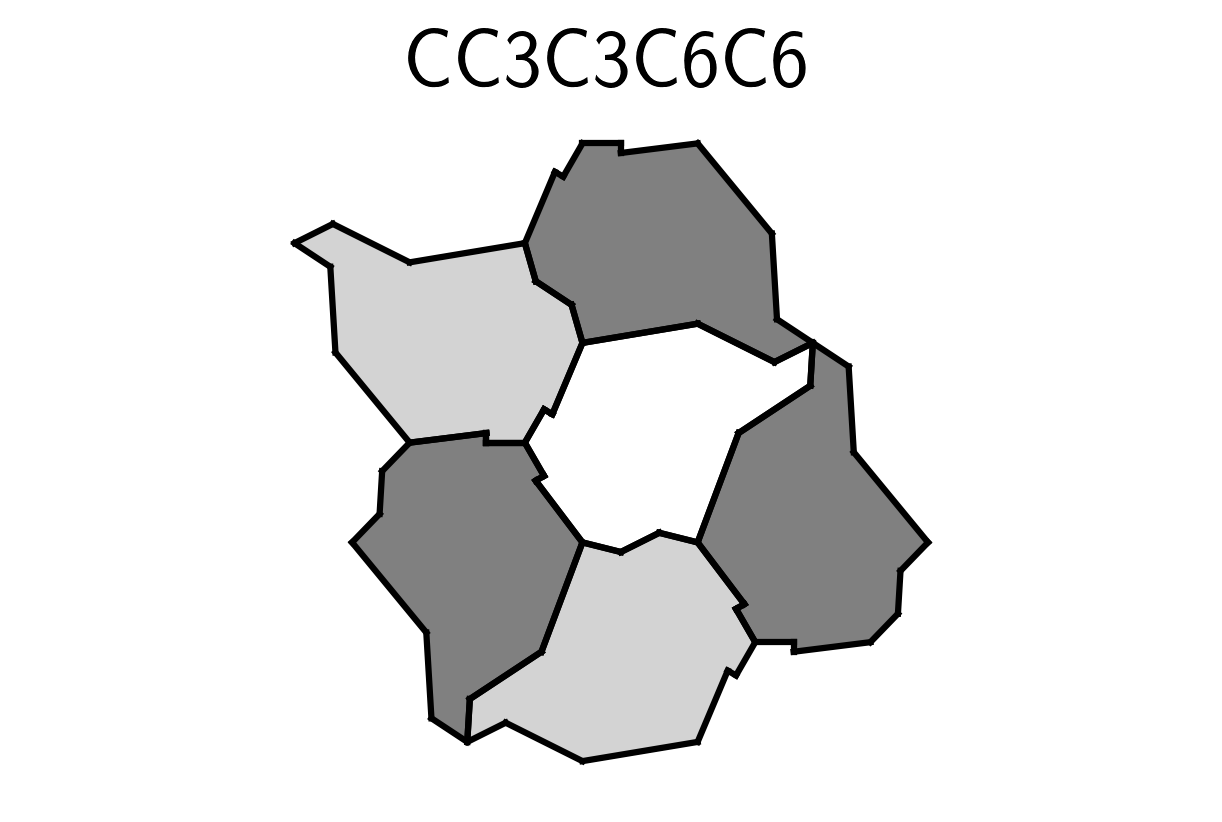

In [25]:
# test make tile
heeschType = 'CC3C3C6C6'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about center of bottom edge
A = np.array([0.5, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about leftmost vertex by -120 degrees
A = np.array([-0.5, sind(60)])
angle = -120
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 about leftmost vertex by 120 degrees
A = np.array([-0.5, sind(60)])
angle = 120
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about rightmost vertex by -60 degrees
A = np.array([2, 2*sind(60)])
angle = -60
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'grey')

# rotate tile 0 about rightmost vertex by 60 degrees
A = np.array([2, 2*sind(60)])
angle = 60
P5 = rotate(P0, A, angle)
plotPoints(P5)
colorTile(P5, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

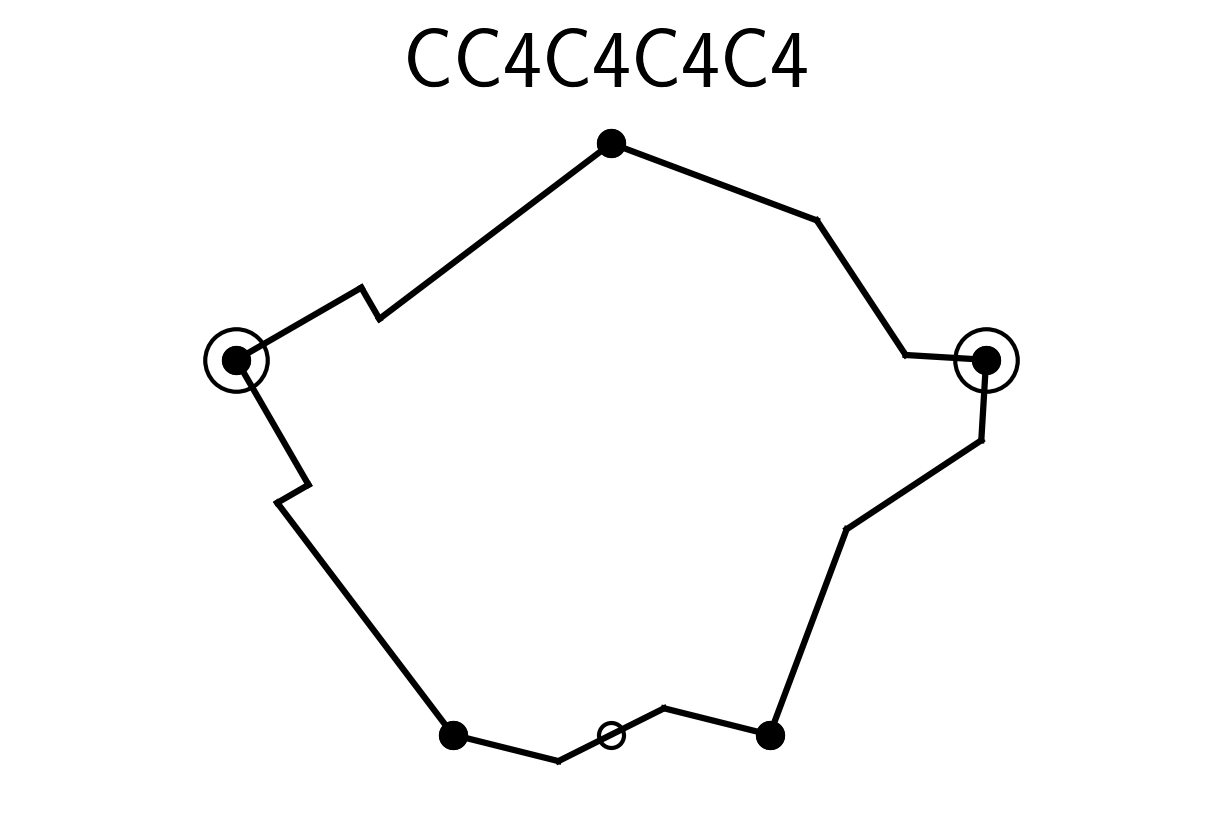

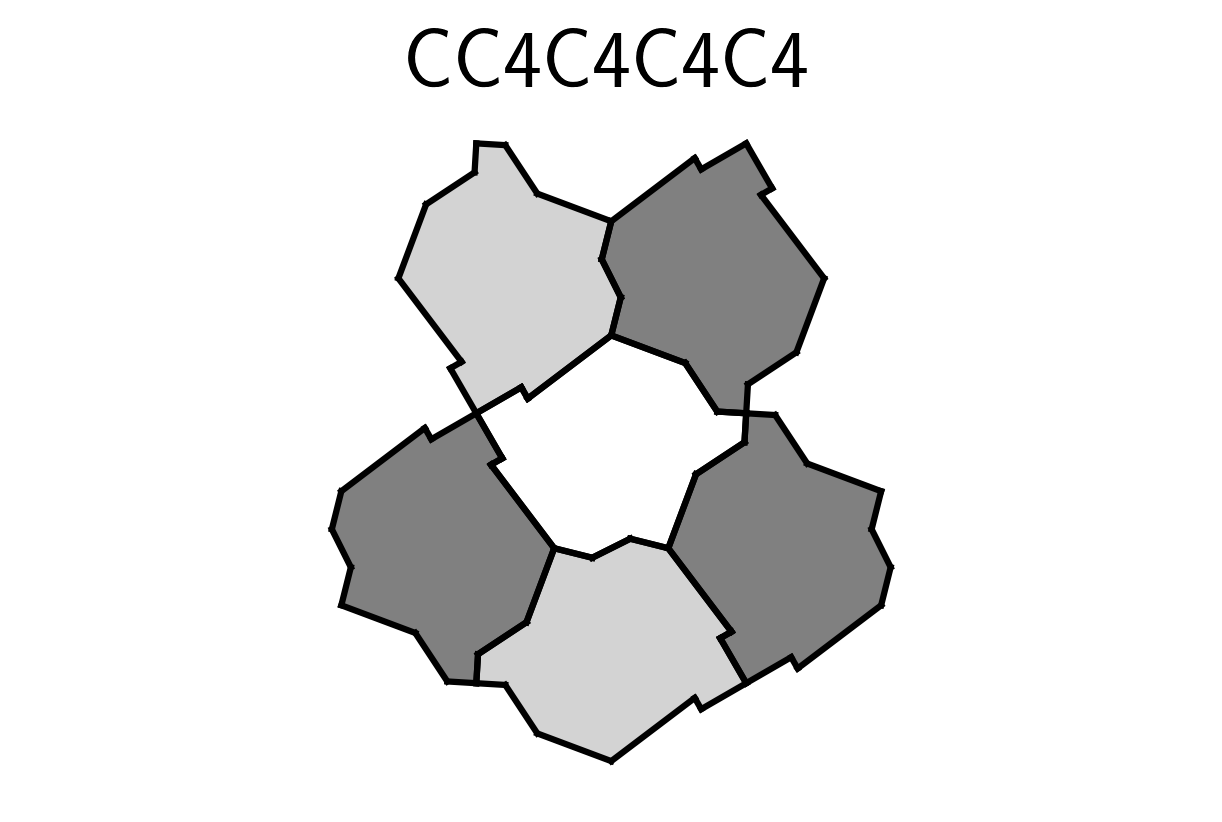

In [26]:
# test make tile
heeschType = 'CC4C4C4C4'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about center of bottom edge
x = 0.5*(np.sqrt(3)-1)
A = np.array([x, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 by -90 about leftmost vertex
A = np.array([-0.5, cosd(30)])
angle = -90
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 by 90 about leftmost vertex
A = np.array([-0.5, cosd(30)])
angle = 90
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 by 90 about rightmost vertex
A = np.array([2*cosd(30)-0.5, cosd(30)])
angle = 90
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'grey')

# rotate tile 0 by -90 about rightmost vertex
A = np.array([2*cosd(30)-0.5, cosd(30)])
angle = -90
P5 = rotate(P0, A, angle)
plotPoints(P5)
colorTile(P5, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

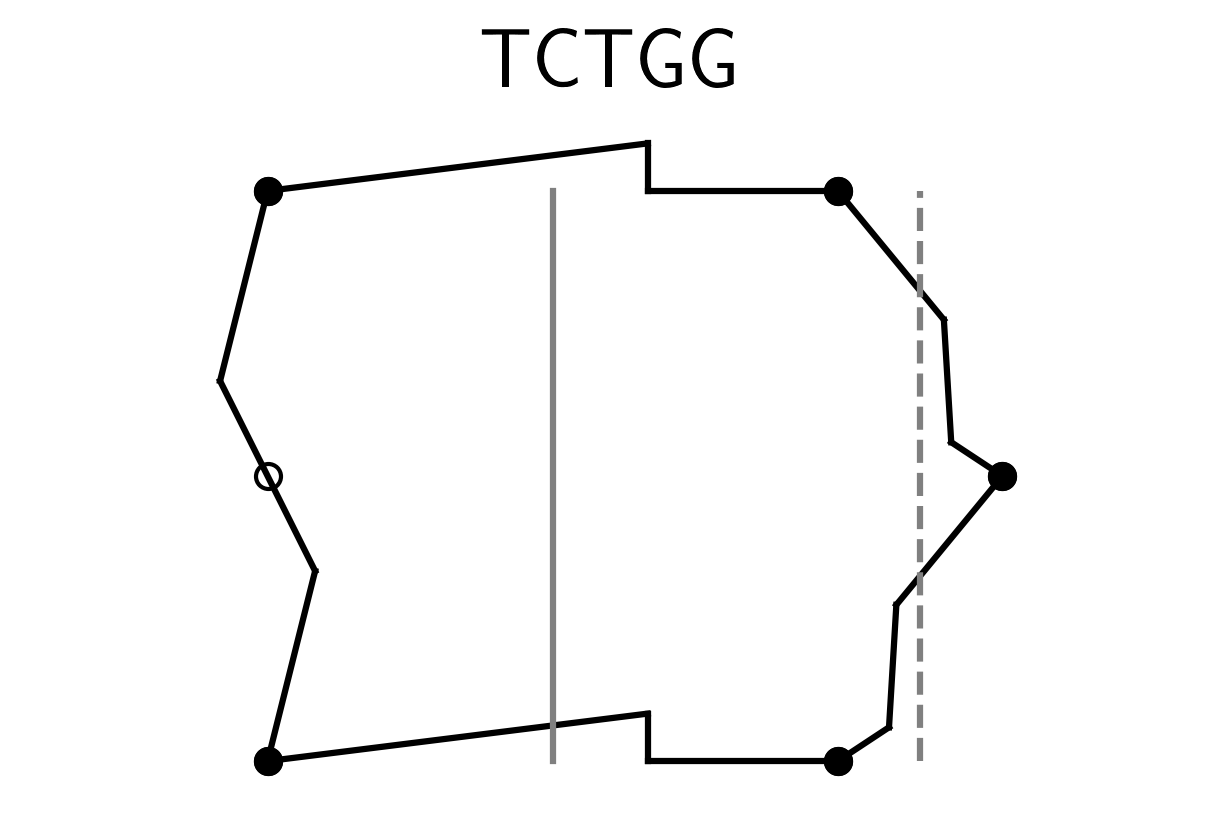

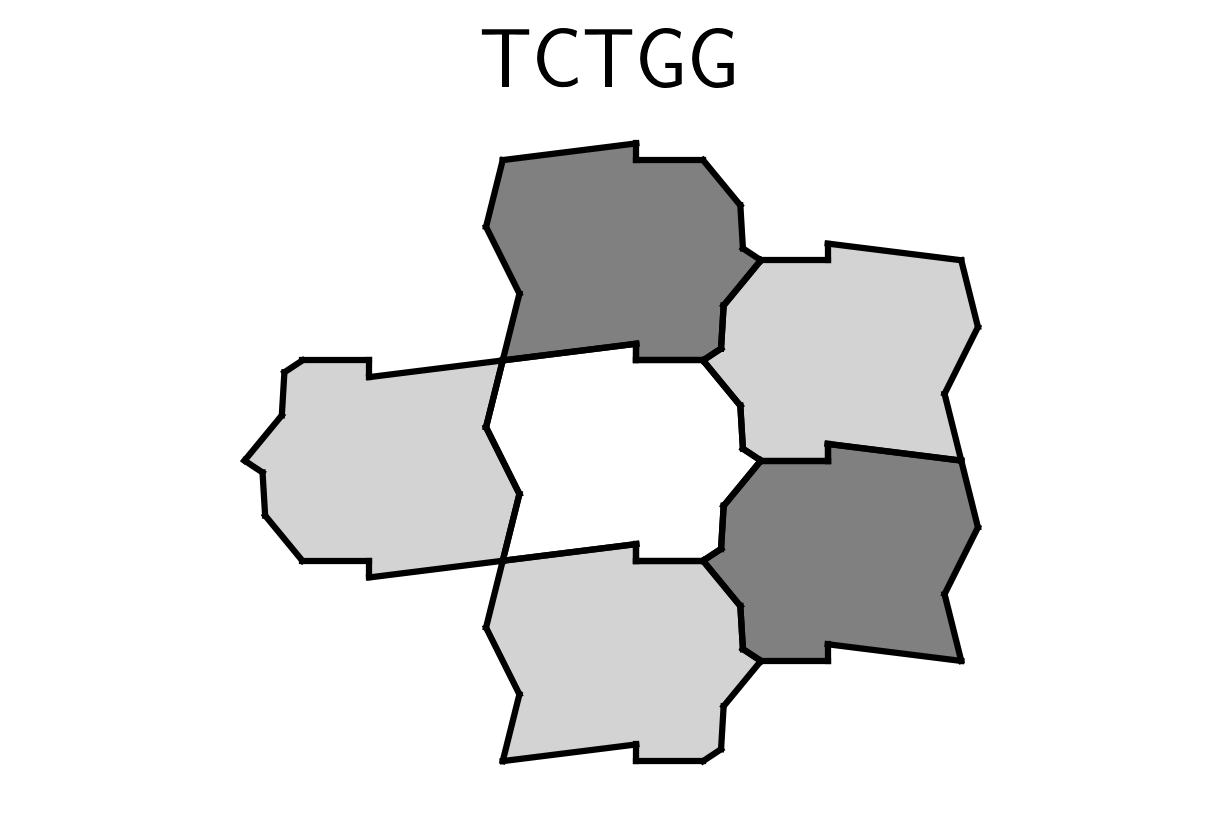

In [27]:
# test make tile
heeschType = 'TCTGG'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection and translatiun axes
h = 1./np.sqrt(3.)
b = 1+0.5*h*sind(30)
x = np.array([b, b])
y = np.array([0, 1])
plt.plot(x, y, color='grey', linestyle='--')

x = np.array([0.5, 0.5])
y = np.array([0, 1])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 vertically upward
shift = np.array([0, 1])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# translate tile 0 vertically downward
shift = np.array([0, -1])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about center of left edge
A = np.array([0,0.5])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# glide reflect tile 0 upward about a vertical axis passing thru the middle of edge 4
h = 1./np.sqrt(3.)
b = 1+0.5*h*sind(30)
axis = np.array([90, b])
scalefac = 1-h*cosd(30)
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# glide reflect tile 0 downward about a vertical axis passing thru the middle of edge 4
h = 1./np.sqrt(3.)
b = 1+0.5*h*sind(30)
axis = np.array([90, b])
scalefac = -(1-h*cosd(30))
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

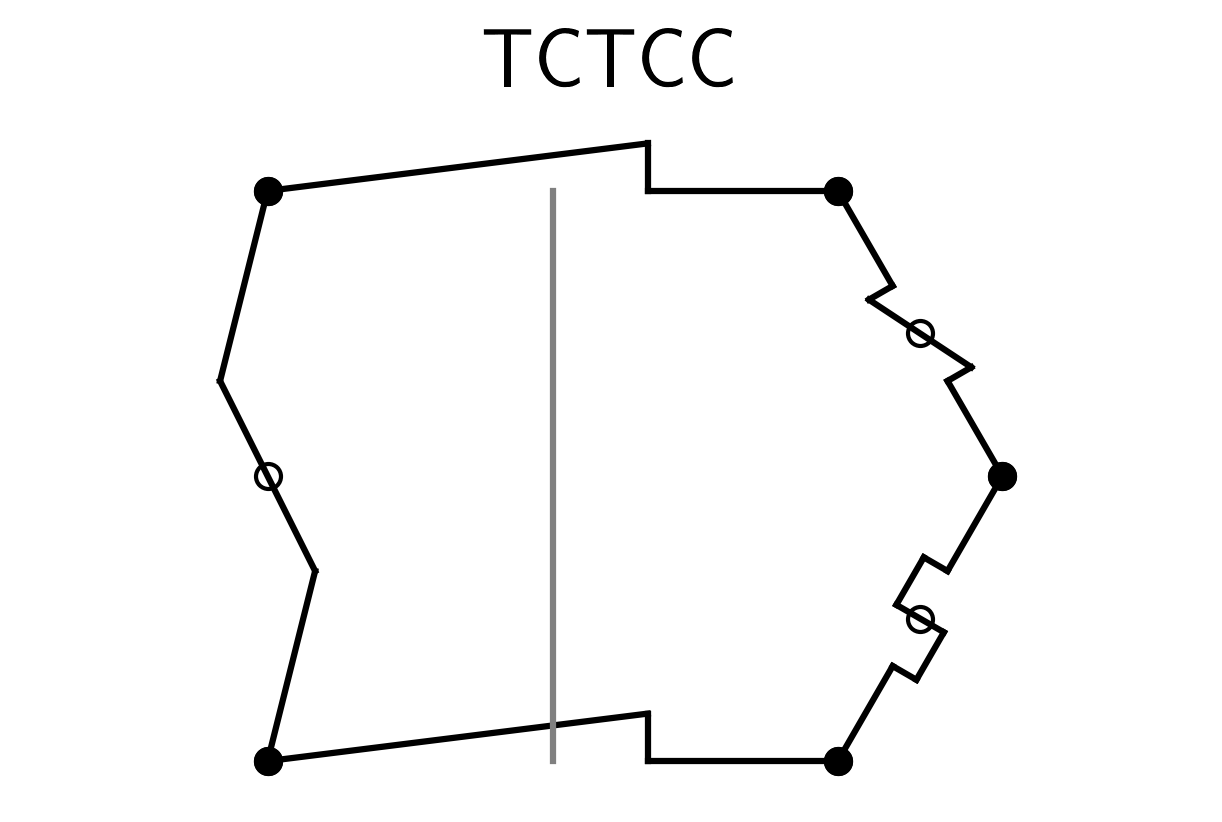

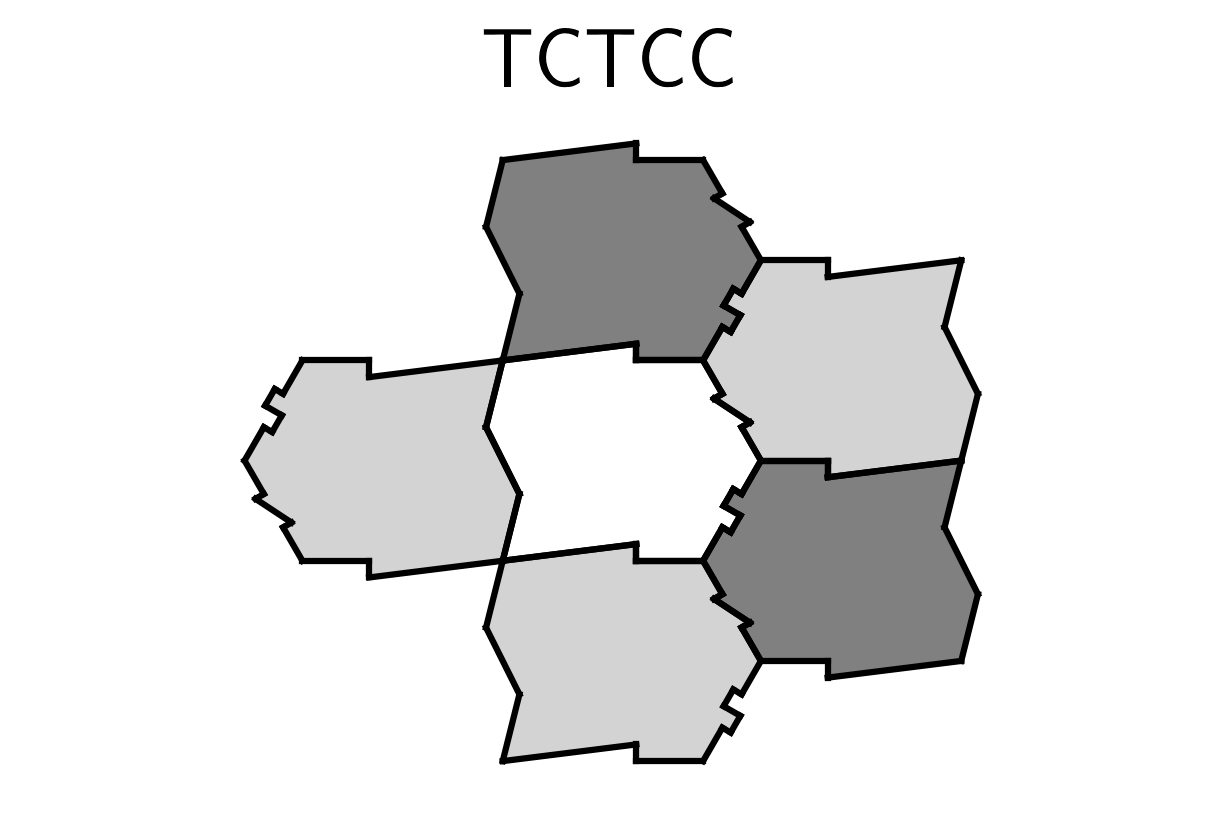

In [28]:
# test make tile
heeschType = 'TCTCC'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation direction
x = np.array([0.5, 0.5])
y = np.array([0, 1])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 vertically upward
shift = np.array([0, 1])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# translate tile 0 vertically downward
shift = np.array([0, -1])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about center of left edge
A = np.array([0,0.5])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about center of upper-right edge
h = 1./np.sqrt(3.)
A = np.array([1+0.5*h*sind(30), 1-0.5*h*cosd(30)])
angle = 180
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# rotate tile 0 about center of lower-right edge
h = 1./np.sqrt(3.)
A = np.array([1+0.5*h*sind(30), 0.5*h*cosd(30)])
angle = 180
P5 = rotate(P0, A, angle)
plotPoints(P5)
colorTile(P5, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

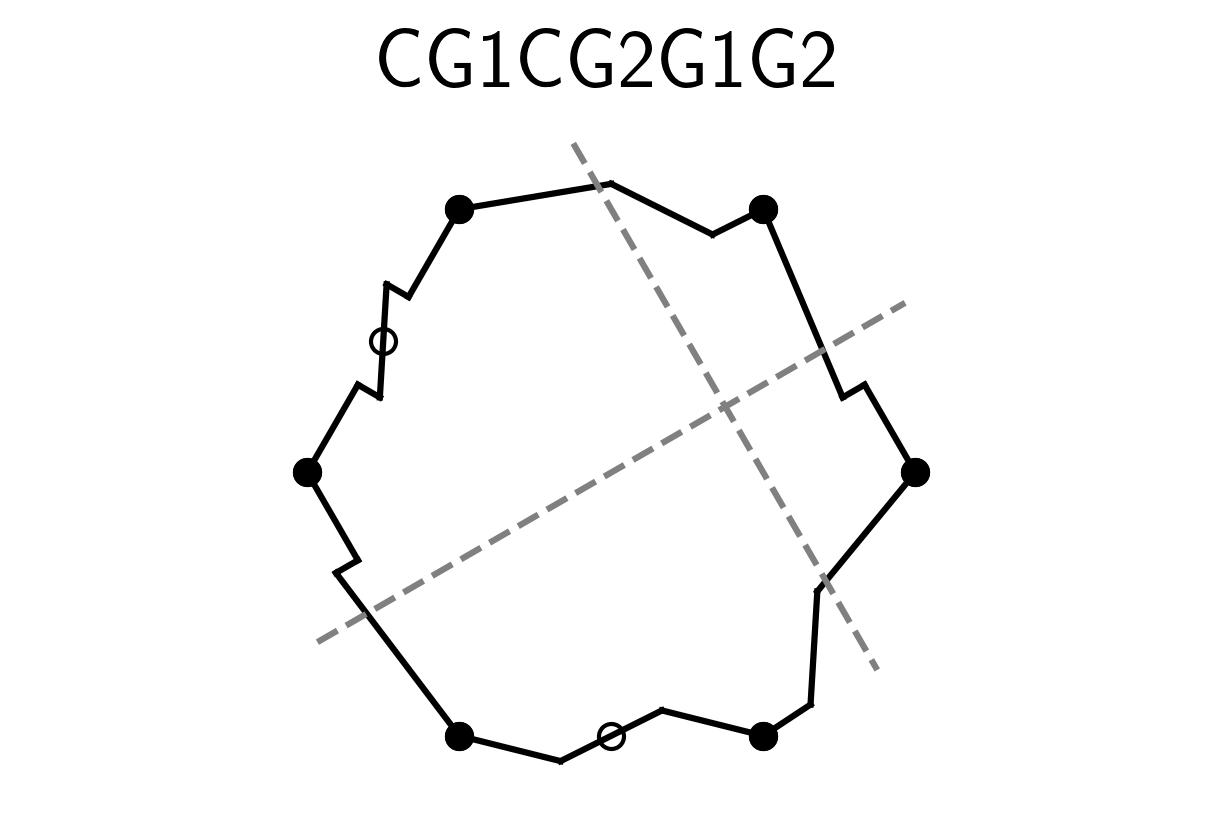

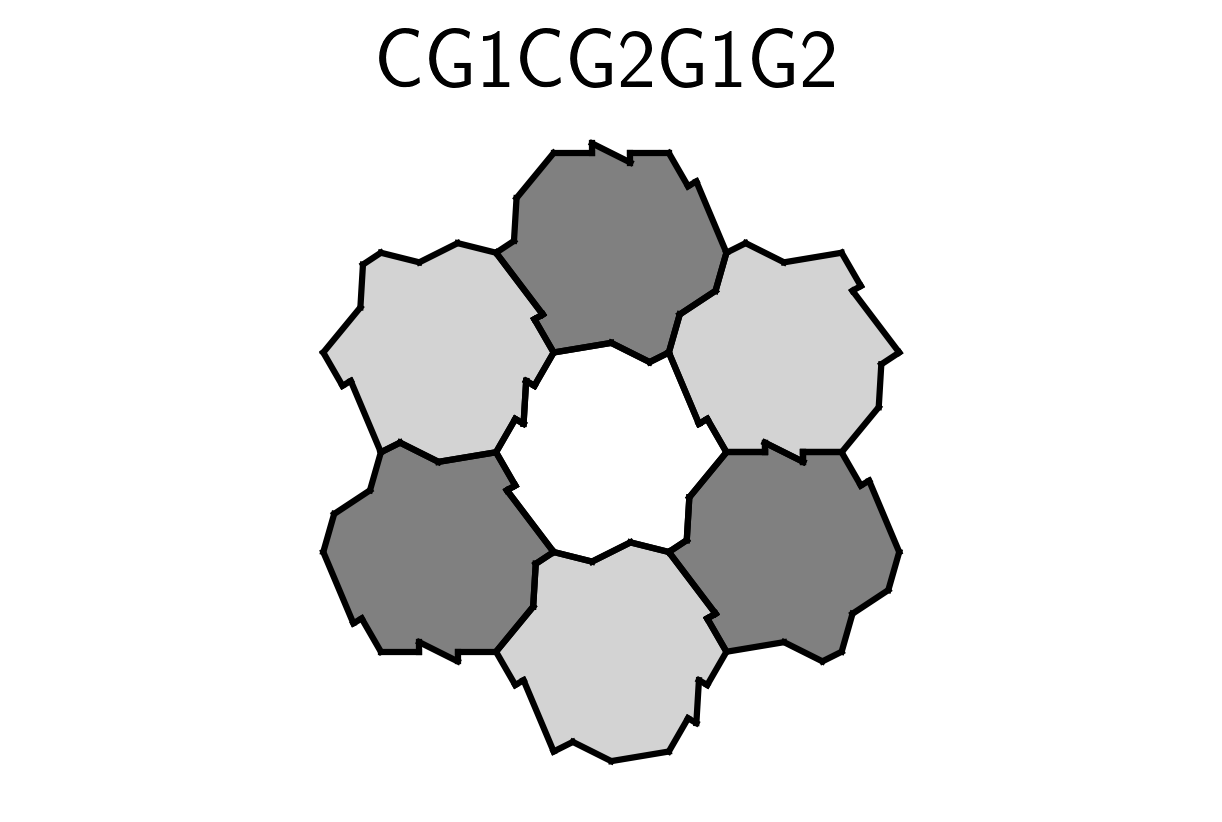

In [29]:
# test make tile
heeschType = 'CG1CG2G1G2'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
eps = 0.25
dx = eps*cosd(60)
dy = eps*sind(60)
x = np.array([0.5-dx, 1+0.5*cosd(60)+dx])
y = np.array([2*sind(60)+dy, 0.5*sind(60)-dy])
plt.plot(x, y, color='grey', linestyle='--')

eps = 0.25
dx = eps*cosd(30)
dy = eps*sind(30)
x = np.array([-0.5*cosd(60)-dx, 1+0.5*cosd(60)+dx])
y = np.array([0.5*sind(60)-dy, 1.5*sind(60)+dy])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 by 180 degrees about midpoint of bottom edge
A = np.array([0.5, 0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 by 180 degrees about midpoint of top left edge
A = np.array([-0.5*cosd(60), 1.5*sind(60)])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 to the left about upward diagonal axis passing through middle of edge 2
b = 0.5/cosd(30)
axis = np.array([30, b])
scalefac = -2*sind(60)
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')

# glide reflect tile 0 to the right about upward diagonal axis passing through middle of edge 2
b = 0.5/cosd(30)
axis = np.array([30, b])
scalefac = 2*sind(60)
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')
        
# glide reflect tile 0 upward about downward diagonal axis passing through middle of edge 4
b = 2*sind(60) + 0.5*tand(60)
axis = np.array([-60, b])
scalefac = -(1 + cosd(60))
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'grey')

# glide reflect tile 0 downward about downward diagonal axis passing through middle of edge 4
b = 2*sind(60) + 0.5*tand(60)
axis = np.array([-60, b])
scalefac = 1 + cosd(60)
P6 = glideReflect(P0, axis, scalefac)
plotPoints(P6)
colorTile(P6, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

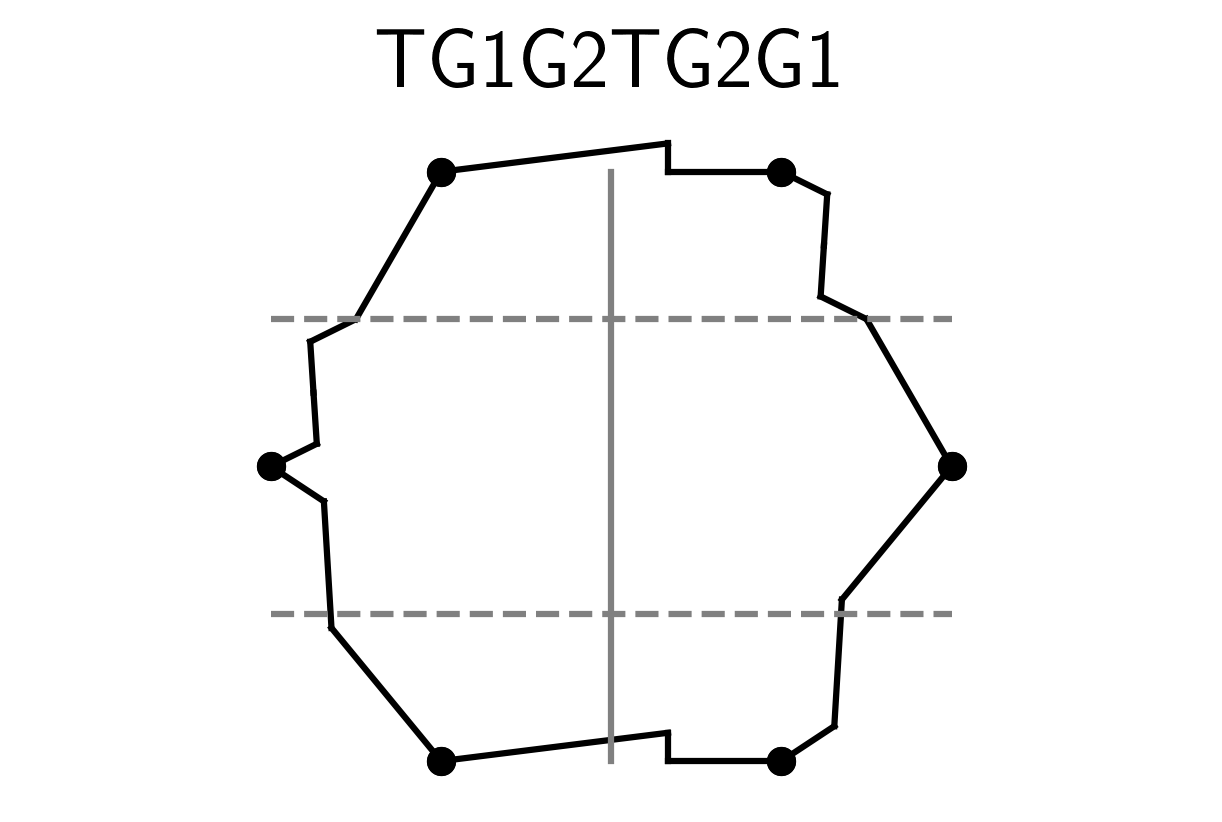

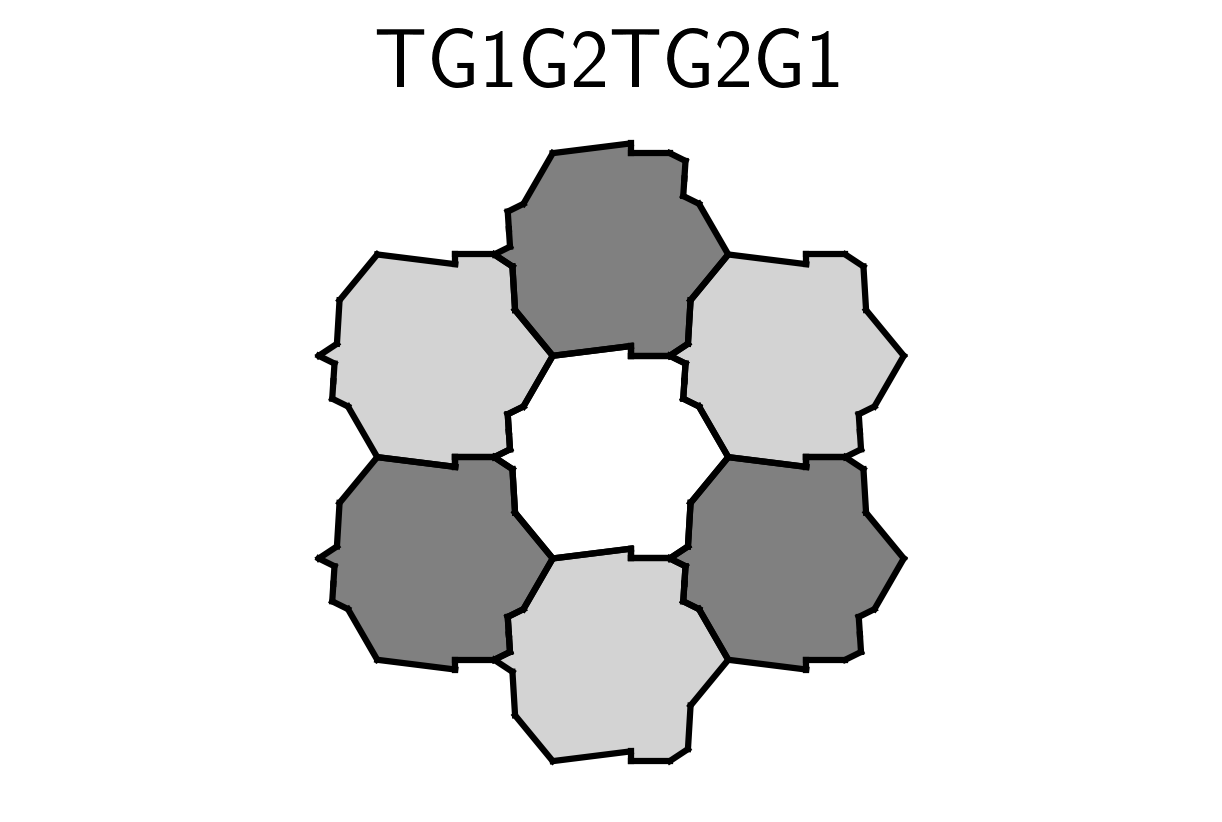

In [30]:
# test make tile
heeschType = 'TG1G2TG2G1'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide and translation axes
b = 0.5*sind(60)
x = np.array([-0.5, 1.5])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')

b = 1.5*sind(60)
x = np.array([-0.5, 1.5])
y = np.array([b, b])
plt.plot(x, y, color='grey', linestyle='--')

x = np.array([0.5, 0.5])
y = np.array([0, 2*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 downward
shift = np.array([0, -2*sind(60)])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# translate tile 0 upward
shift = np.array([0, 2*sind(60)])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# glide reflect tile 0 to left about horizontal axis passing thru midpoints of edges 2 and 5
b = 0.5*sind(60)
angle = 0
axis = np.array([angle, b])
scalefac = -(1+cosd(60))
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')

# glide reflect tile 0 to right about horizontal axis passing thru midpoints of edges 2 and 5
b = 0.5*sind(60)
angle = 0
axis = np.array([angle, b])
scalefac = 1+cosd(60)
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'grey')

# glide reflect tile 0 to left about horizontal axis passing thru midpoint of edges 3 and 4
b = 1.5*sind(60)
angle = 0
axis = np.array([angle, b])
scalefac = -(1+cosd(60))
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'lightgrey')

# glide reflect tile 0 to left about horizontal axis passing thru midpoint of edges 3 and 4
b = 1.5*sind(60)
angle = 0
axis = np.array([angle, b])
scalefac = 1+cosd(60)
P6 = glideReflect(P0, axis, scalefac)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

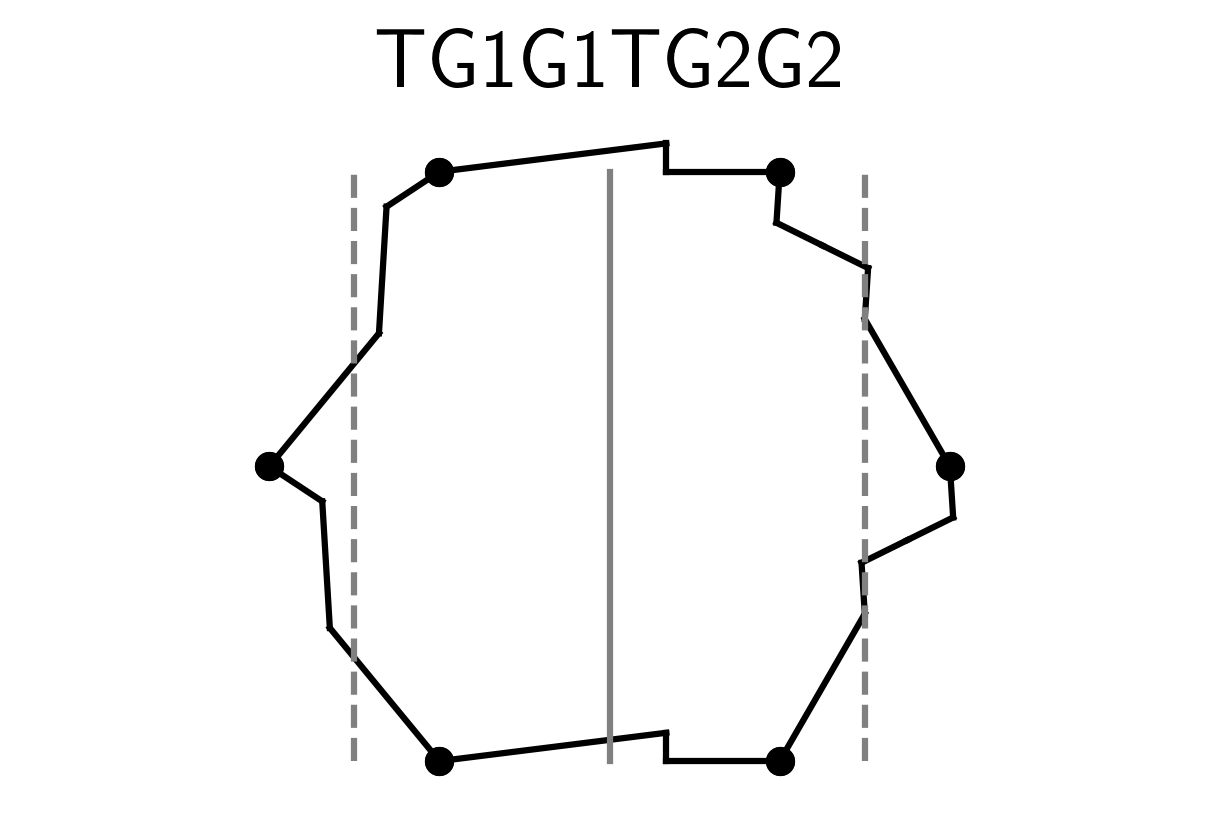

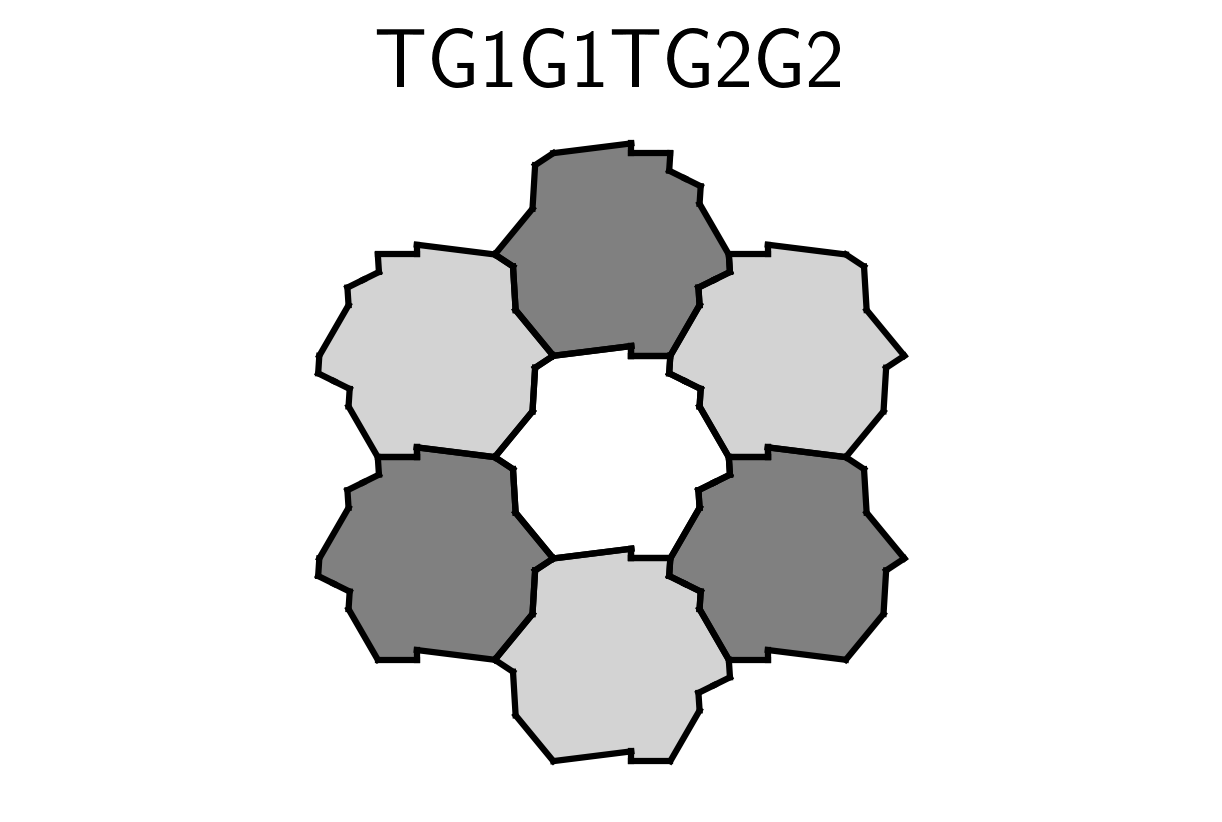

In [31]:
# test make tile
heeschType = 'TG1G1TG2G2'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation direction and glide reflection axes
b = -0.5*cosd(60)
x = np.array([b,b])
y = np.array([0, 2*sind(60)])
plt.plot(x, y, color='grey', linestyle='--')

b = 1+0.5*cosd(60)
x = np.array([b,b])
y = np.array([0, 2*sind(60)])
plt.plot(x, y, color='grey', linestyle='--')

x = np.array([0.5, 0.5])
y = np.array([0, 2*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 downward
shift = np.array([0, -2*sind(60)])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# translate tile 0 upward
shift = np.array([0, 2*sind(60)])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# glide reflect tile 0 downward about vertical axis thru midpoint of leftmost edges
b = 1+0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = -sind(60)
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'grey')

# glide reflect tile 0 upward about vertical axis thru midpoint of leftmost edges
b = -0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = sind(60)
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# glide reflect tile 0 downward about vertical axis thru midpoint of rightmost edges
b = -0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = -sind(60)
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'grey')

# glide reflect tile 0 upward about vertical axis thru midpoint of rightmost edges
b = 1+0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = sind(60)
P6 = glideReflect(P0, axis, scalefac)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

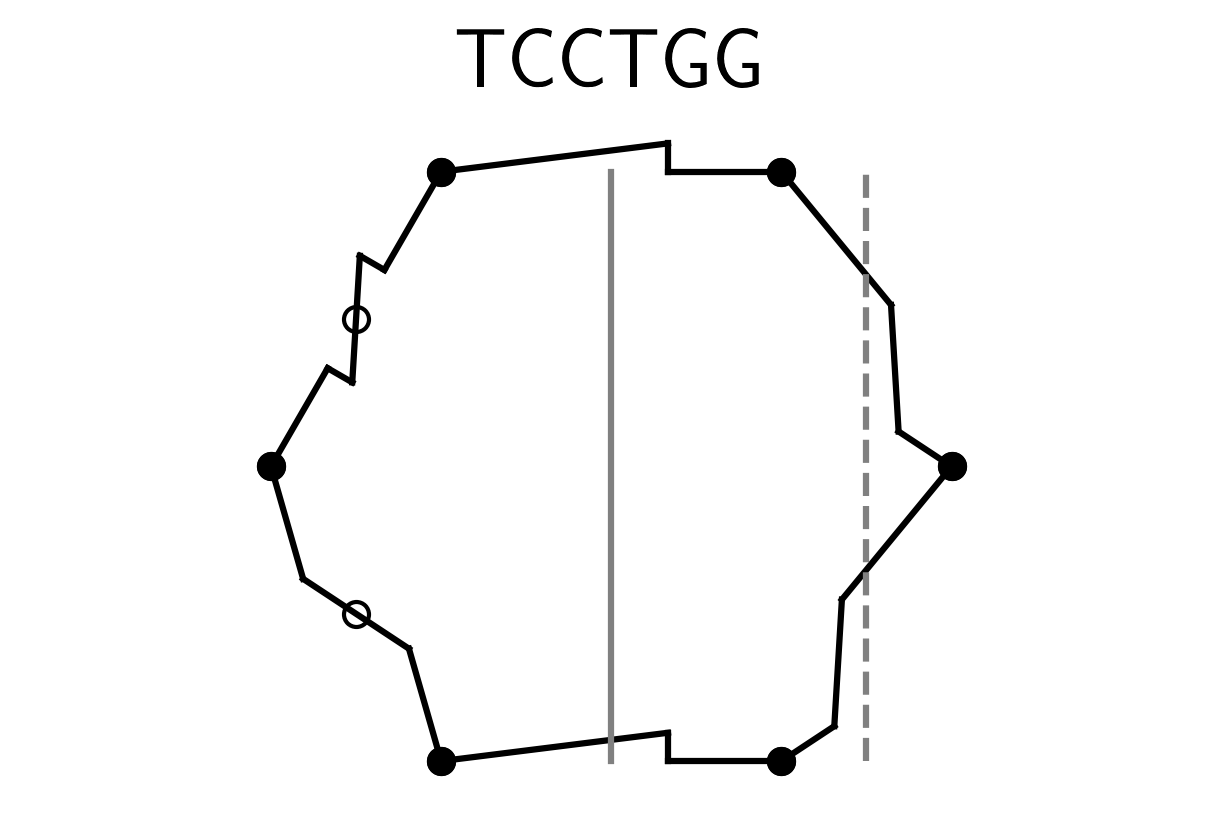

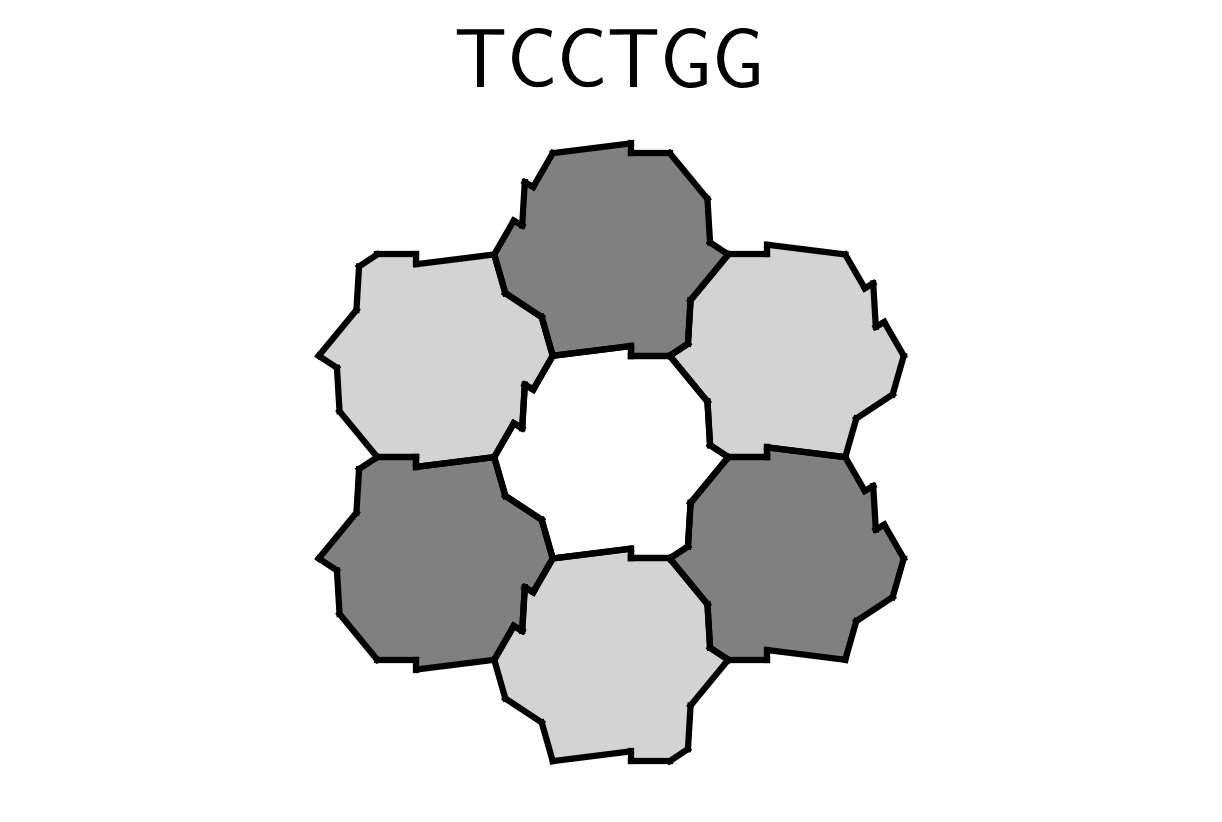

In [32]:
# test make tile
heeschType = 'TCCTGG'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation direction and glide reflection axis
x = np.array([0.5,0.5])
y = np.array([0,2*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')

x = np.array([1+0.5*cosd(60), 1+0.5*cosd(60)])
y = np.array([0,2*sind(60)])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 downward
shift = np.array([0, -2*sind(60)])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# translate tile 0 upward
shift = np.array([0, 2*sind(60)])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 by 180 degrees about midpoint of bottom left edge
A = np.array([-0.5*cosd(60), 0.5*sind(60)])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'grey')

# rotate tile 0 by 180 degrees about midpoint of upper left edge
A = np.array([-0.5*cosd(60), 1.5*sind(60)])
angle = 180
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# glide reflect tile 0 downward about vertical axis thru midpoint of rightmost edges
b = 1+0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = -sind(60)
P5 = glideReflect(P0, axis, scalefac)
plotPoints(P5)
colorTile(P5, 'grey')

# glide reflect tile 0 upward about vertical axis thru midpoint of rightmost edges
b = 1+0.5*cosd(60)
angle = 90
axis = np.array([angle, b])
scalefac = sind(60)
P6 = glideReflect(P0, axis, scalefac)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

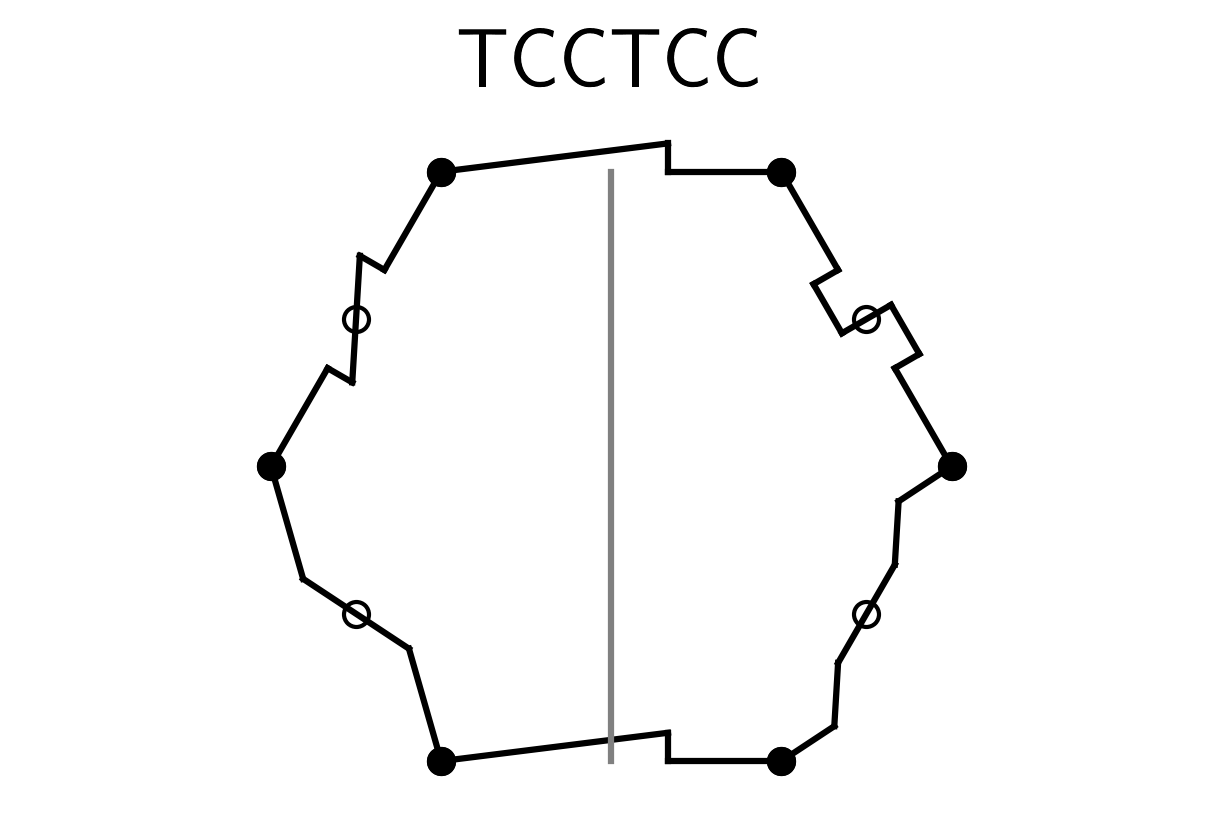

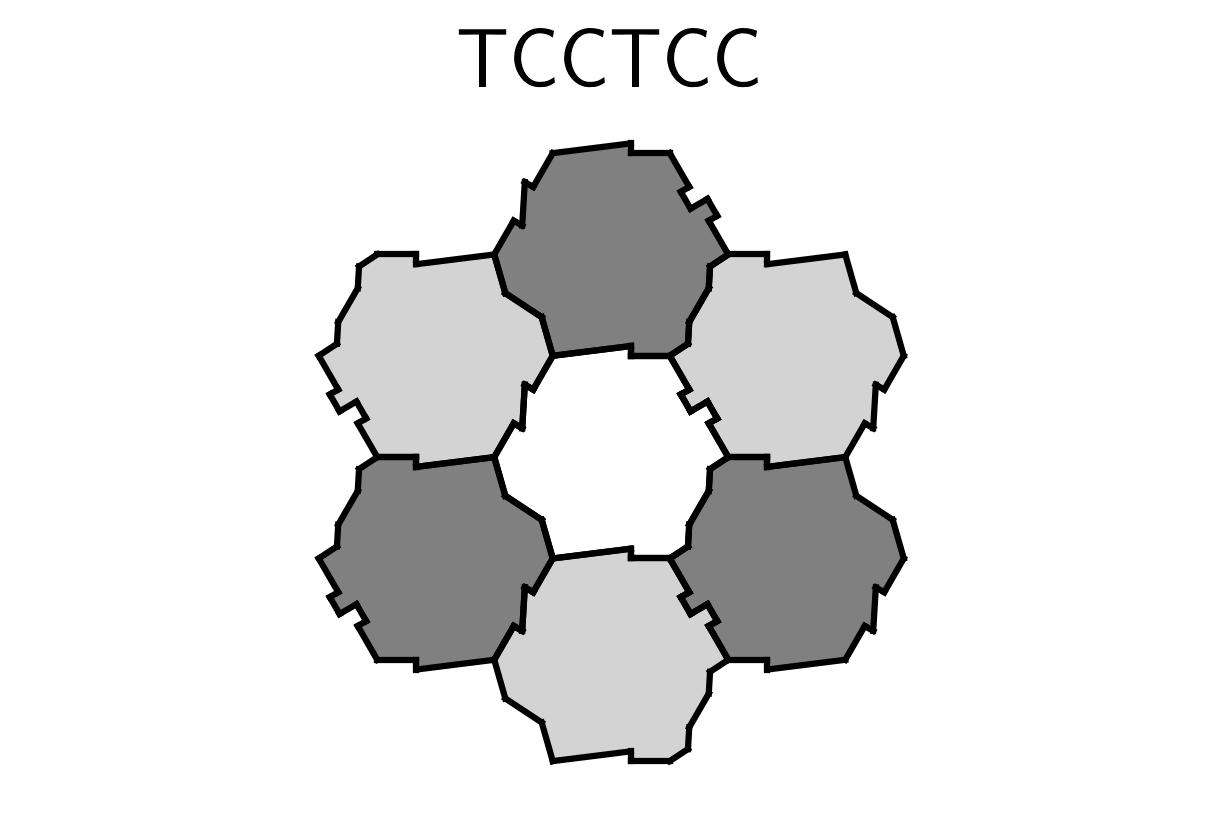

In [33]:
# test make tile
heeschType = 'TCCTCC'

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation directions
x = np.array([0.5,0.5])
y = np.array([0,2*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 vertically downward
shift = np.array([0, -2*sind(60)])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# translate tile 0 vertically upward
shift = np.array([0, 2*sind(60)])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 around center of bottom-left edge
A = np.array([0.5*cosd(120), 0.5*sind(120)])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'grey')

# rotate tile 0 around center of upper-left edge
A = np.array([0.5*cosd(120), 0.5*sind(120) + sind(60)])
angle = 180
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# rotate tile 0 around center of bottom-right edge
A = np.array([1+0.5*cosd(60), 0.5*sind(60)])
angle = 180
P5 = rotate(P0, A, angle)
plotPoints(P5)
colorTile(P5, 'grey')

# rotate tile 0 around center of upper-right edge
A = np.array([1+0.5*cosd(60), 1.5*sind(60)])
angle = 180
P6 = rotate(P0, A, angle)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

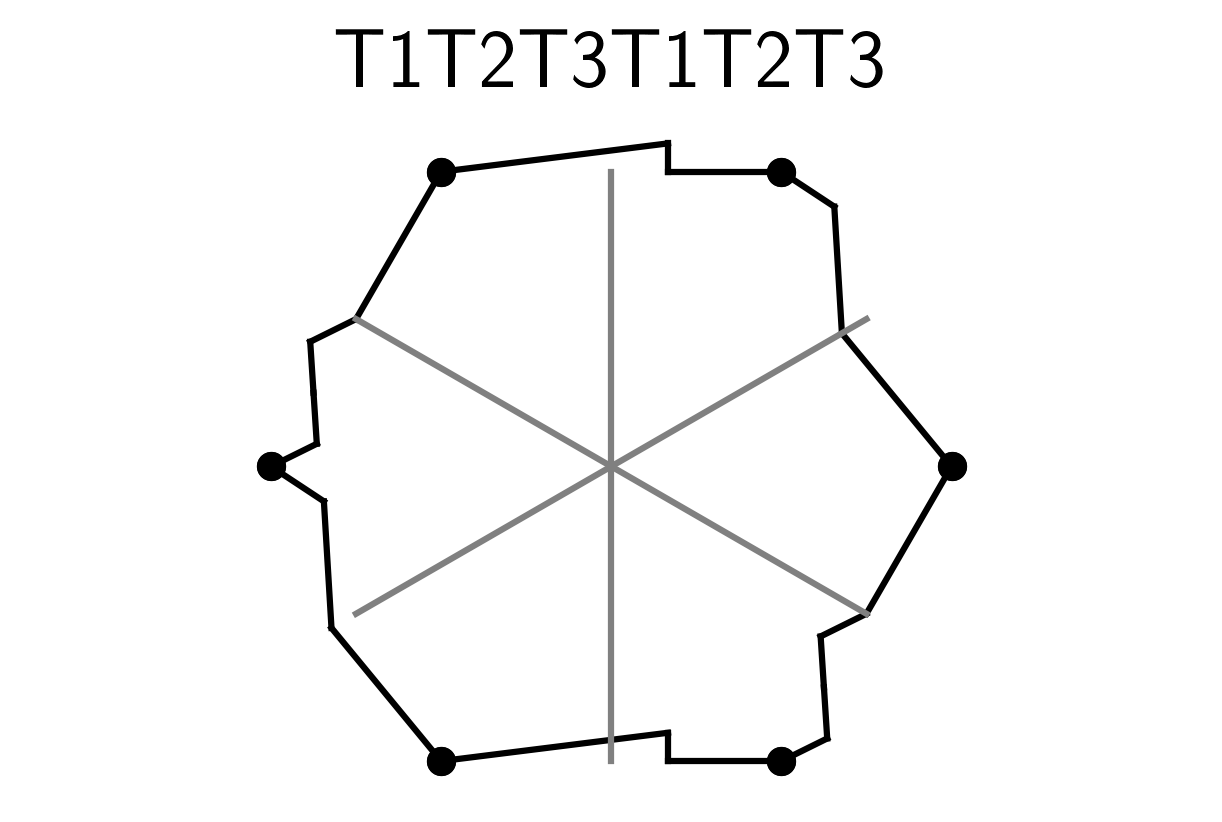

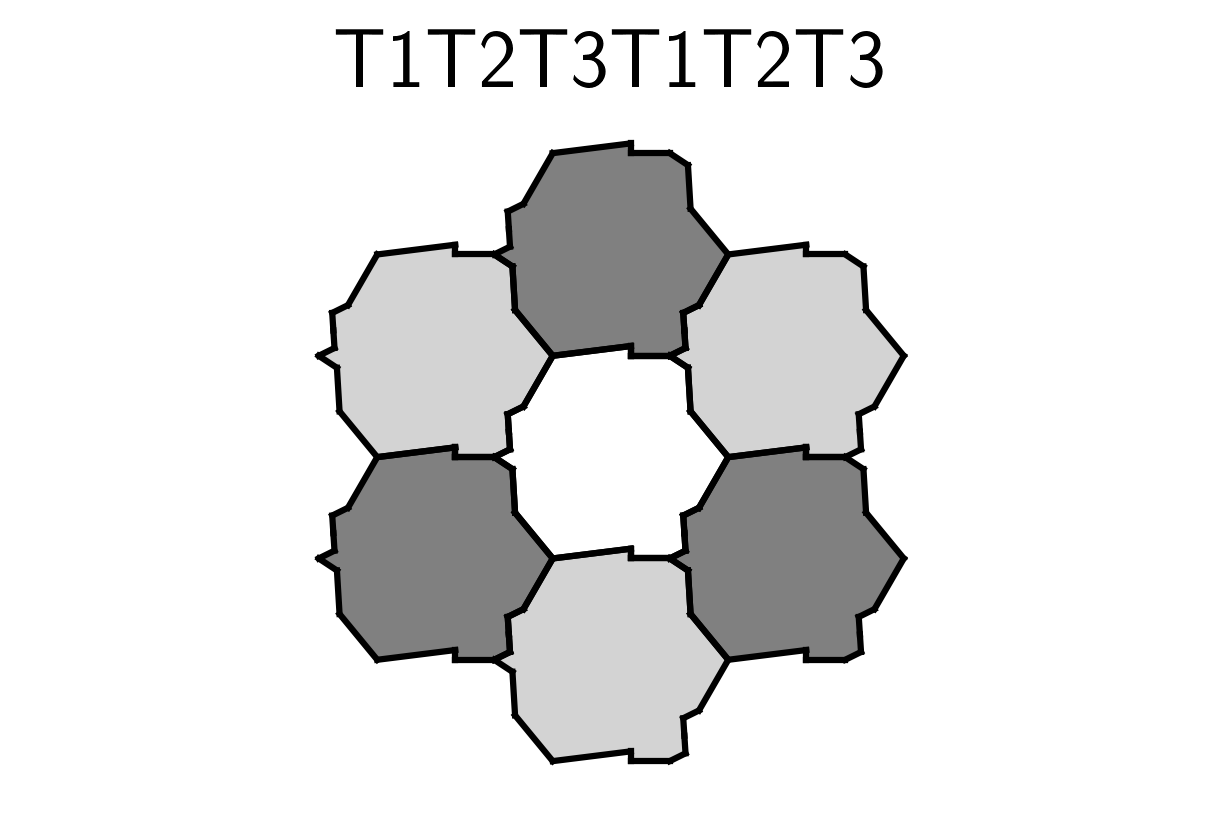

In [34]:
# test make tile
heeschType = 'T1T2T3T1T2T3' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation directions
x = np.array([0.5,0.5])
y = np.array([0,2*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')

x = np.array([-0.5*cosd(60), 1+0.5*cosd(60)])
y = np.array([0.5*sind(60), 1.5*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')

x = np.array([-0.5*cosd(60), 1+0.5*cosd(60)])
y = np.array([1.5*sind(60), 0.5*sind(60)])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# translate tile 0 vertically downward
shift = np.array([0, -2*sind(60)])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# translate tile 0 vertically upward
shift = np.array([0, 2*sind(60)])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'grey')

# translate tile 0 from bottom-left to upper-right
shift = np.array([1+cosd(60), sind(60)])
P3 = translate(P0, shift)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# translate tile 0 from upper-right to bottom-left
shift = np.array([-(1+cosd(60)), -sind(60)])
P4 = translate(P0, shift)
plotPoints(P4)
colorTile(P4, 'grey')

# translate tile 0 from upper-left to bottom-right
shift = np.array([1+sind(30), -cosd(30)])
P5 = translate(P0, shift)
plotPoints(P5)
colorTile(P5, 'grey')

# translate tile 0 from bottom-right to upper-left
shift = np.array([-(1+sind(30)), cosd(30)])
P6 = translate(P0, shift)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

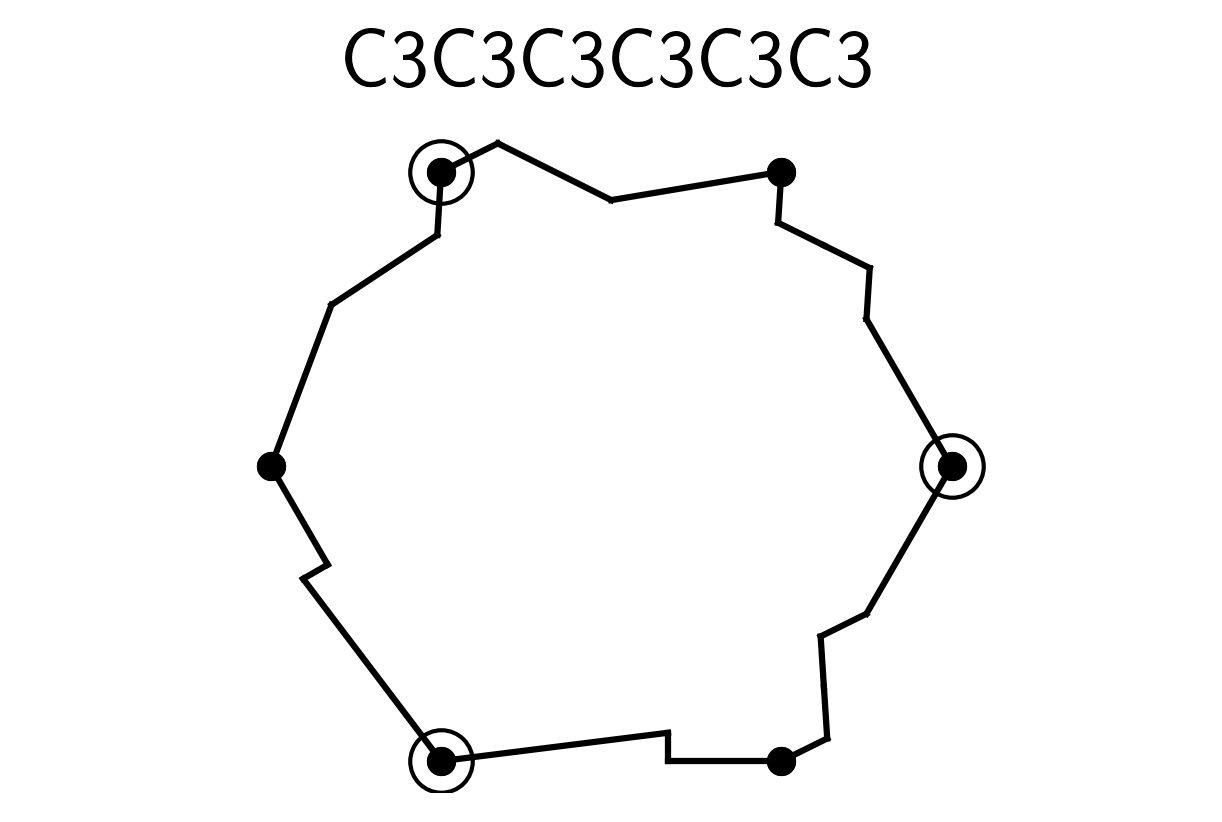

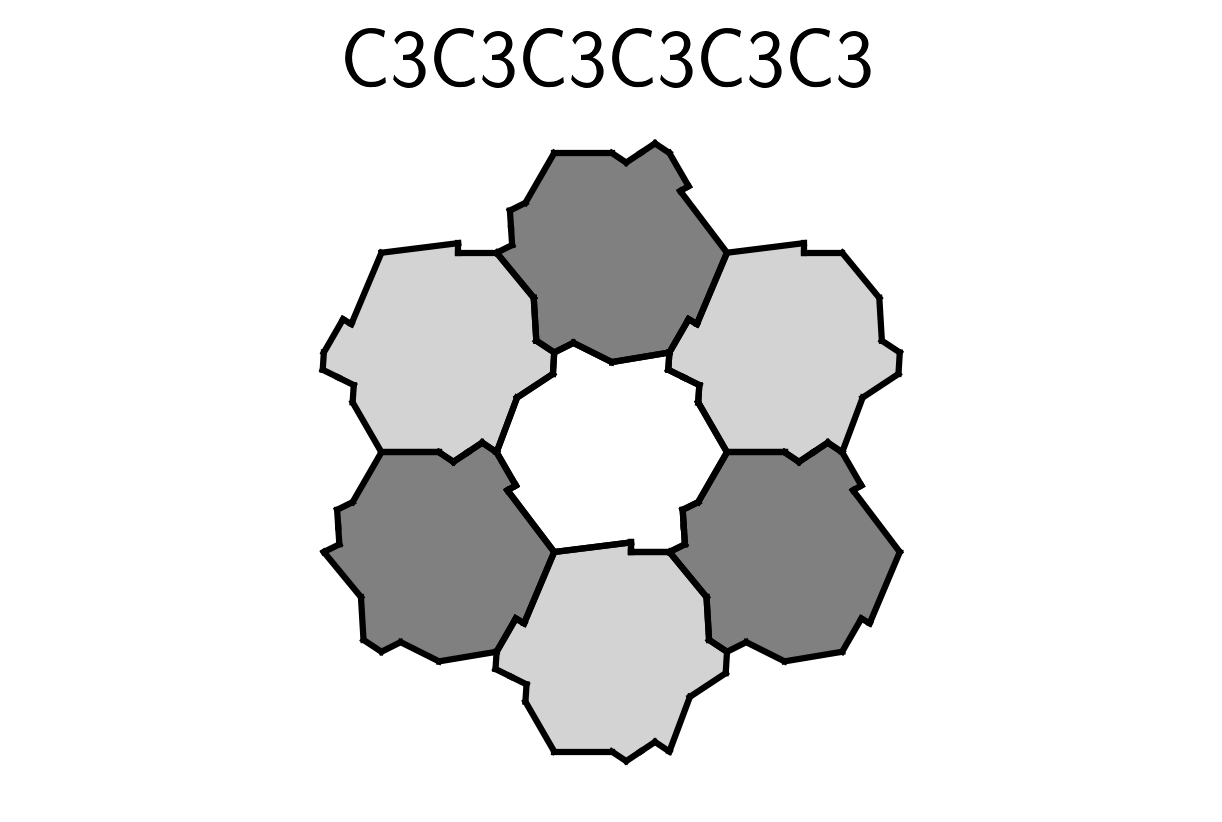

In [35]:
# test make tile
heeschType = 'C3C3C3C3C3C3' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about bottom-left vertex by 120
A = np.array([0,0])
angle = 120
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'grey')

# rotate tile 0 about bottom-left vertex by -120
A = np.array([0,0])
angle = -120
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about top-left vertex by 120
A = np.array([0,2*sind(60)])
angle = 120
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'grey')

# rotate tile 0 about top-left vertex by -120
A = np.array([0,2*sind(60)])
angle = -120
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')

# rotate tile 0 about mid-right vertex by 120
A = np.array([1+cosd(60), sind(60)])
angle = 120
P5 = rotate(P0, A, angle)
plotPoints(P5)
colorTile(P5, 'grey')

# rotate tile 0 about mid-right vertex by -120
A = np.array([1+cosd(60), sind(60)])
angle = -120
P6 = rotate(P0, A, angle)
plotPoints(P6)
colorTile(P6, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

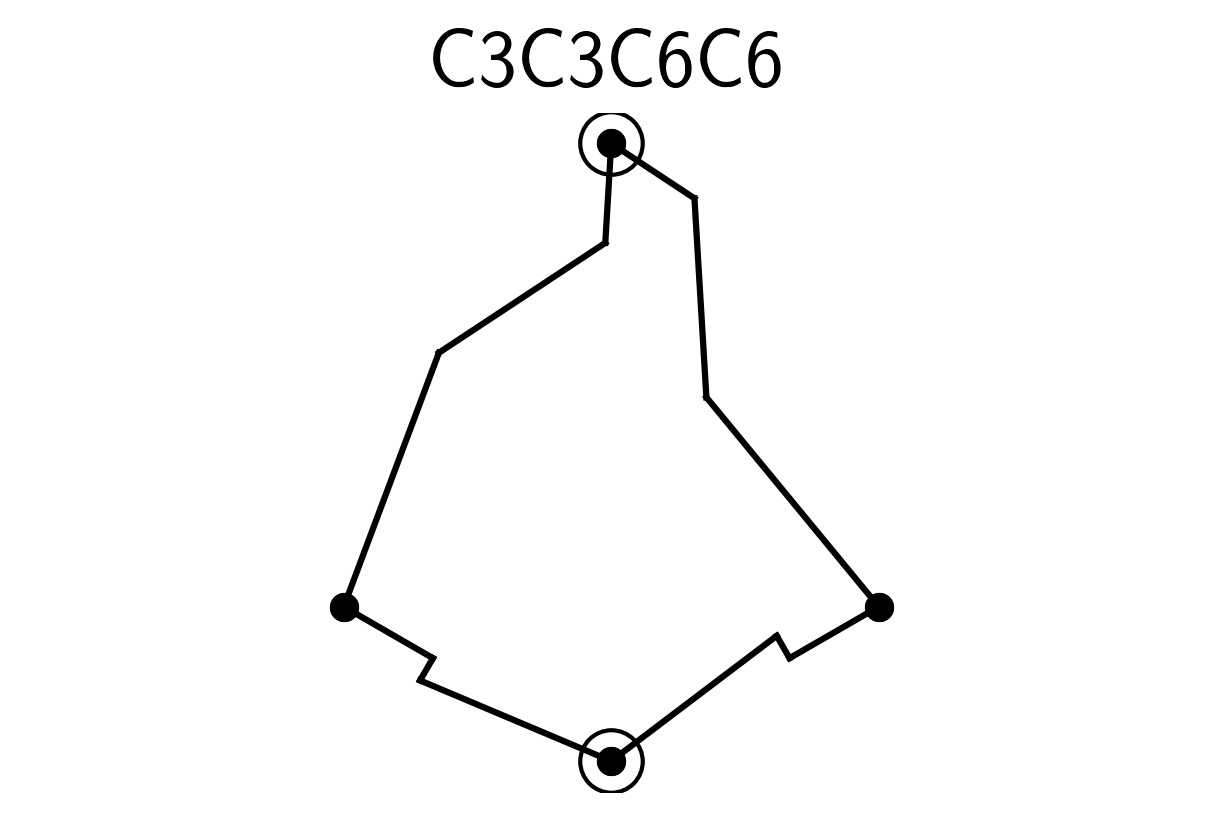

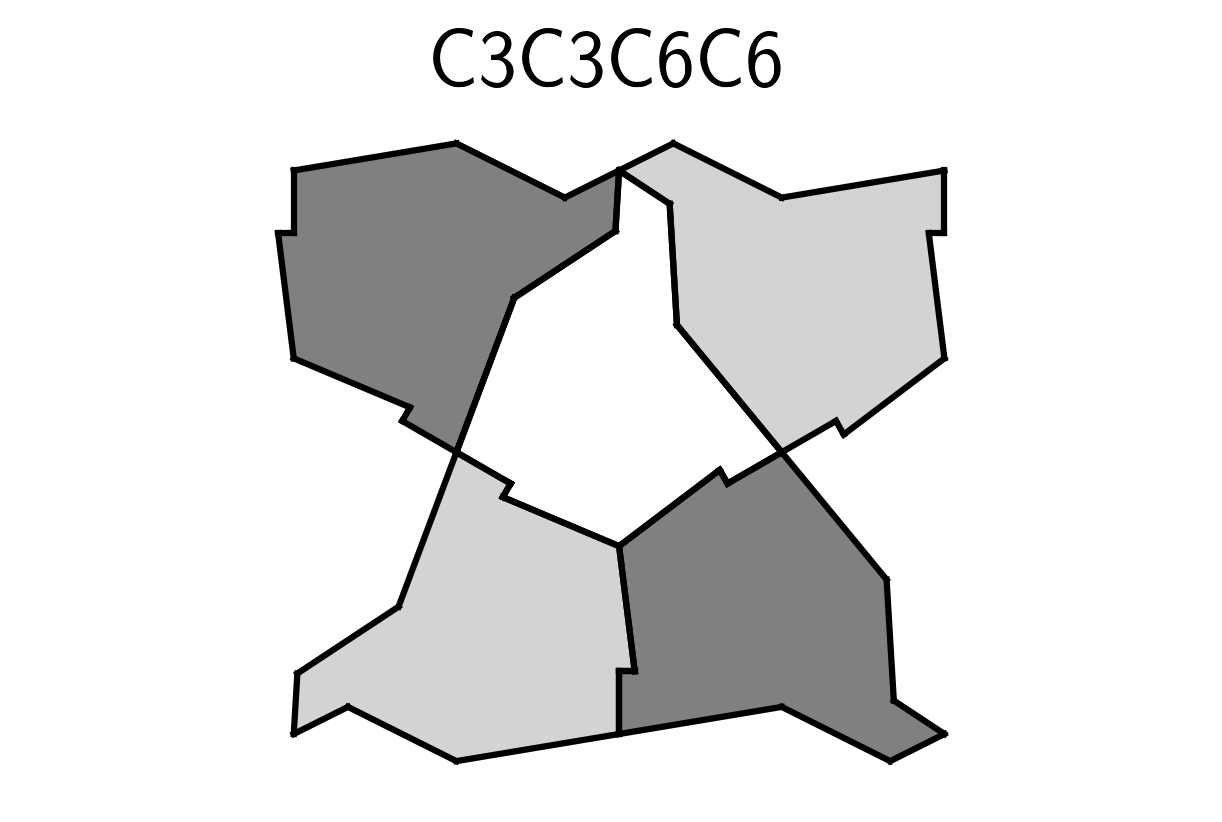

In [36]:
# test make tile
heeschType = 'C3C3C6C6' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about bottom vertex by 120
A = np.array([0,0])
angle = 120
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about bottom vertex by -120
A = np.array([0,0])
angle = -120
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 about top vertex by 60
A = np.array([0,2])
angle = 60
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about top vertex by -60
A = np.array([0,2])
angle = -60
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

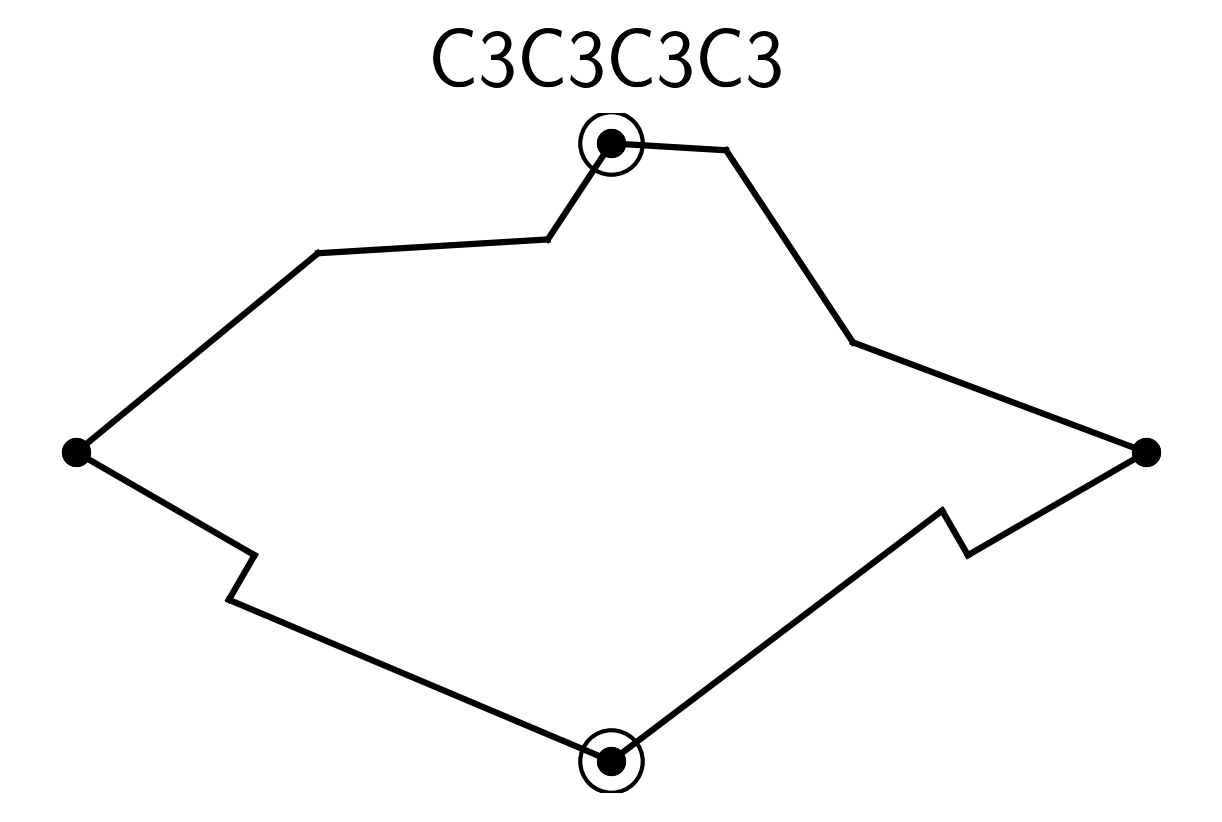

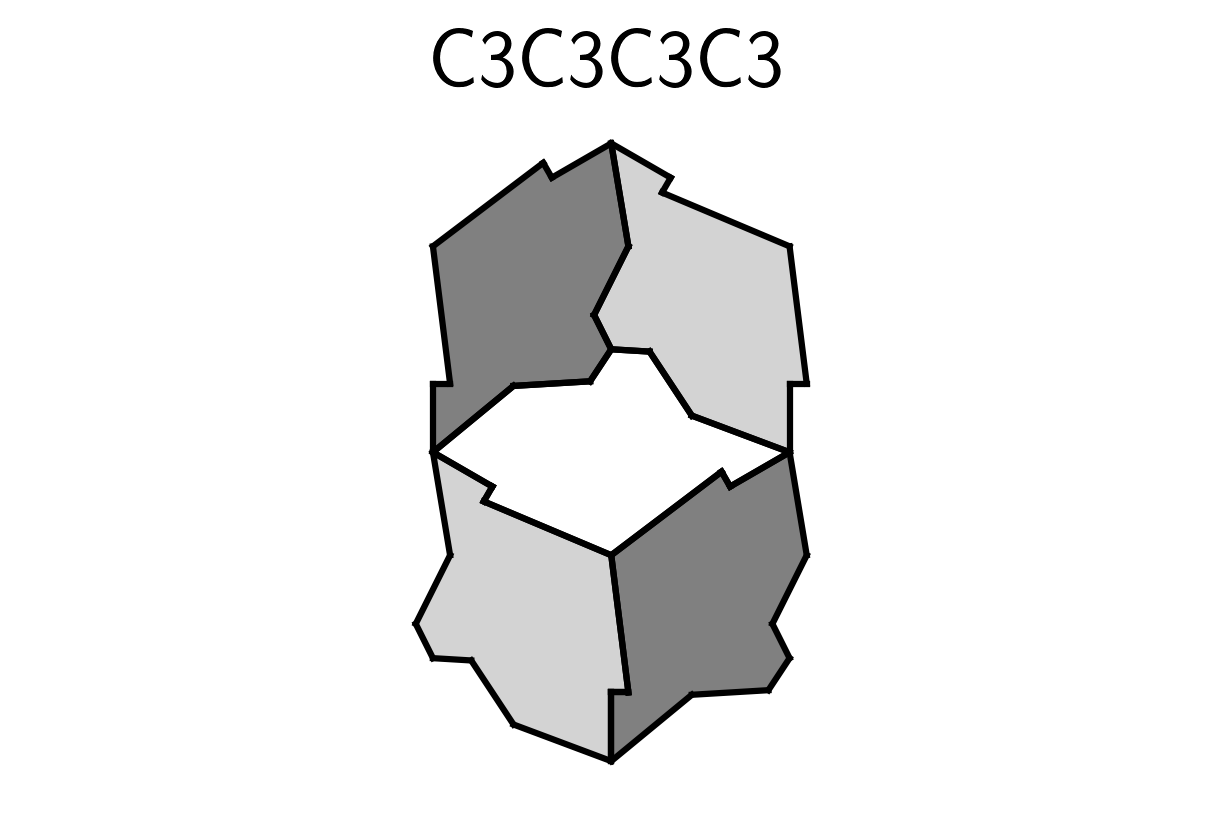

In [37]:
# test make tile
heeschType = 'C3C3C3C3' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about bottom vertex by 120
A = np.array([0,0])
angle = 120
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about bottom vertex by -120
A = np.array([0,0])
angle = -120
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 about top vertex by 120
A = np.array([0,2*sind(30)])
angle = 120
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about top vertex by -120
A = np.array([0,2*sind(30)])
angle = -120
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'grey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

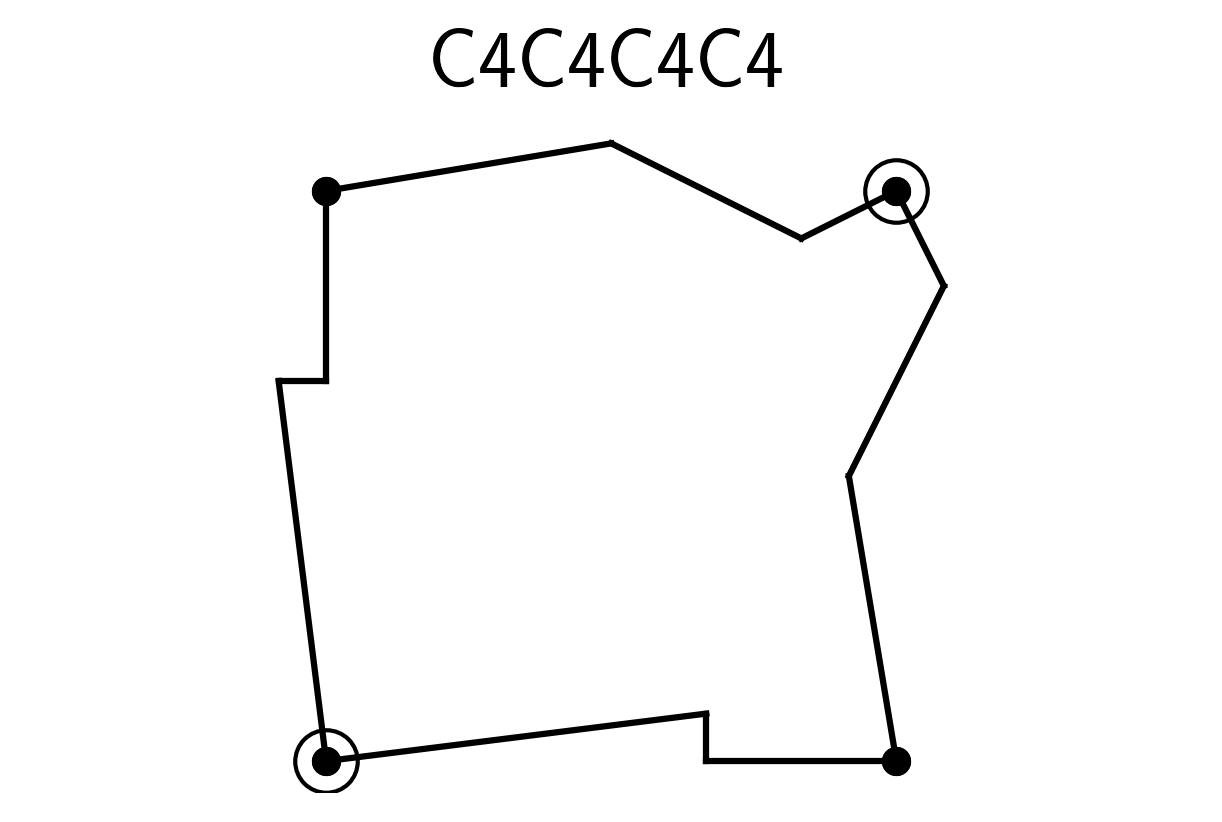

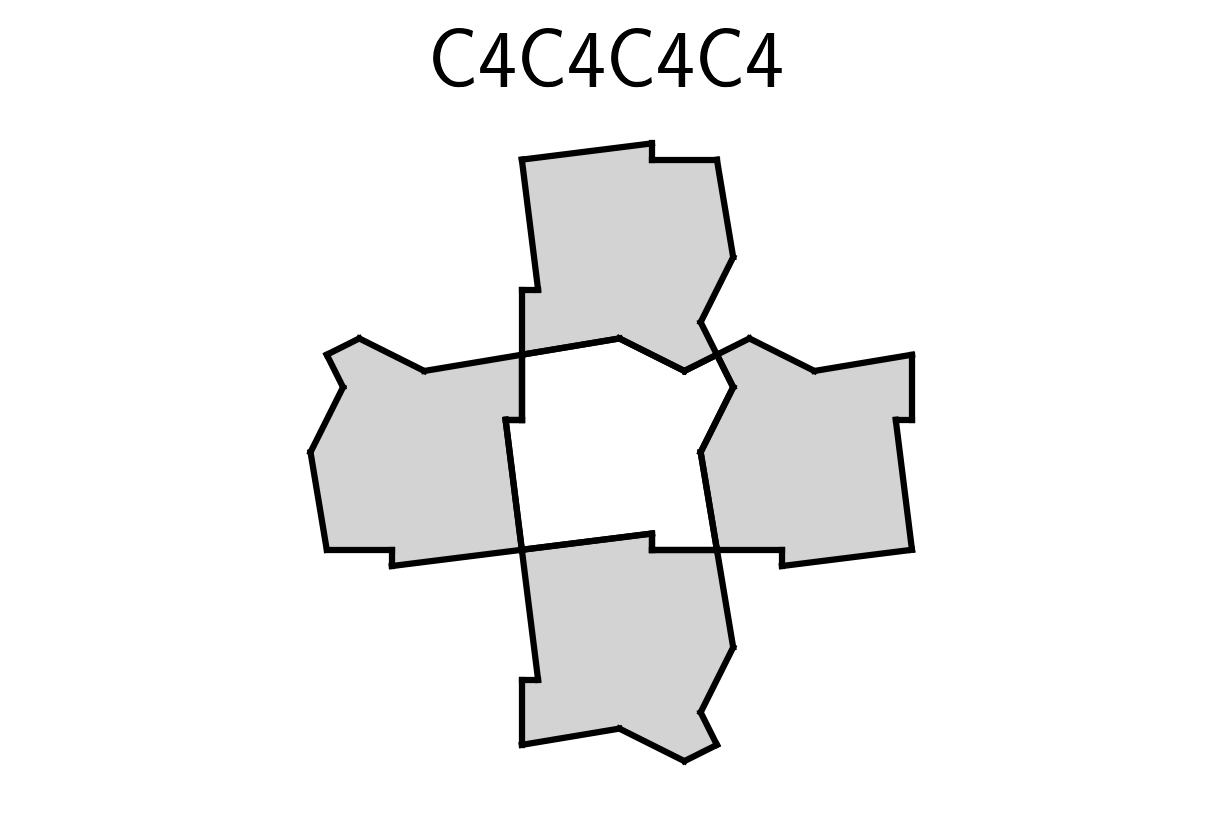

In [38]:
# test make tile
heeschType = 'C4C4C4C4' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about bottom-left vertex by 90
A = np.array([0,0])
angle = 90
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about bottom-left vertex by -90
A = np.array([0,0])
angle = -90
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about top-right vertex by 90
A = np.array([1,1])
angle = 90
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about bottom-left vertex by -90
A = np.array([1,1])
angle = -90
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

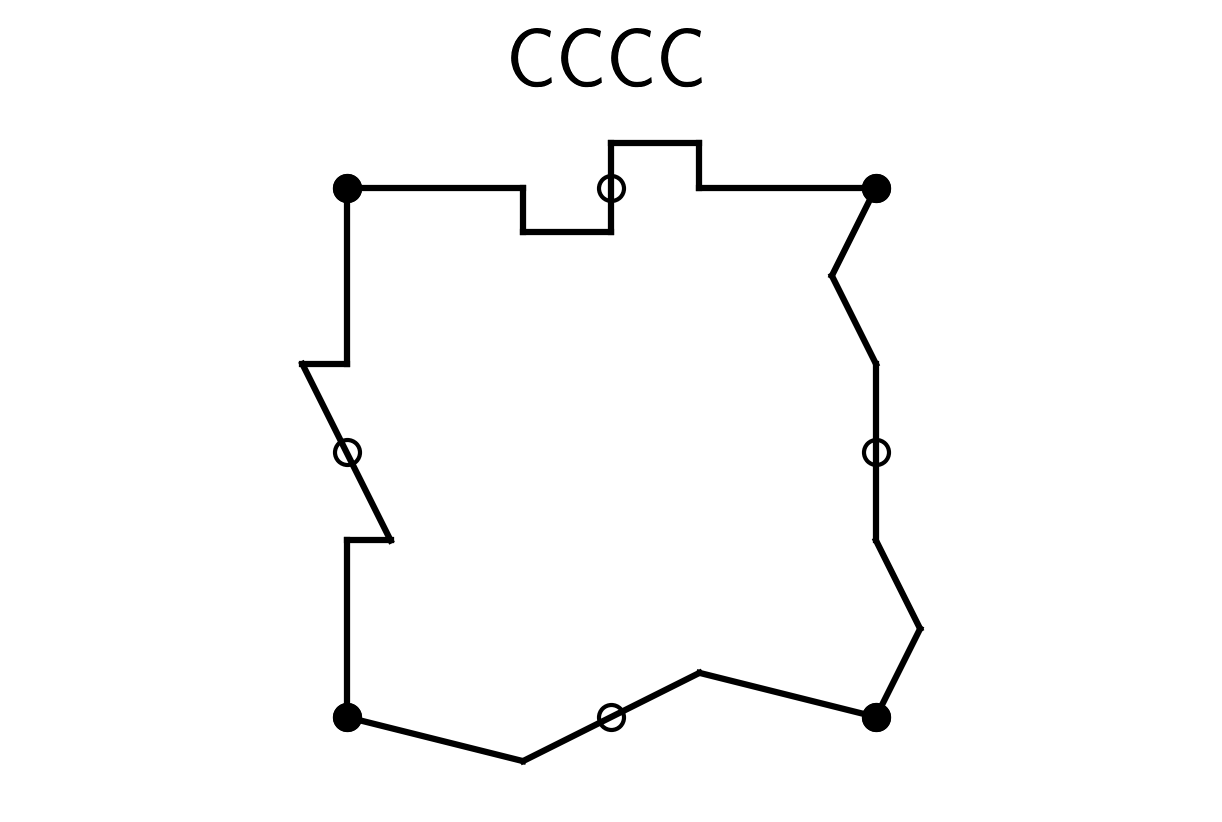

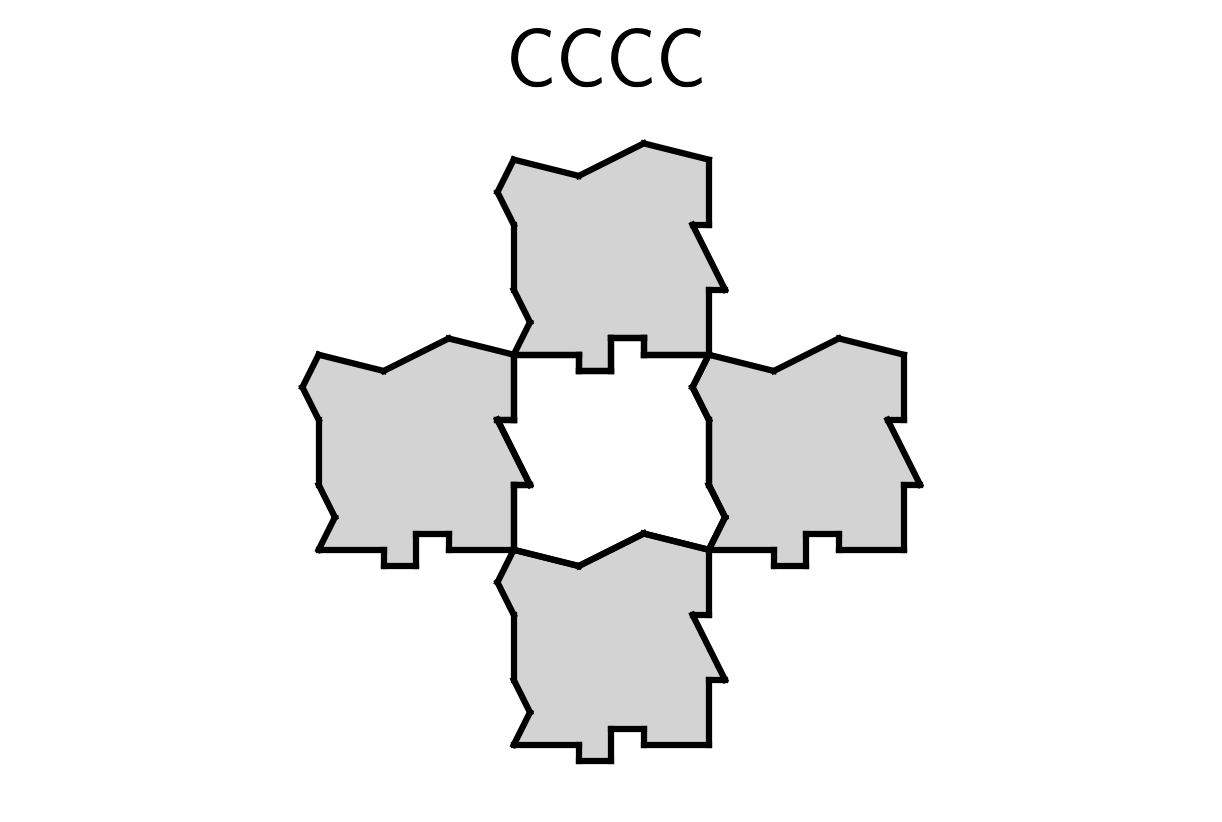

In [39]:
# test make tile
heeschType = 'CCCC' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = np.array([0.5,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about center of top edge
A = np.array([0.5,1])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about center of left edge
A = np.array([0,0.5])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about center of right edge
A = np.array([1,0.5])
angle = 180
P4 = rotate(P0, A, angle)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

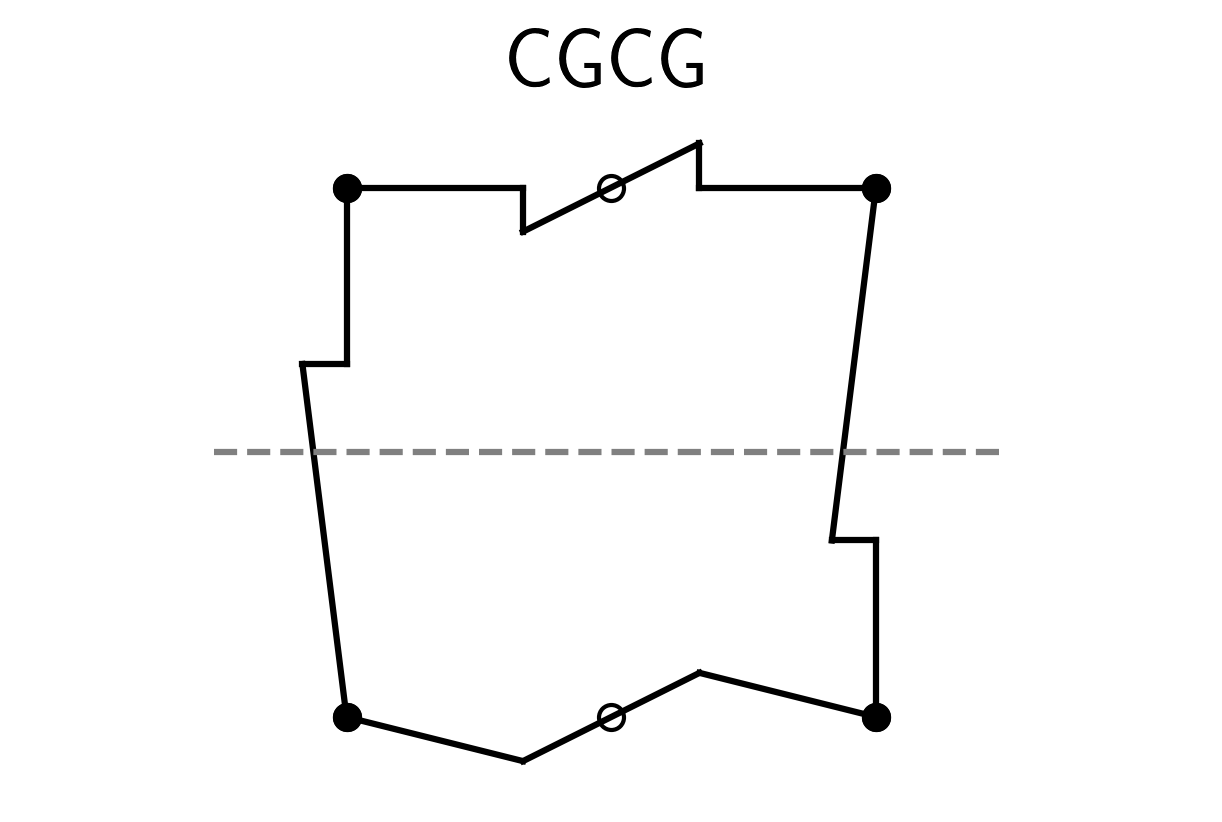

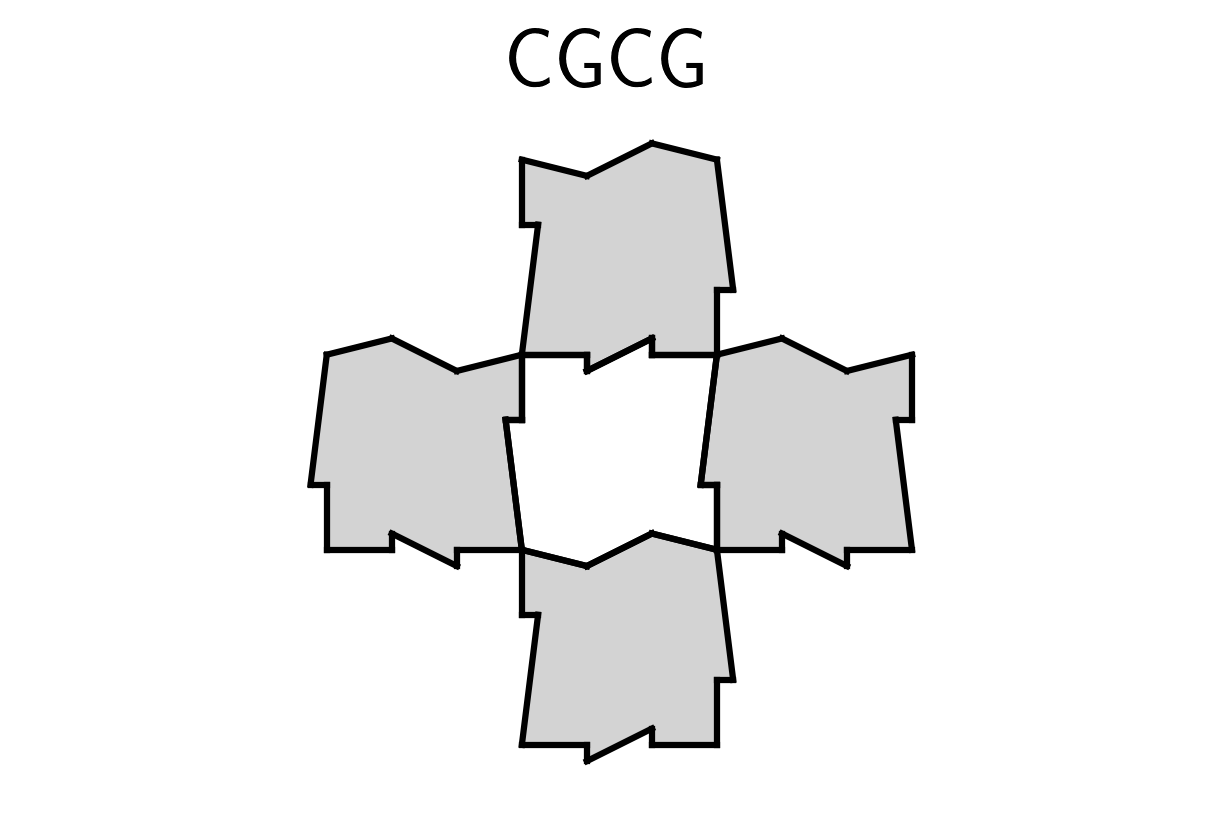

In [40]:
# test make tile
heeschType = 'CGCG' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axis
x = np.array([-0.25,1.25])
y = np.array([0.5,0.5])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = np.array([0.5,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about center of top edge
A = np.array([0.5,1])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 to the left about horizontal axis half-way up left edge
b = 0.5
axis = np.array([0, b])
scalefac = -1
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# glide reflect tile 0 to the right about horizontal axis half-way up left edge
b = 0.5
axis = np.array([0, b])
scalefac = 1
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

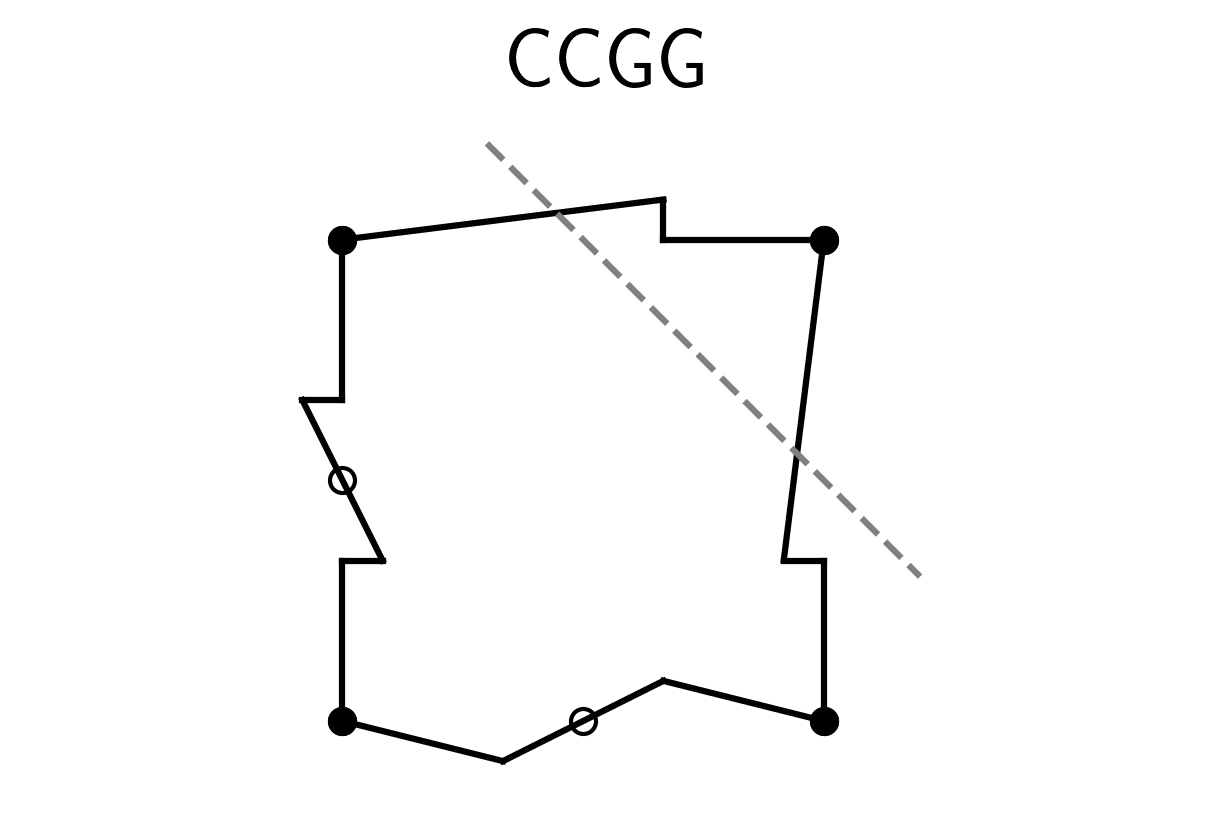

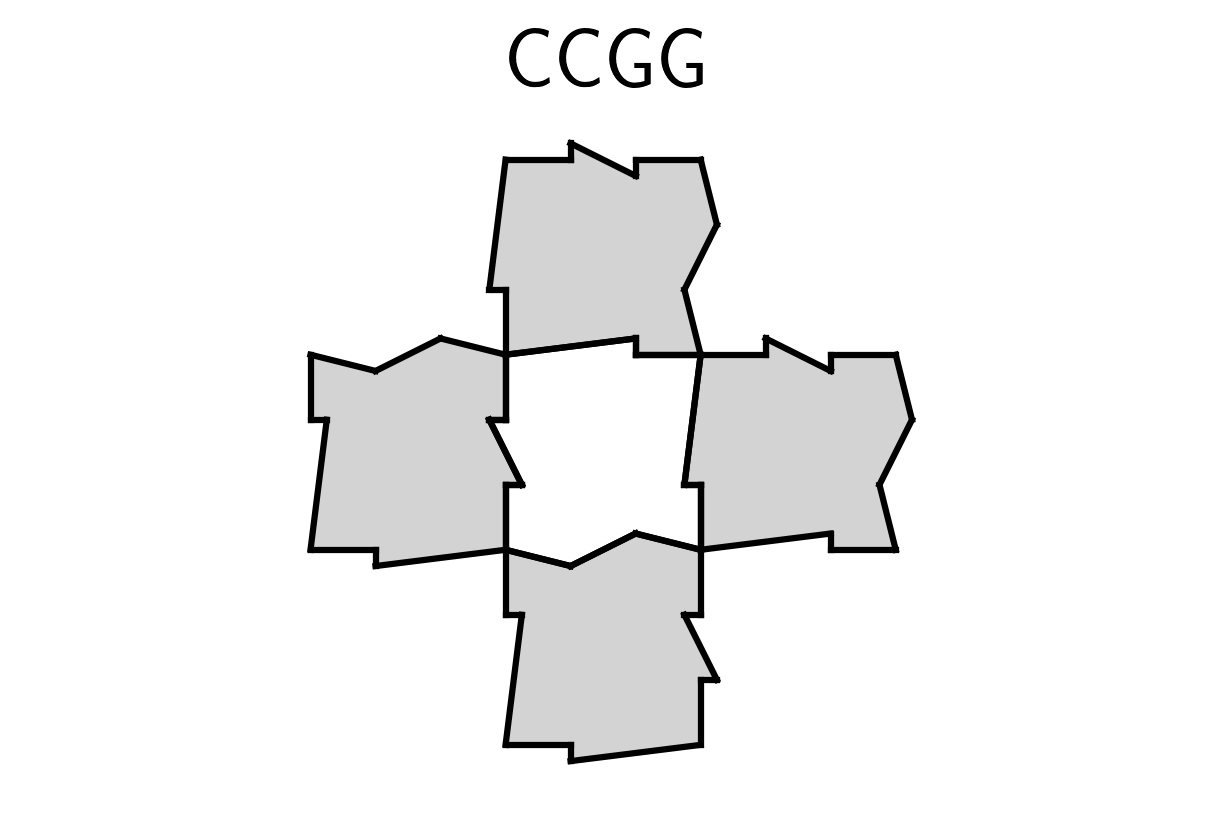

In [41]:
# test make tile
heeschType = 'CCGG' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axis
x = np.array([0.3,1.2])
y = np.array([1.2,0.3])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = np.array([0.5,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about center of left edge
A = np.array([0,0.5])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 to the left about -45 degree axis 1.5x up left edge
b = 1.5
axis = np.array([-45, b])
scalefac = -np.sqrt(2)/2.
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# glide reflect tile 0 to the right about -45 degree axis 1.5x up left edge
b = 1.5
axis = np.array([-45, b])
scalefac = np.sqrt(2)/2.
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

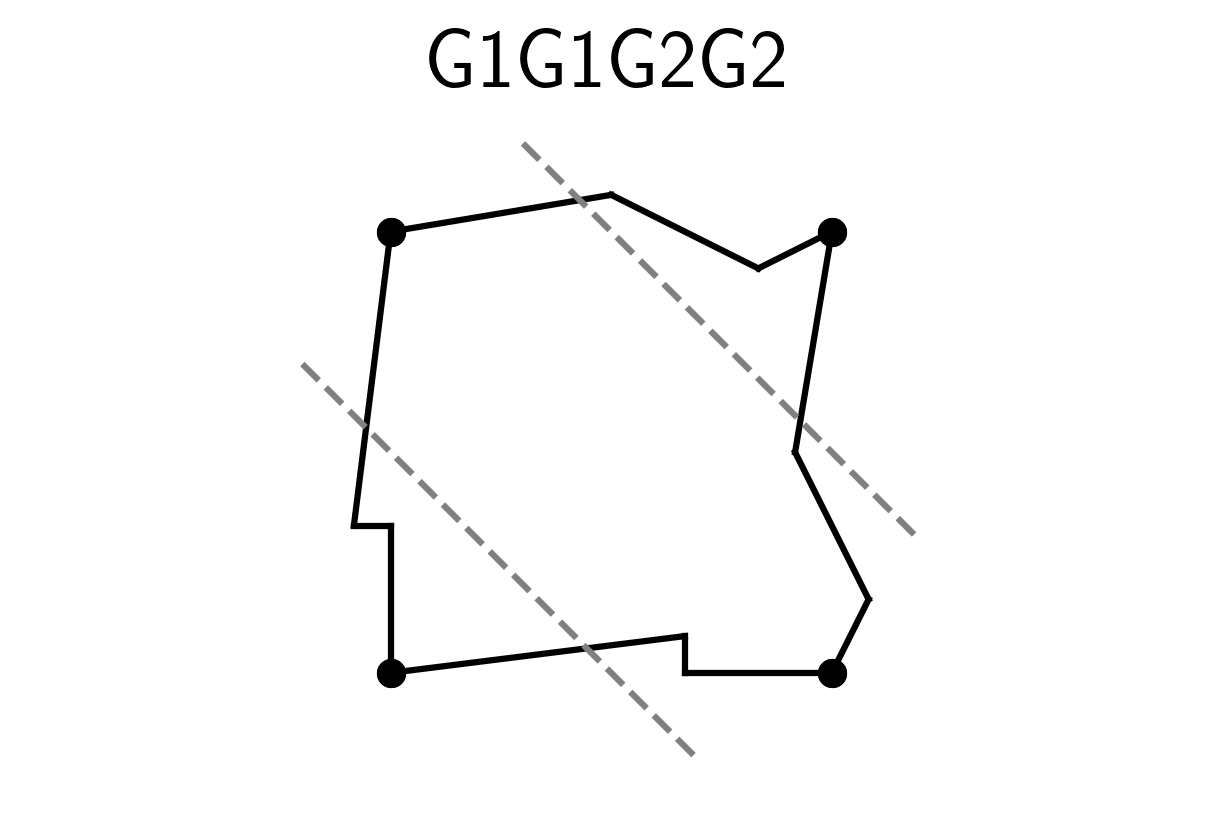

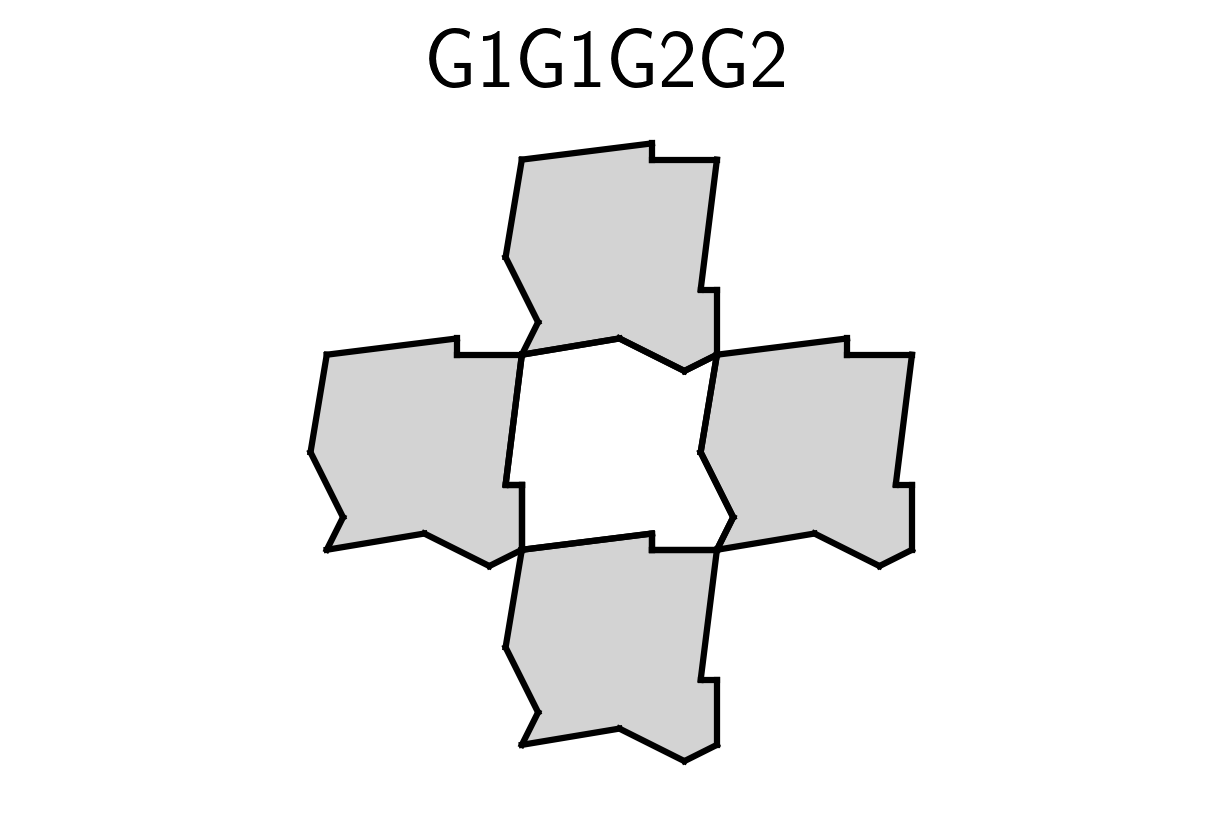

In [42]:
# test make tile
heeschType = 'G1G1G2G2' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
x = np.array([-0.2,0.7])
y = np.array([0.7,-0.2])
plt.plot(x, y, color='grey', linestyle='--')

x = np.array([0.3,1.2])
y = np.array([1.2,0.3])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# glide reflect tile 0 to the left about -45 degree axis half-way along left edge
b = 0.5
axis = np.array([-45, b])
scalefac = -np.sqrt(2)/2.
P1 = glideReflect(P0, axis, scalefac)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 to the right about -45 degree axis half-way along left edge
b = 0.5
axis = np.array([-45, b])
scalefac = np.sqrt(2)/2.
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 to the left about -45 degree axis 1.5x up left edge
b = 1.5
axis = np.array([-45, b])
scalefac = -np.sqrt(2)/2.
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# glide reflect tile 0 to the right about -45 degree axis 1.5x up left edge
b = 1.5
axis = np.array([-45, b])
scalefac = np.sqrt(2)/2.
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

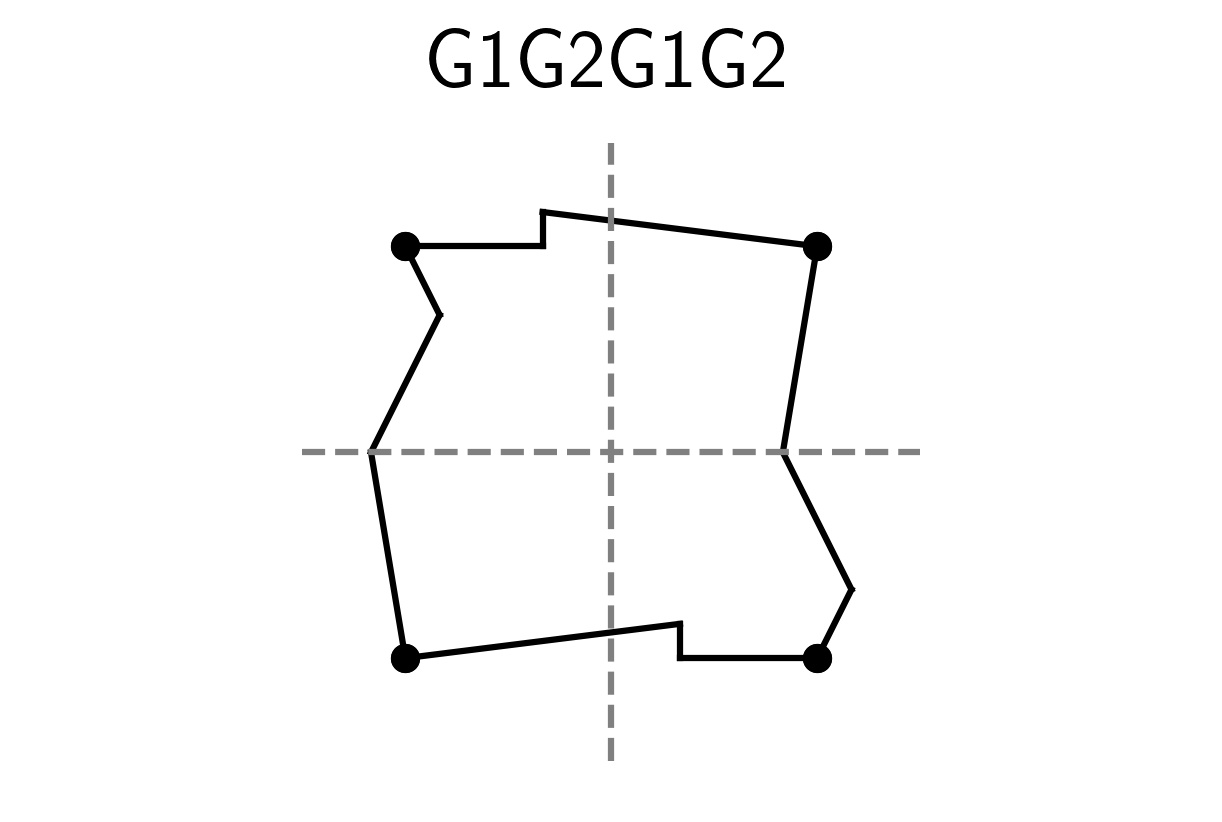

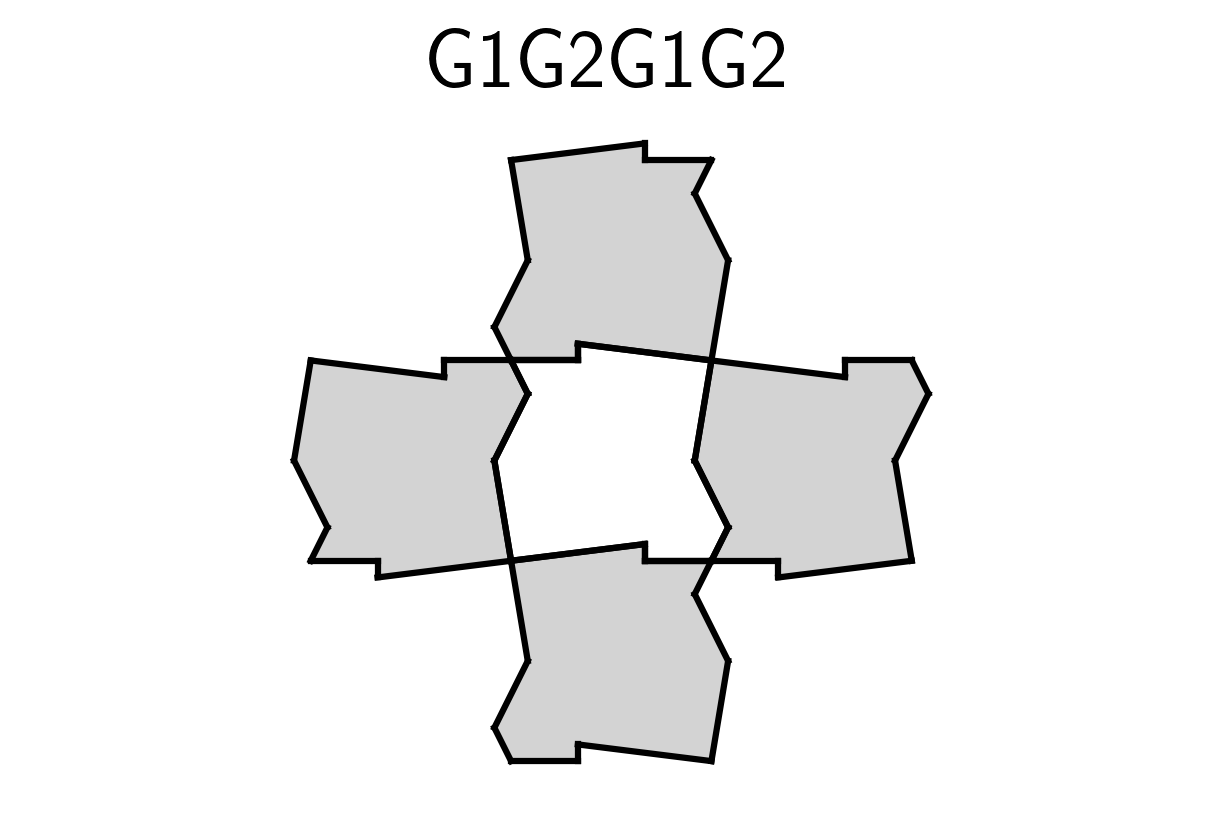

In [43]:
# test make tile
heeschType = 'G1G2G1G2' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axes
x = np.array([0.5,0.5])
y = np.array([-0.25,1.25])
plt.plot(x, y, color='grey', linestyle='--')

x = np.array([-0.25,1.25])
y = np.array([0.5,0.5])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# glide reflect tile 0 to the left about horizontal axis passing thru center of left edge
b = 0.5
axis = np.array([0, b])
scalefac = -1.
P1 = glideReflect(P0, axis, scalefac)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 to the right about horizontal axis passing thru center of left edge
b = 0.5
axis = np.array([0, b])
scalefac = 1.
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# glide reflect tile 0 upward about vertical axis passing thru center of bottom edge
b = 0.5
axis = np.array([90, b])
scalefac = 1.
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# glide reflect tile 0 downward about horizontal axis passing thru center of bottom edge
b = 0.5
axis = np.array([90, b])
scalefac = -1.
P4 = glideReflect(P0, axis, scalefac)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

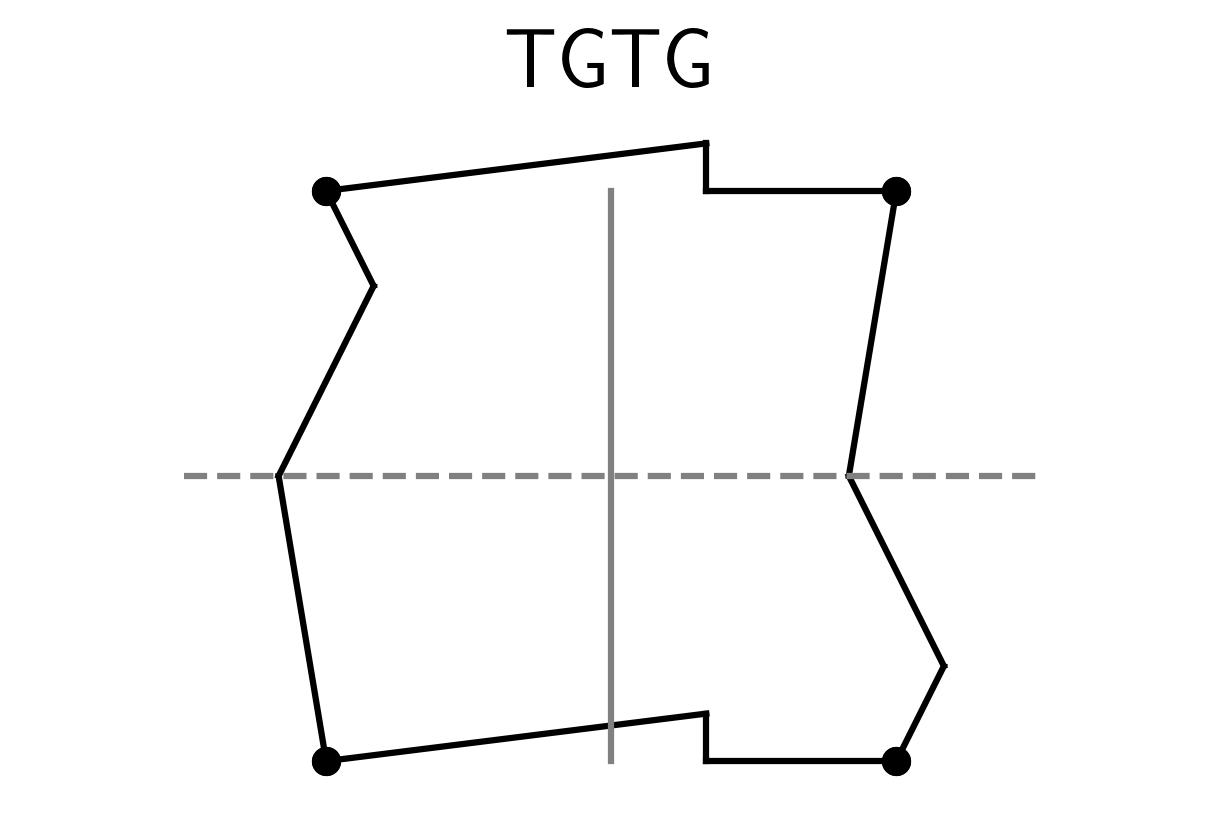

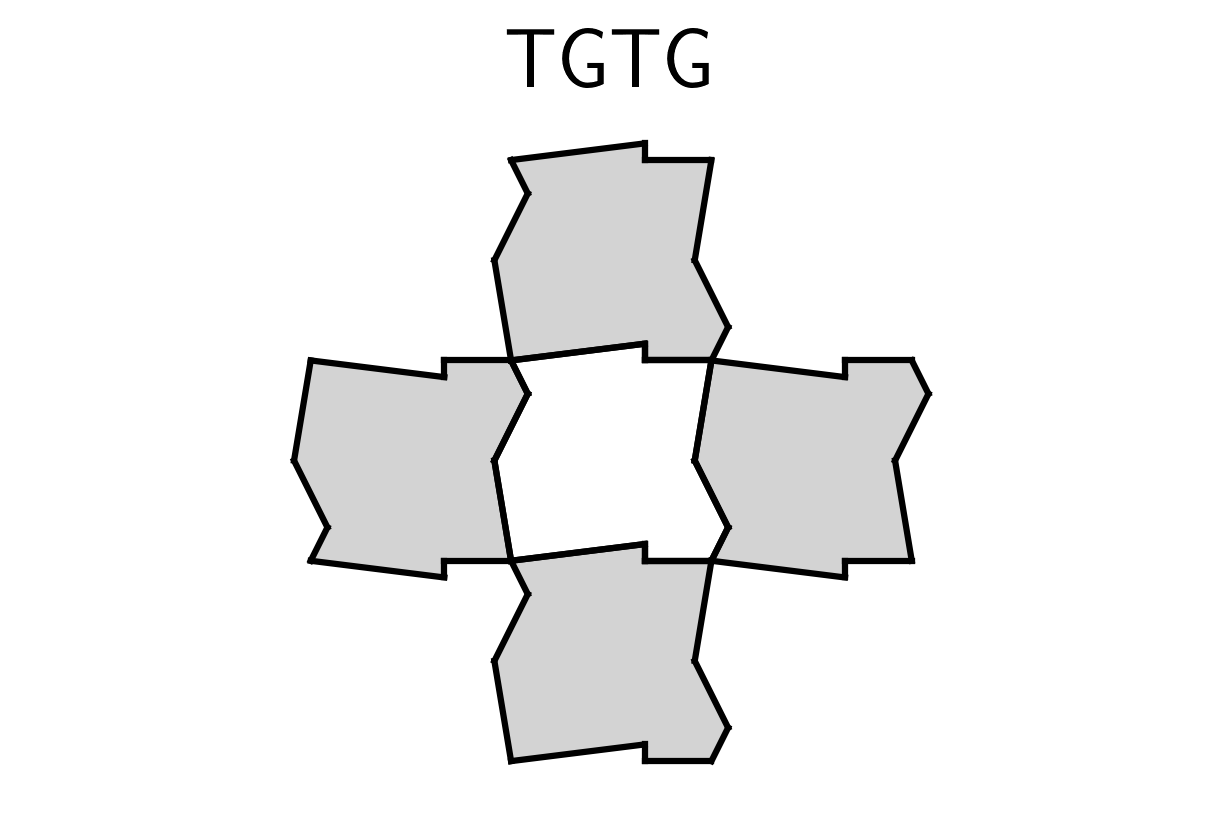

In [44]:
# test make tile
heeschType = 'TGTG' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation direction and glide reflection axis
x = np.array([0.5,0.5])
y = np.array([0,1])
plt.plot(x, y, color='grey', linestyle='-')

x = np.array([-0.25,1.25])
y = np.array([0.5,0.5])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# glide reflect tile 0 to the left about horizontal axis passing thru center of left edge
b = 0.5
axis = np.array([0, b])
scalefac = -1.
P1 = glideReflect(P0, axis, scalefac)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 to the right about horizontal axis passing thru center of left edge
b = 0.5
axis = np.array([0, b])
scalefac = 1.
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# tranlate tile 0 up
shift = np.array([0,1])
P3 = translate(P0, shift)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# tranlate tile 0 down
shift = np.array([0,-1])
P4 = translate(P0, shift)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

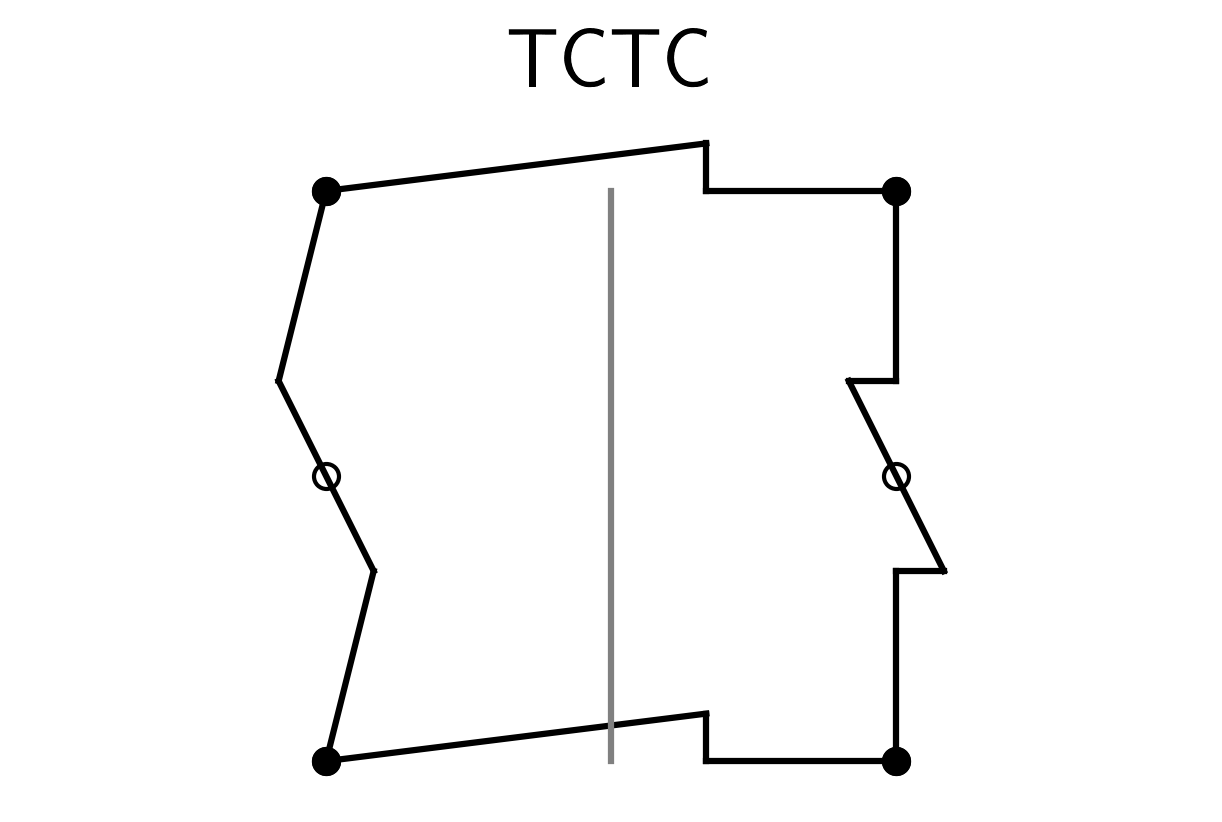

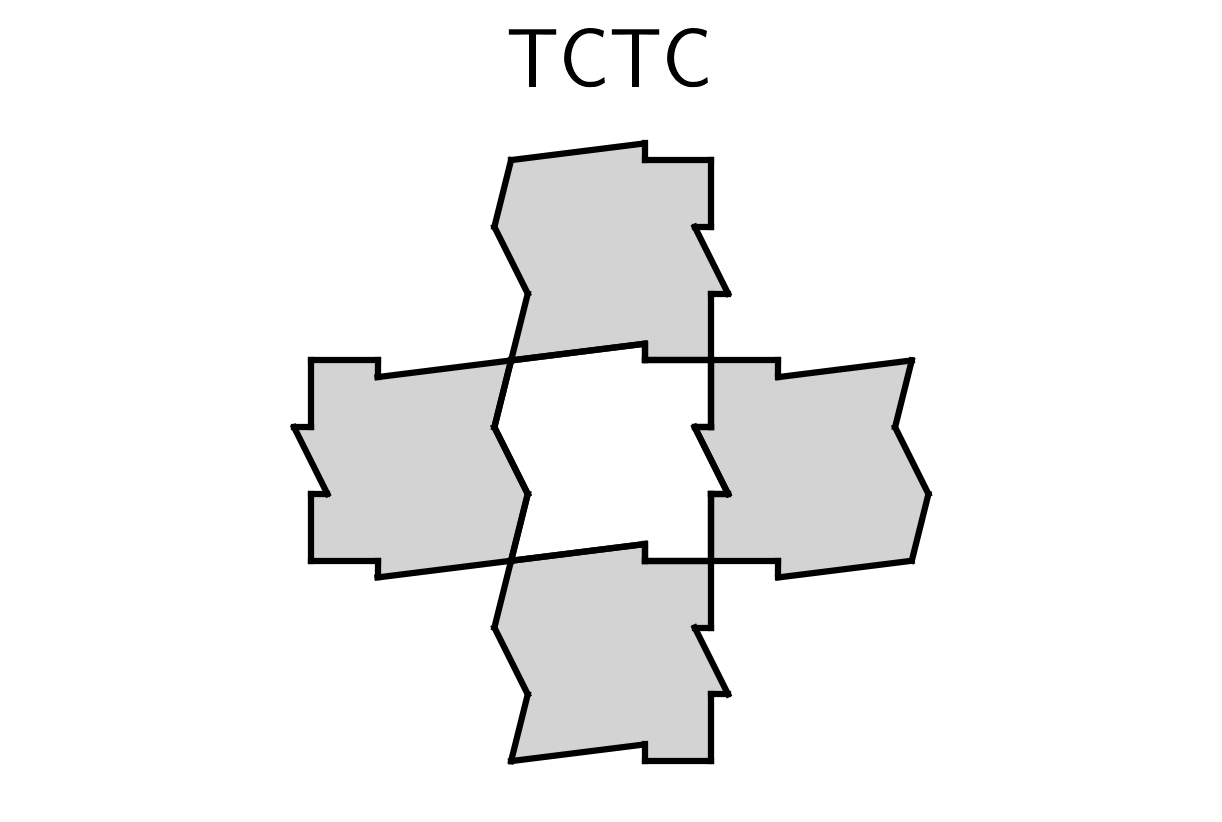

In [45]:
# test make tile
heeschType = 'TCTC' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation direction
x = np.array([0.5,0.5])
y = np.array([0,1])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of left edge
A = np.array([0,0.5])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about center of right edge
A = np.array([1,0.5])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# tranlate tile 0 up
shift = np.array([0,1])
P3 = translate(P0, shift)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# tranlate tile 0 down
shift = np.array([0,-1])
P4 = translate(P0, shift)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

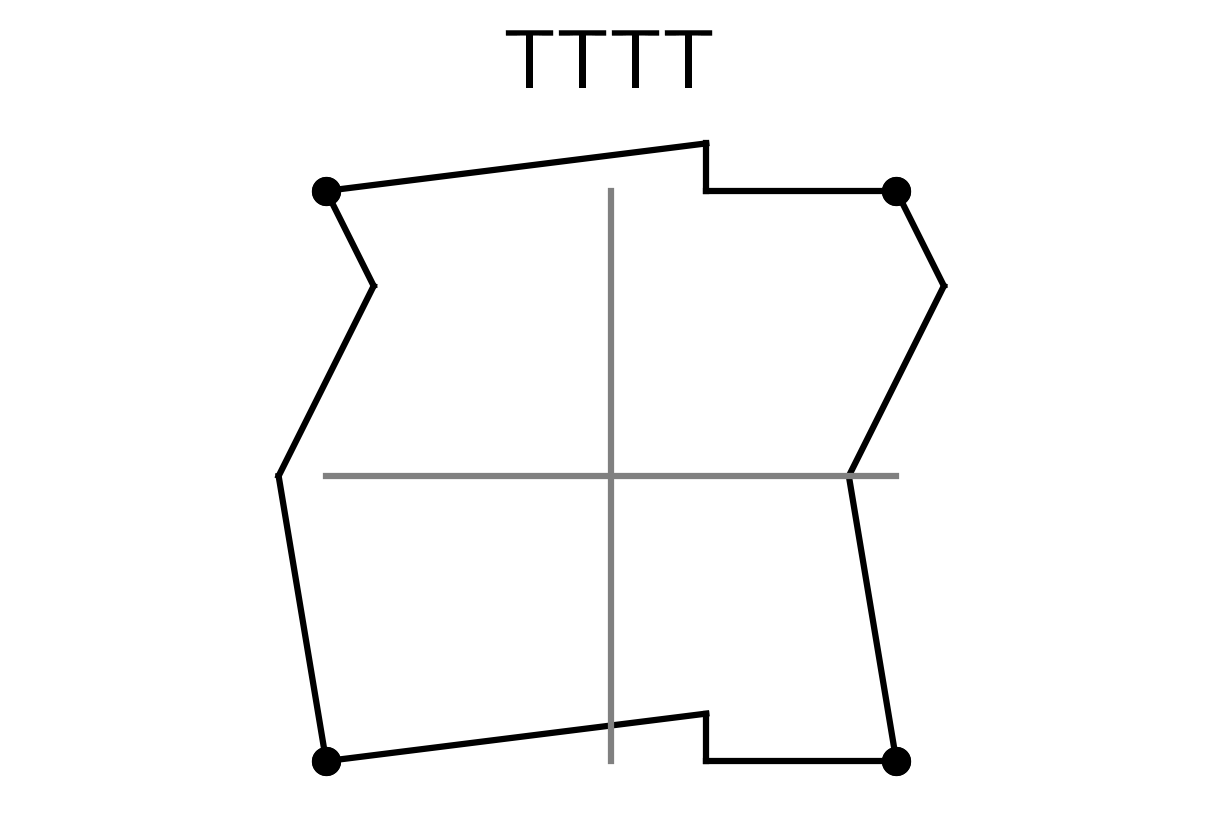

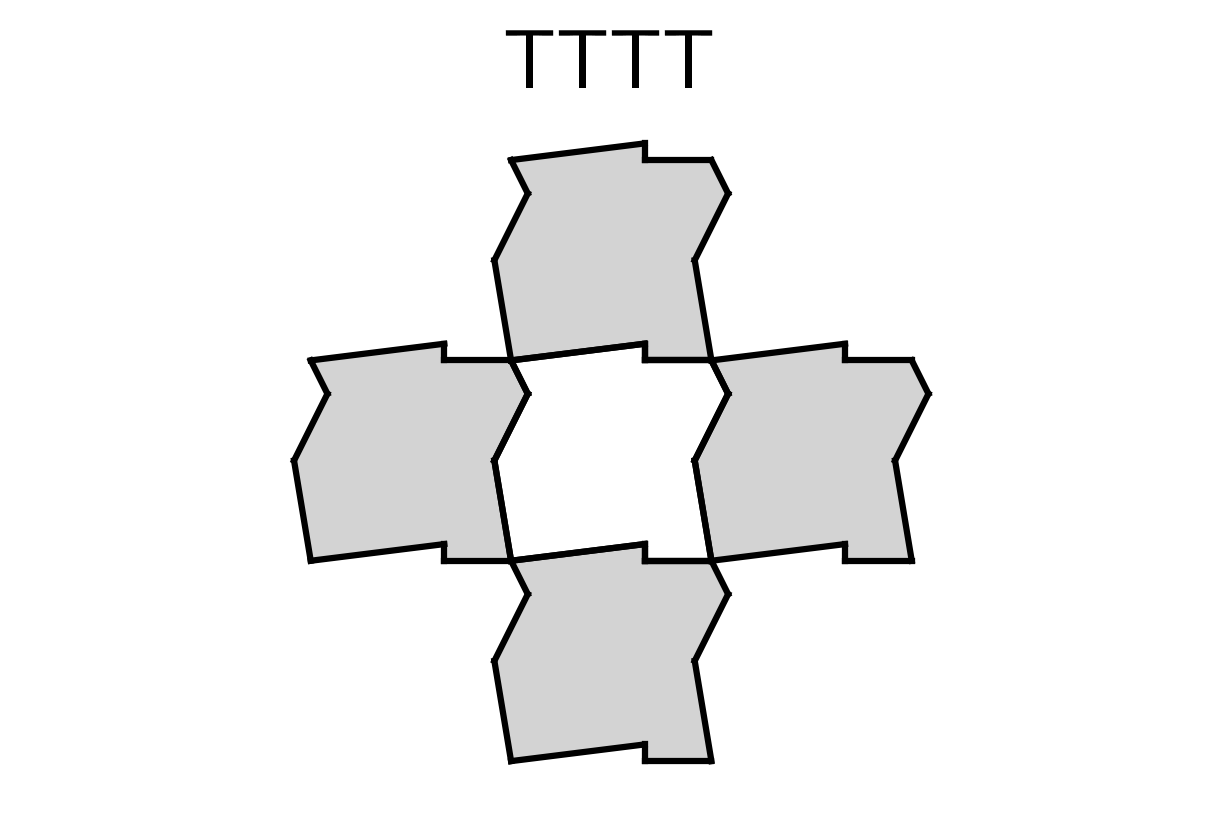

In [46]:
# test make tile
heeschType = 'TTTT' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot translation directions
x = np.array([0.5,0.5])
y = np.array([0,1])
plt.plot(x, y, color='grey', linestyle='-')

x = np.array([0,1])
y = np.array([0.5,0.5])
plt.plot(x, y, color='grey', linestyle='-')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# tranlate tile 0 to right
shift = np.array([1,0])
P1 = translate(P0, shift)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# tranlate tile 0 to left
shift = np.array([-1,0])
P2 = translate(P0, shift)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# tranlate tile 0 up
shift = np.array([0,1])
P3 = translate(P0, shift)
plotPoints(P3)
colorTile(P3, 'lightgrey')

# tranlate tile 0 down
shift = np.array([0,-1])
P4 = translate(P0, shift)
plotPoints(P4)
colorTile(P4, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

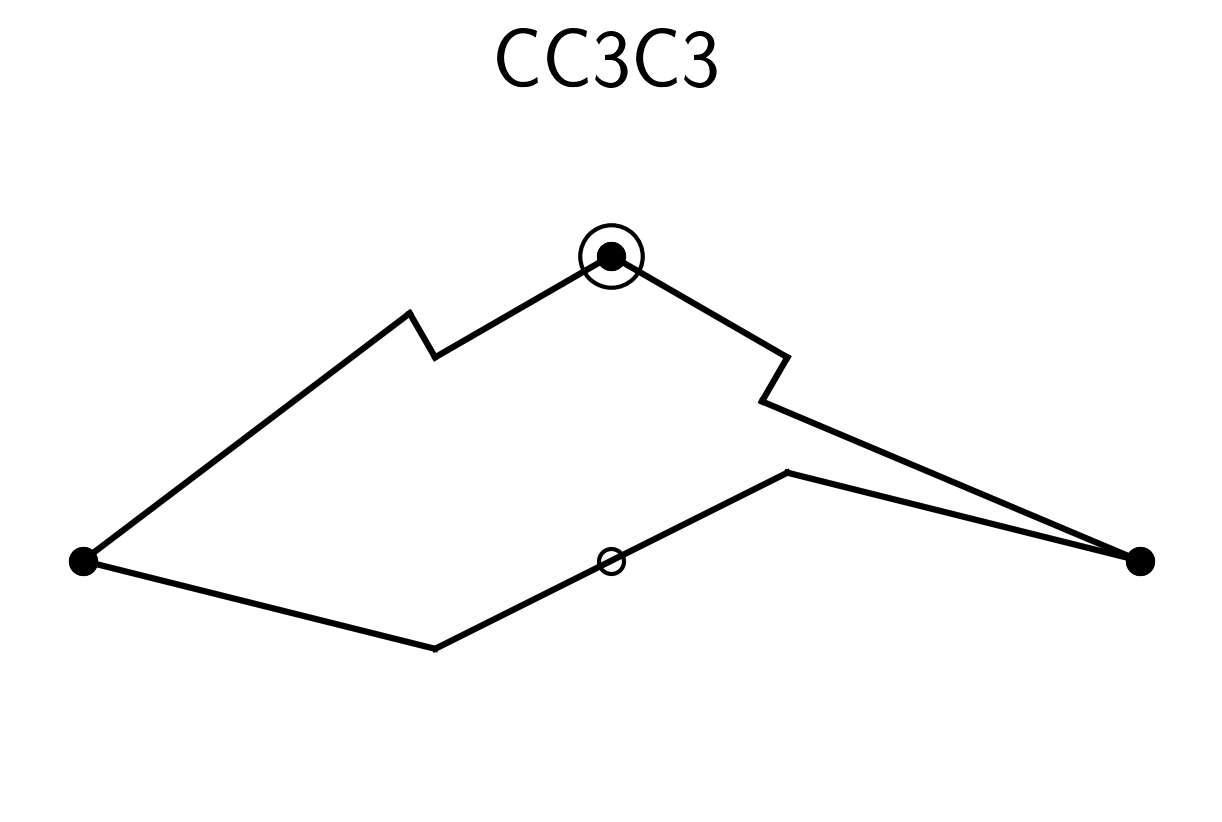

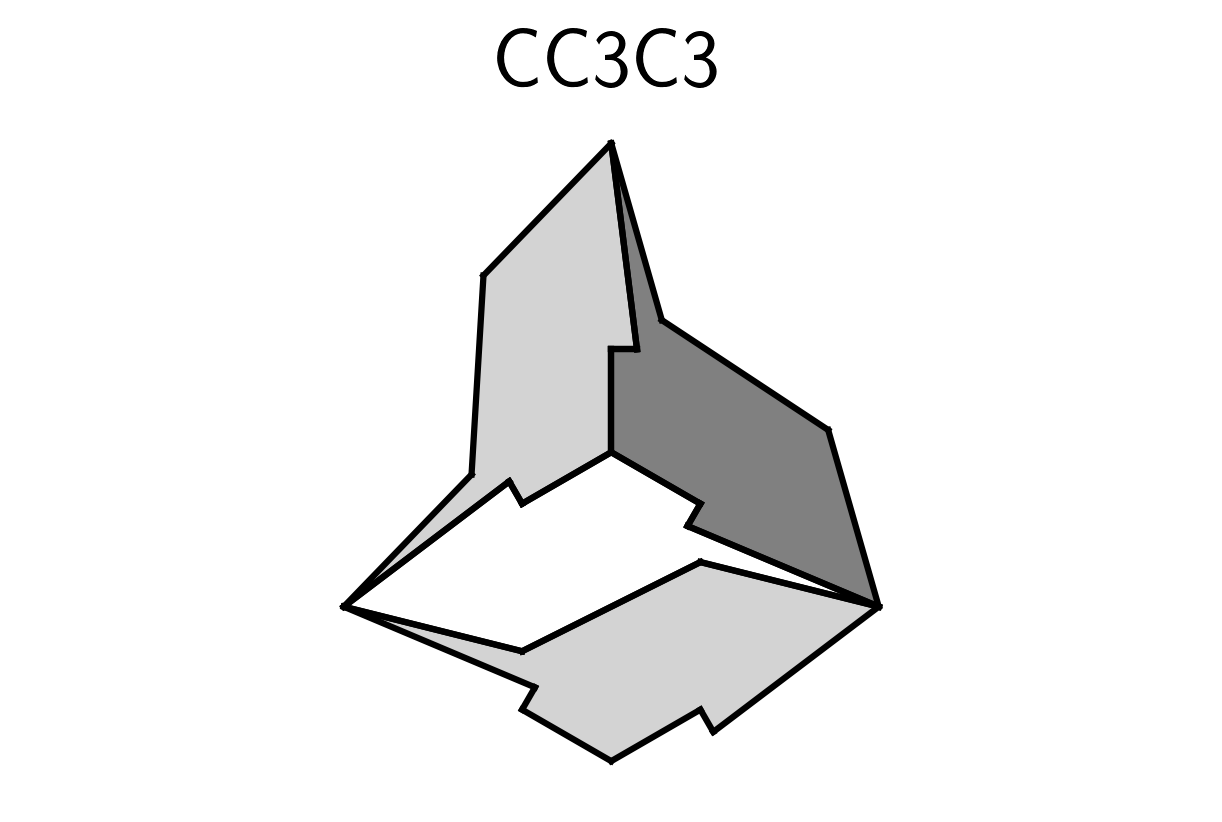

In [47]:
# test make tile
heeschType = 'CC3C3' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = 0.5*np.array([1,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about vertex by 120 degrees
A = (1./np.sqrt(3.)) * np.array([cosd(30), sind(30)])
angle = 120
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'grey')

# rotate tile 0 about vertex by -120 degrees
A = (1./np.sqrt(3.)) * np.array([cosd(30), sind(30)])
angle = -120
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

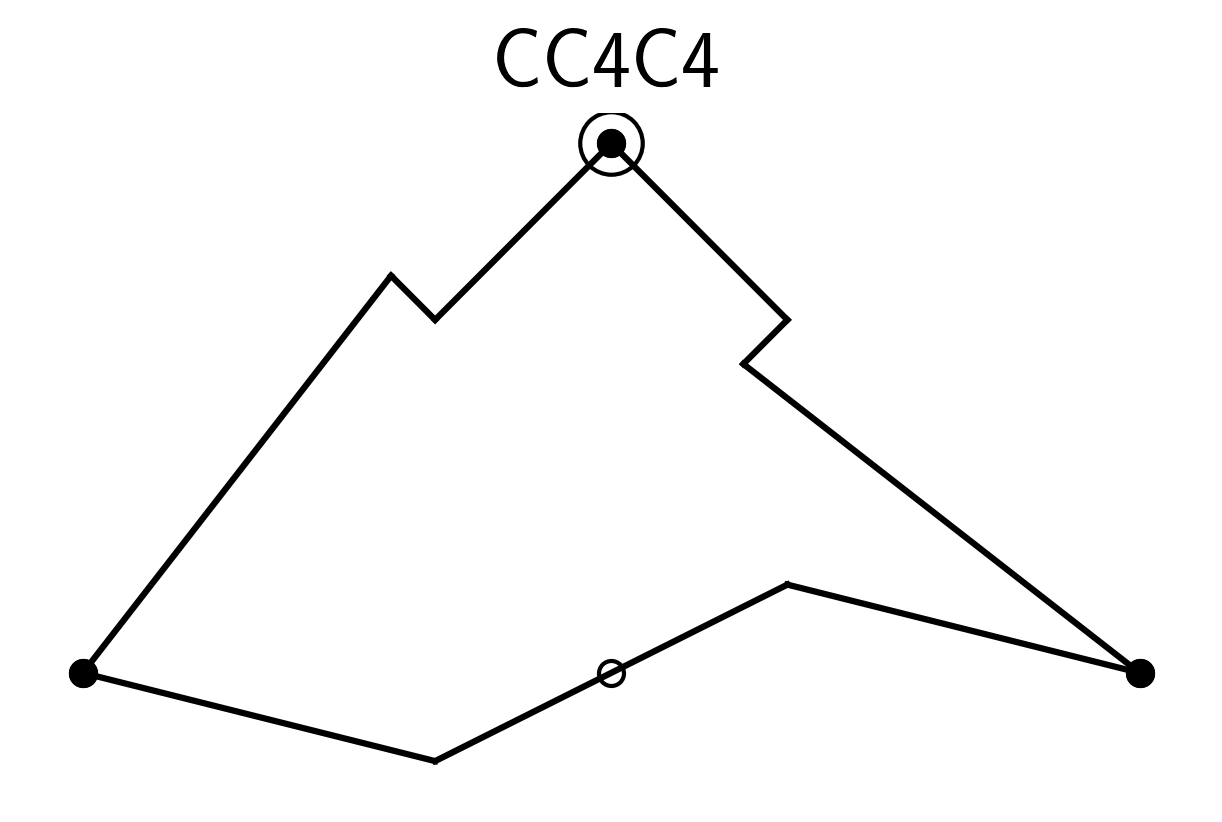

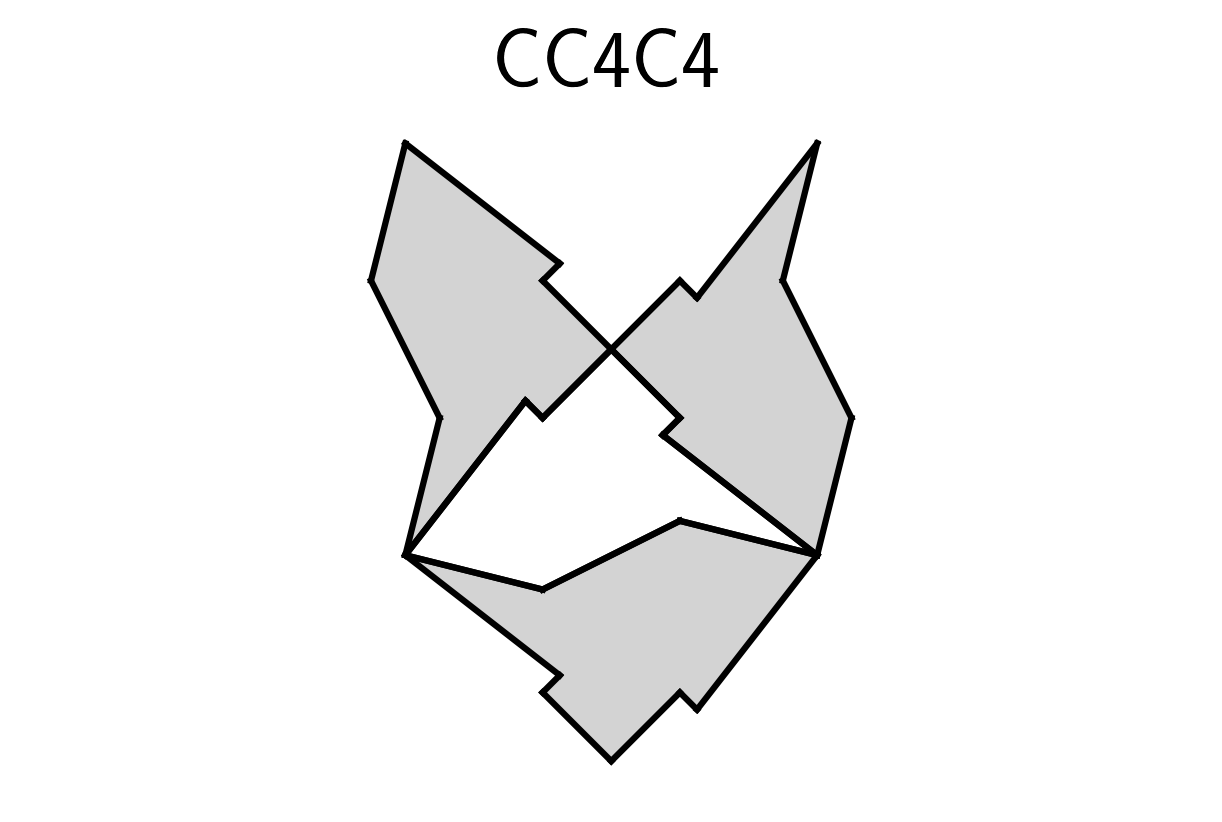

In [48]:
# test make tile
heeschType = 'CC4C4' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = 0.5*np.array([1,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about vertex by 90 degrees
A = (1./np.sqrt(2.)) * np.array([cosd(45), sind(45)])
angle = 90
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about vertex by -90 degrees
A = (1./np.sqrt(2.)) * np.array([cosd(45), sind(45)])
angle = -90
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

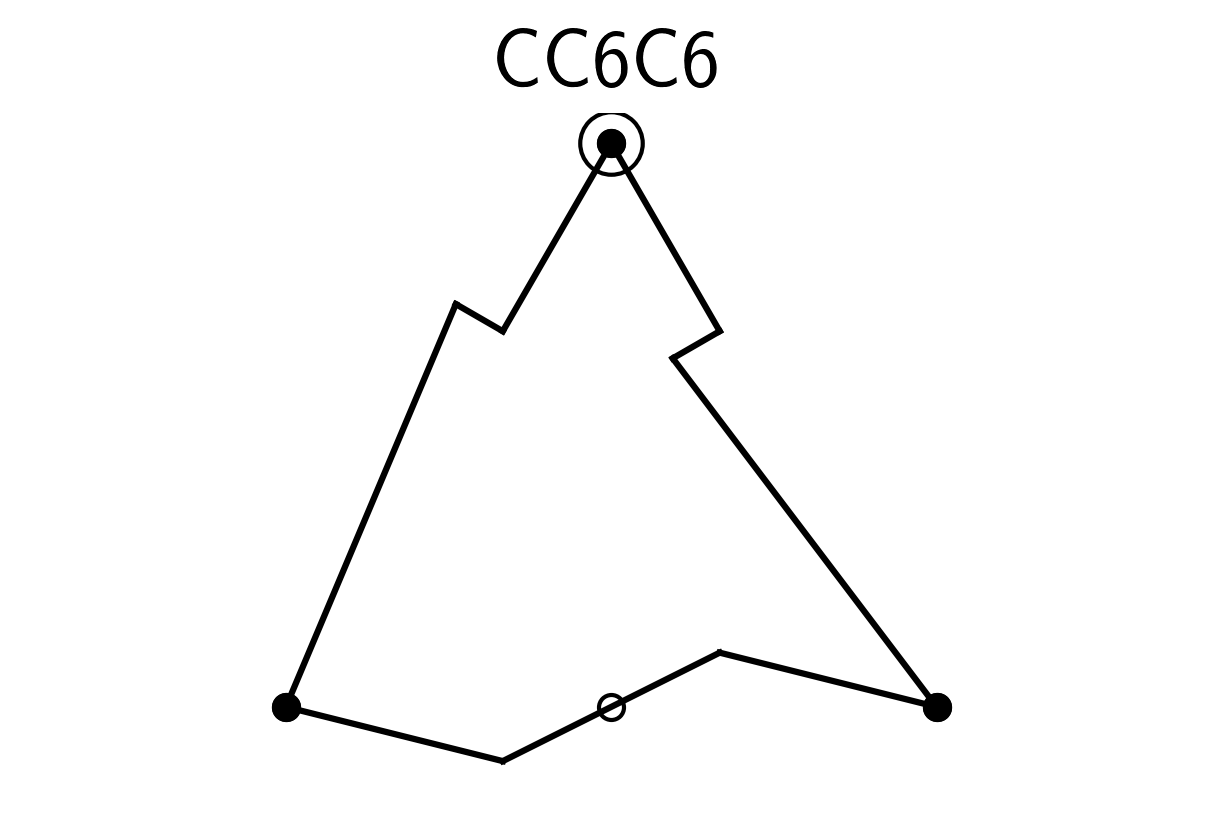

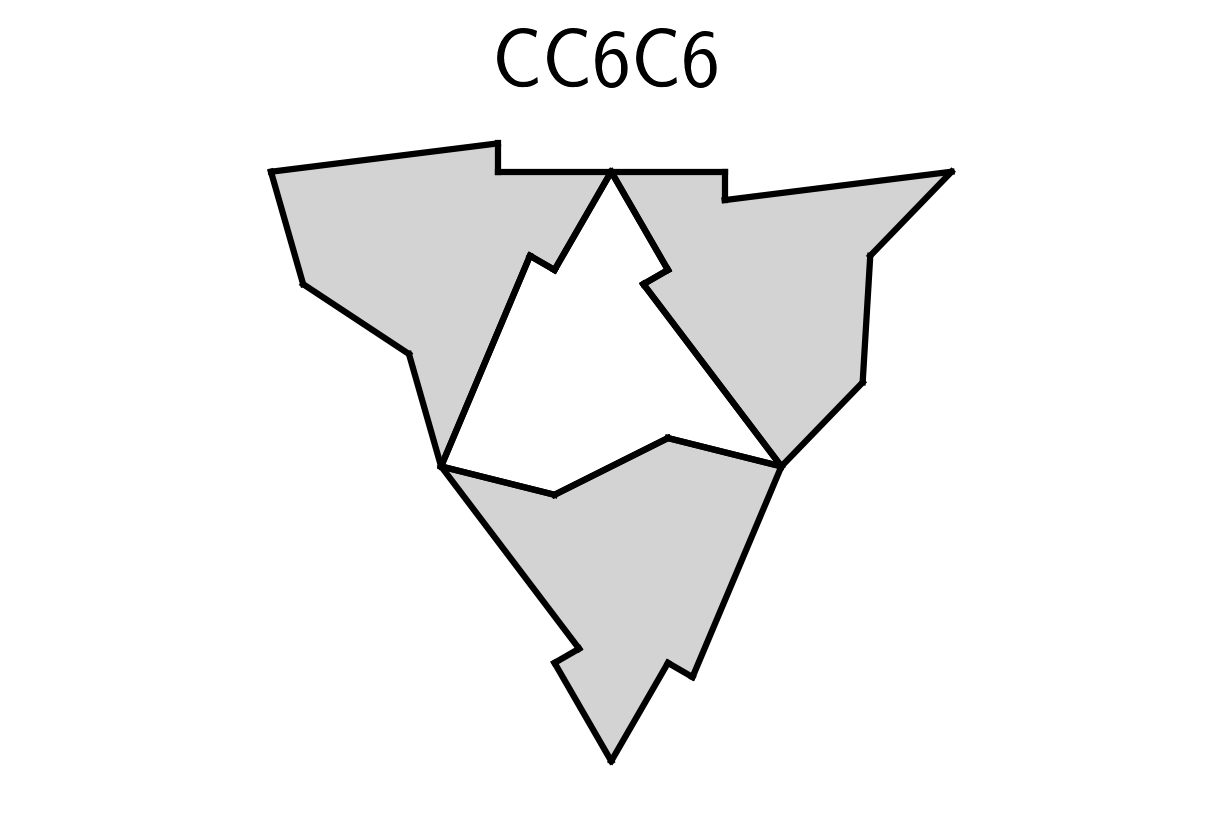

In [49]:
# test make tile
heeschType = 'CC6C6' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = 0.5*np.array([1,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about vertex by 60 degrees
A = np.array([cosd(60), sind(60)])
angle = 60
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about vertex by -60 degrees
A = np.array([cosd(60), sind(60)])
angle = -60
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

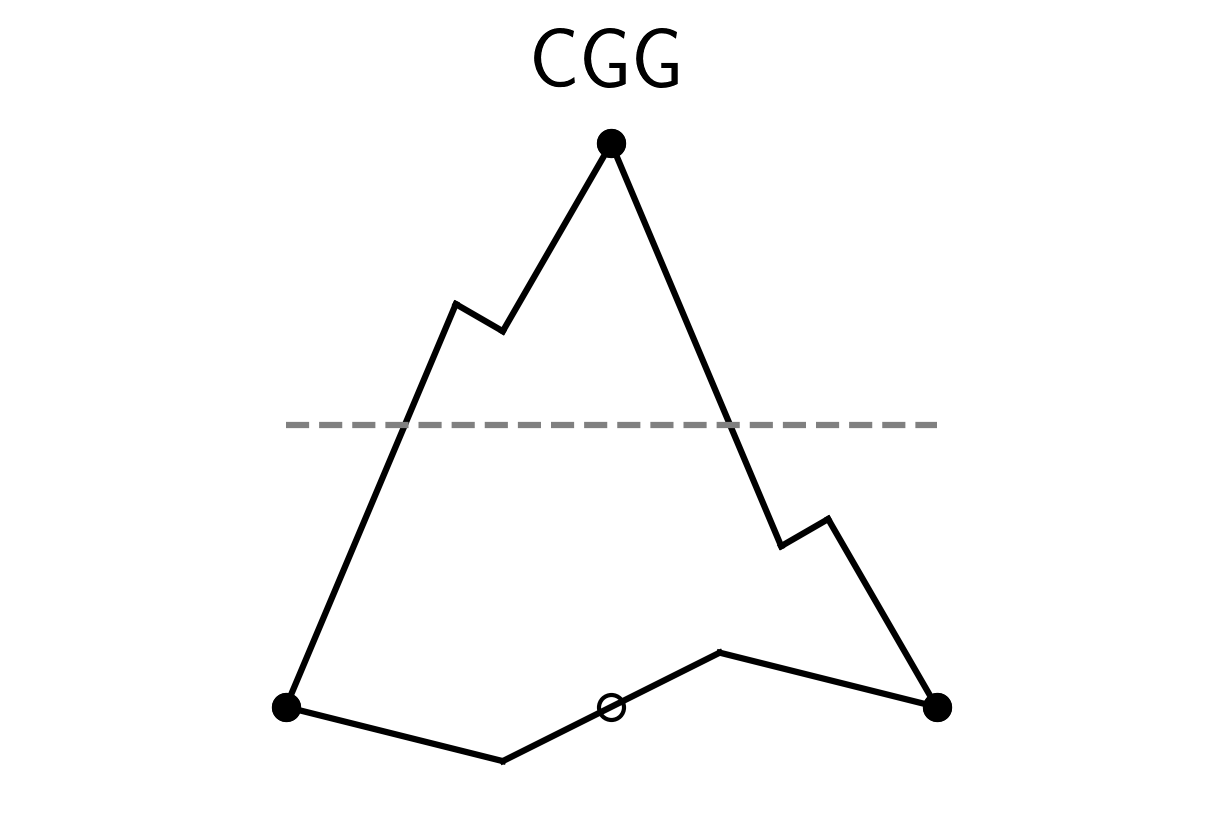

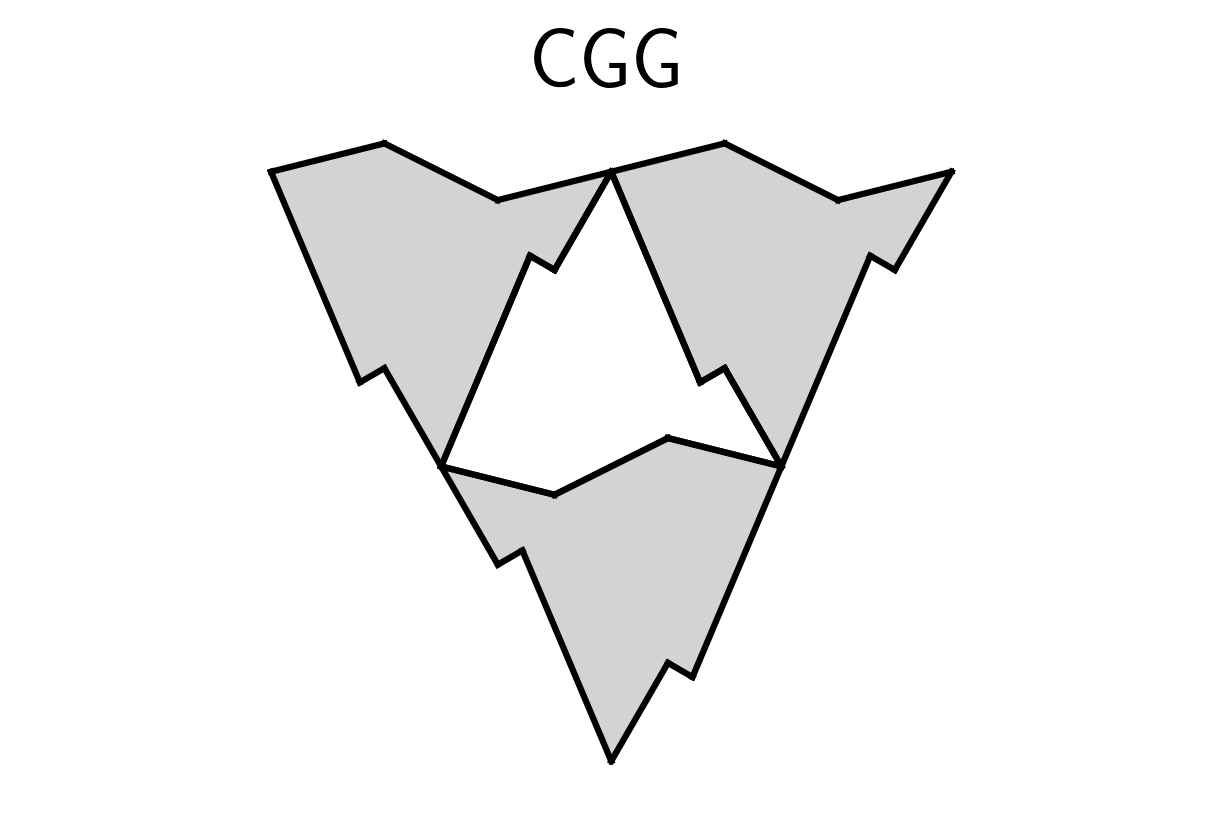

In [50]:
# test make tile
heeschType = 'CGG' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# plot glide reflection axis
b = 0.5*sind(60)
x = np.array([0,1])
y = np.array([b,b])
plt.plot(x, y, color='grey', linestyle='--')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselate
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about center of bottom edge
A = 0.5*np.array([1,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# glide reflect tile 0 about horizontal axis passing through middle point
angle = 60
b = 0.5*sind(angle)
axis = np.array([0, b])
scalefac = 0.5
P2 = glideReflect(P0, axis, scalefac)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# repeat but in opposite direction
angle = 60
b = 0.5*sind(angle)
axis = np.array([0, b])
scalefac = -0.5
P3 = glideReflect(P0, axis, scalefac)
plotPoints(P3)
colorTile(P3, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')

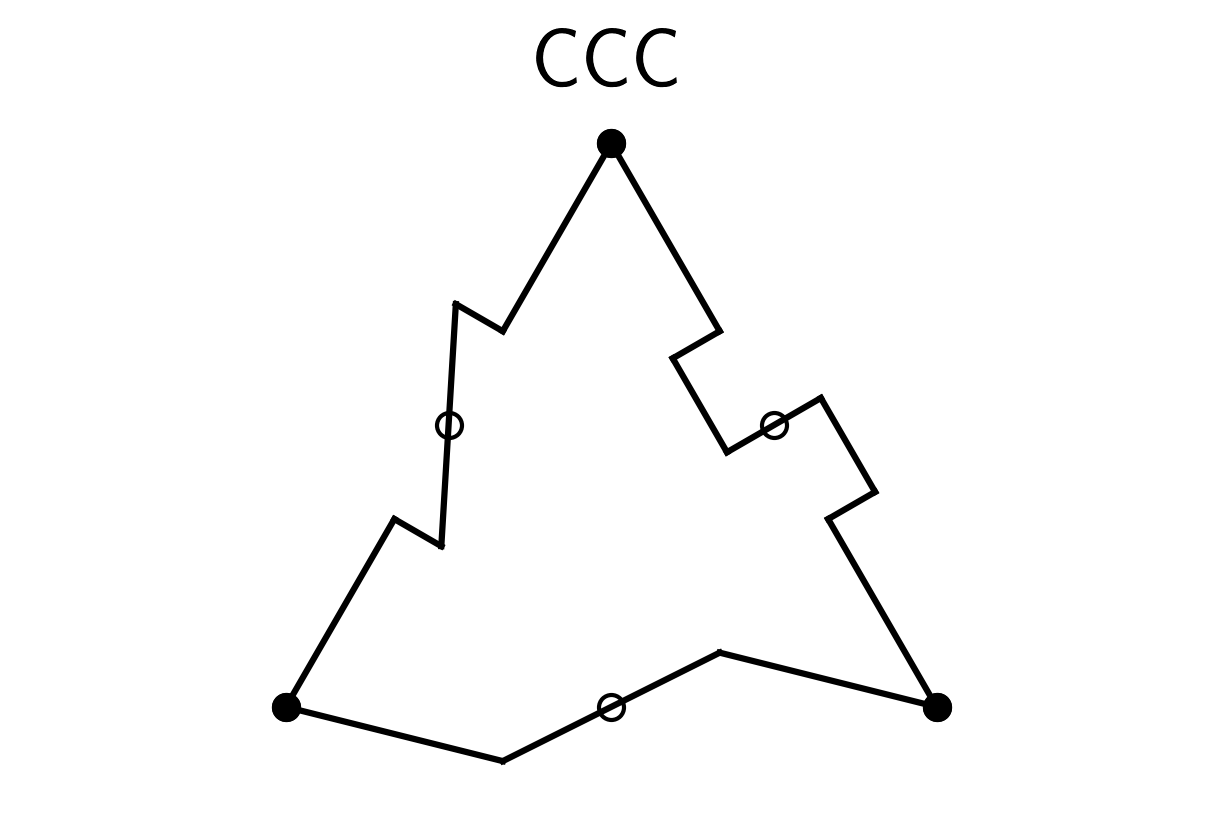

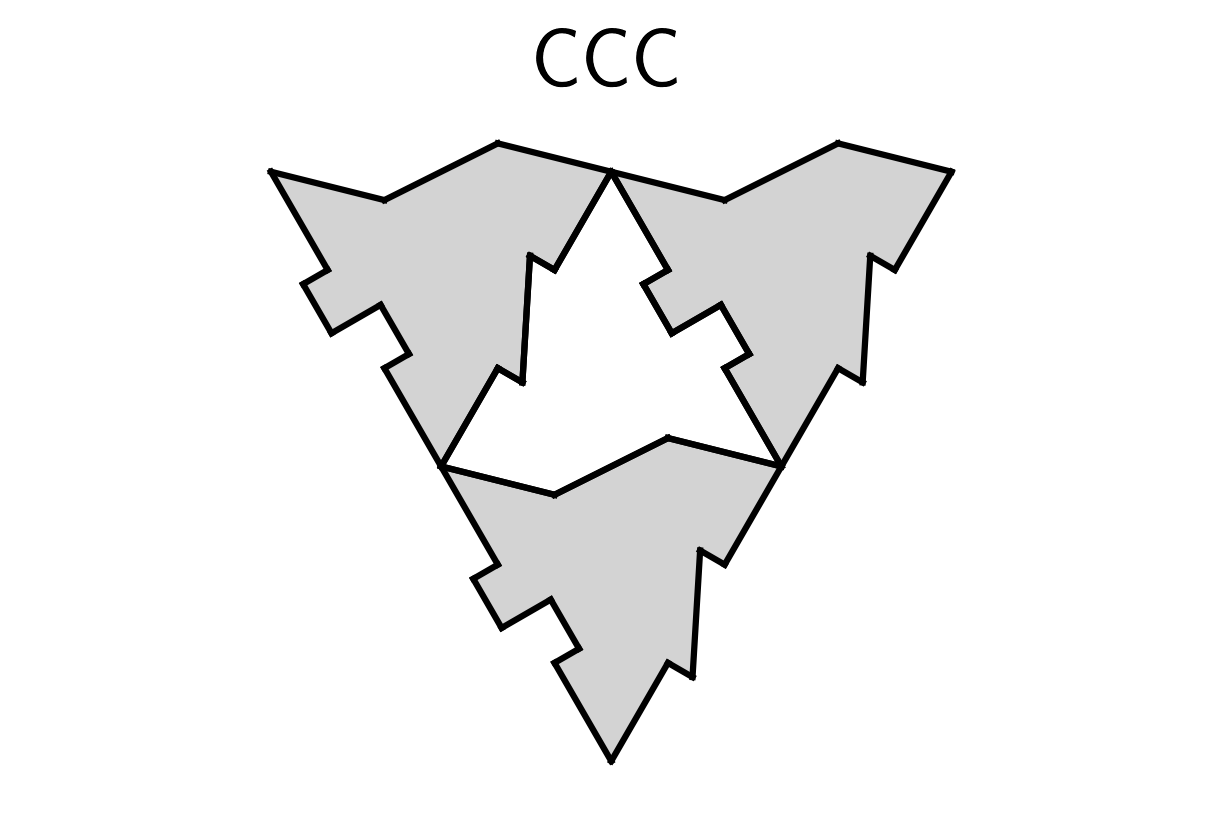

In [51]:
# test make tile
heeschType = 'CCC' 

P0, V0, C0, R0 = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
plotVertices(V0)
plotCenters(C0)
plotRotationalVertices(R0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')
plt.savefig(heeschType+'.pdf', bbox_inches='tight' )

# tesselation
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P0)
colorTile(P0, 'w')
plt.axis('equal')
plt.axis('off')

# rotate tile 0 about centers of edges
A = 0.5*np.array([1,0])
angle = 180
P1 = rotate(P0, A, angle)
plotPoints(P1)
colorTile(P1, 'lightgrey')

# left edge
A = 0.5*np.array([cosd(60), sind(60)])
angle = 180
P2 = rotate(P0, A, angle)
plotPoints(P2)
colorTile(P2, 'lightgrey')

# right edge
A = 0.5*np.array([cosd(60), sind(60)]) + 0.5*np.array([1,0])
angle = 180
P3 = rotate(P0, A, angle)
plotPoints(P3)
colorTile(P3, 'lightgrey')
plt.savefig(heeschType+'_tesselation.pdf', bbox_inches='tight')